In [438]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [440]:
img = cv2.imread('./Dataset/rohit_sharma_face/4a94742872.jpg')
img.shape

AttributeError: 'NoneType' object has no attribute 'shape'

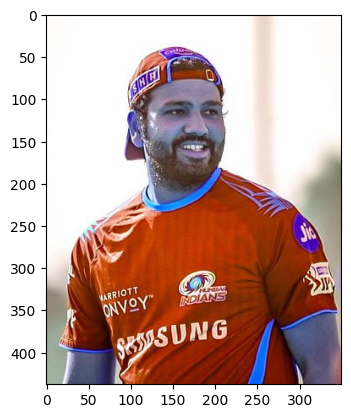

In [305]:
plt.imshow(img)

In [306]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray.shape

(438, 350)

In [307]:
gray

array([[253, 253, 253, ..., 252, 252, 252],
       [253, 253, 253, ..., 252, 252, 252],
       [253, 253, 253, ..., 252, 252, 252],
       ...,
       [169, 169, 169, ...,  96,  96,  97],
       [169, 169, 169, ...,  97,  96,  96],
       [169, 169, 169, ...,  98,  96,  95]], dtype=uint8)

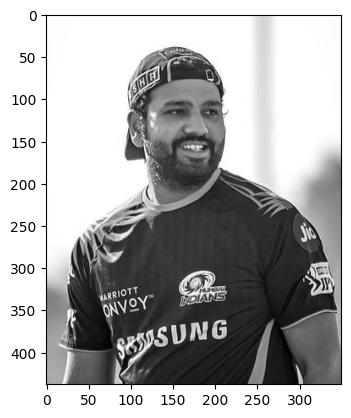

In [308]:
plt.imshow(gray,cmap='gray')

In [441]:
face_cascade = cv2.CascadeClassifier('./haarcascades/haarcascade_frontalface_alt.xml')
eyes_cascade = cv2.CascadeClassifier('./haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray,1.1,2)
faces

array([[121,  74, 108, 108]])

In [442]:
(x,y,w,h) = faces[0]
x,y,w,h

(121, 74, 108, 108)

TypeError: Image data of dtype object cannot be converted to float

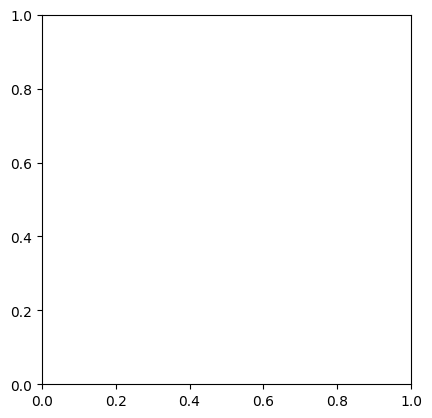

In [443]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

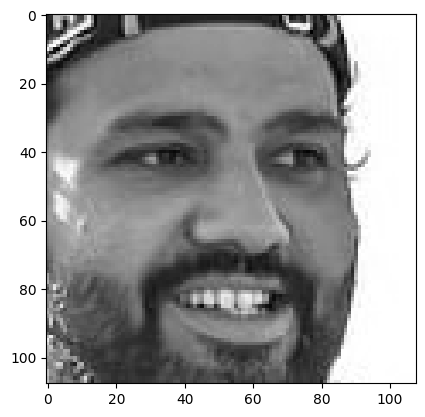

In [312]:
roi_gray = gray[y:y+h,x:x+w]
plt.imshow(roi_gray,cmap='gray')

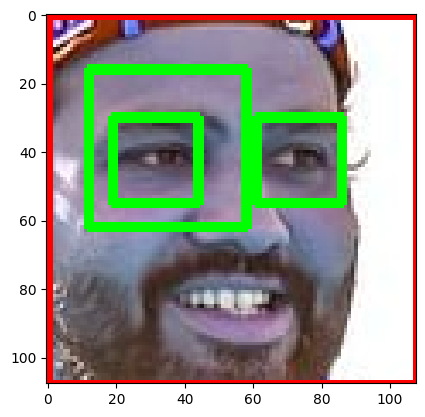

In [313]:
cv2.destroyAllWindows()
for(x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h,x:x+w]
    roi_color = face_img[y:y+h,x:x+w]
    eyes = eyes_cascade.detectMultiScale(roi_gray,1.1,2)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

plt.imshow(roi_color,cmap='gray')

In [444]:
def cropif2eyes (image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray,1.1,2)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h,x:x+w]
        roi_color = img[y:y+h,x:x+w]
        eyes = eyes_cascade.detectMultiScale(roi_gray,1.1,2)
#         if(len(eyes)>=1):
        return roi_color         

In [445]:
path_to_data = './Dataset'
path_to_cropped_data = './Dataset/cropped/'

In [446]:
import os
img_dirs = []
for img_folders in os.scandir(path_to_data):
    if img_folders.is_dir():
        img_dirs.append(img_folders.path)

In [447]:
img_dirs

['./Dataset\\cropped',
 './Dataset\\mahendra_singh_dhoni_face',
 './Dataset\\maria_sharapova_face',
 './Dataset\\rohit_sharma_face',
 './Dataset\\serena_williams_face',
 './Dataset\\virat_kohli_face']

In [448]:
import shutil
if os.path.exists(path_to_cropped_data):
    shutil.rmtree(path_to_cropped_data)
os.mkdir(path_to_cropped_data)

In [449]:
cropped_image_dirs = []
for img_dir in img_dirs:
    celebrity_name = (img_dir).split('\\')[-1]
    count = 1
    
    for img in os.scandir(img_dir):
        roi_color = cropif2eyes(img.path)
        
        if roi_color is not None:
            cropped_folder = path_to_cropped_data + celebrity_name
            
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print('Generating Cropped Images in :- ',cropped_folder)
                
            cropped_file_name = celebrity_name + str(count) + '.png'
            cropped_file_path = cropped_folder + '/' + cropped_file_name
            
            cv2.imwrite(cropped_file_path,roi_color)
            count+=1

Generating Cropped Images in :-  ./Dataset/cropped/mahendra_singh_dhoni_face
Generating Cropped Images in :-  ./Dataset/cropped/maria_sharapova_face
Generating Cropped Images in :-  ./Dataset/cropped/rohit_sharma_face
Generating Cropped Images in :-  ./Dataset/cropped/serena_williams_face
Generating Cropped Images in :-  ./Dataset/cropped/virat_kohli_face


In [665]:
celebrity_file_names_dict = {}
for cropped_folder in cropped_image_dirs:
    celebrity_name = str(cropped_folder).split('/')[-1]
    celebrity_name = str(celebrity_name).rsplit('_',1)[0]
    celebrity_file_names_dict[celebrity_name] = []
    for cropped_img in os.scandir(cropped_folder):
        celebrity_file_names_dict[celebrity_name].append(cropped_img.path)
celebrity_file_names_dict

{'mahendra_singh_dhoni': ['./Dataset/cropped/mahendra_singh_dhoni_face\\mahendra_singh_dhoni_face1.png',
  './Dataset/cropped/mahendra_singh_dhoni_face\\mahendra_singh_dhoni_face10.png',
  './Dataset/cropped/mahendra_singh_dhoni_face\\mahendra_singh_dhoni_face100.png',
  './Dataset/cropped/mahendra_singh_dhoni_face\\mahendra_singh_dhoni_face101.png',
  './Dataset/cropped/mahendra_singh_dhoni_face\\mahendra_singh_dhoni_face102.png',
  './Dataset/cropped/mahendra_singh_dhoni_face\\mahendra_singh_dhoni_face104.png',
  './Dataset/cropped/mahendra_singh_dhoni_face\\mahendra_singh_dhoni_face106.png',
  './Dataset/cropped/mahendra_singh_dhoni_face\\mahendra_singh_dhoni_face108.png',
  './Dataset/cropped/mahendra_singh_dhoni_face\\mahendra_singh_dhoni_face109.png',
  './Dataset/cropped/mahendra_singh_dhoni_face\\mahendra_singh_dhoni_face110.png',
  './Dataset/cropped/mahendra_singh_dhoni_face\\mahendra_singh_dhoni_face111.png',
  './Dataset/cropped/mahendra_singh_dhoni_face\\mahendra_singh_dho

In [666]:
import pywt
def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

In [667]:
class_dict = {}
count = 0
for celebrity_names in celebrity_file_names_dict.keys():
    class_dict[celebrity_names] = count
    count+=1
class_dict

{'mahendra_singh_dhoni': 0,
 'maria_sharapova': 1,
 'rohit_sharma': 2,
 'serena_williams': 3,
 'virat_kohli': 4}

In [668]:
X = []
y = []
for celebrity_name,img_files in celebrity_file_names_dict.items():
    for training_img in img_files:
        img = cv2.imread(training_img)
        if img is None:
            continue
        scaled_raw_img = cv2.resize(img,(32,32))
        img_har = w2d(img,'db1',5)
        scaled_har_img = cv2.resize(img_har,(32,32))
        combined_img = np.vstack((scaled_raw_img.reshape(32*32*3,1),scaled_har_img.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])

In [669]:
X = np.array(X).reshape(len(X),4096).astype(float)
X

array([[ 25.,  18.,  23., ...,  45.,  51.,  52.],
       [242., 211.,  92., ...,   1.,   0., 155.],
       [  6.,   6.,   6., ...,   5.,   9., 247.],
       ...,
       [247., 181.,  81., ...,  24.,  14.,  18.],
       [ 34.,  36.,  44., ...,   0.,  69.,   0.],
       [ 33.,  15.,  22., ..., 217.,  86., 207.]])

In [670]:
X.shape

(364, 4096)

In [689]:
from sklearn.linear_model import LogisticRegression,Lasso,Ridge
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV,KFold,cross_val_score,cross_validate
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
import optuna

In [690]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [691]:
device = 'cpu'
tree_method = 'auto' if device == 'cpu' else 'gpu_hist'
def RandomForest(trial):
    n_estimators = trial.suggest_int('n_estimators',1,100)
    max_depth = trial.suggest_int('max_depth',1,5)
    clf = RandomForestClassifier(n_estimators=n_estimators,
                                 max_depth=max_depth)
    scores = cross_validate(clf,X_train,y_train,cv=3,scoring=['roc_auc_ovr'])
    return (scores['test_roc_auc_ovr'].mean())
def XGB(trial):
    n_estimators = trial.suggest_int('n_estimators',1,1000)
    max_depth = trial.suggest_int('max_depth',1,10)
    learning_rate = trial.suggest_float('learning_rate',0.1,1.0)
    clf = XGBClassifier(n_estimators=n_estimators,
                            max_depth=max_depth,
                            learning_rate=learning_rate,
                            tree_method=tree_method,
                            eval_metric='auc',
                            objective='multi:softprob')
    scores = cross_validate(clf,X_train,y_train,cv=3,scoring=['roc_auc_ovr'])
    return (scores['test_roc_auc_ovr'].mean())
# def DecisionTrees(trial):
#     criterion = trial.suggest_categorical('criterion', ['gini', 'entropy'])
#     max_depth = trial.suggest_int('max_depth', 2, 20)
#     min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
#     min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 20)
#     clf = DecisionTreeClassifier(max_depth=max_depth,
#                                  criterion=criterion,
#                                  min_samples_split=min_samples_split,
#                                  min_samples_leaf=min_samples_leaf)
#     scores = cross_validate(clf,X_train,y_train,cv=3,scoring=['roc_auc_ovr'])
#     return (scores['test_roc_auc_ovr'].mean())
# def CatBoost(trial):
#     depth = trial.suggest_int('depth', 2, 10)
#     l2_leaf_reg = trial.suggest_int('l2_leaf_reg', 0, 10)
#     n_estimators = trial.suggest_int('n_estimators', 10, 100)
#     clf = CatBoostClassifier(depth=depth,
#                                  learning_rate=learning_rate,
#                                  l2_leaf_reg=l2_leaf_reg,
#                                  n_estimators=n_estimators,
#                                  verbose = False,
#                                  loss_function='MultiClass',
#                                  eval_metric='AUC')
#     scores = cross_validate(clf,X_train,y_train,cv=3,scoring=['roc_auc_ovr'])
#     return (scores['test_roc_auc_ovr'].mean())
# def KNN(trial):
#     n_neighbors = trial.suggest_int('n_neighbors',5,50)
#     clf = KNeighborsClassifier(n_neighbors = n_neighbors)
#     scores = cross_validate(clf,X_train,y_train,cv=3,scoring=['roc_auc_ovr'])
#     return (scores['test_roc_auc_ovr'].mean())   
# def Gaussian(trial):
#     clf = GaussianNB()
#     scores = cross_validate(clf,X_train,y_train,cv=3,scoring=['roc_auc_ovr'])
#     return (scores['test_roc_auc_ovr'].mean())
# def Multinomial(trial):
#     clf = MultinomialNB()
#     scores = cross_validate(clf,X_train,y_train,cv=3,scoring=['roc_auc_ovr'])
#     return (scores['test_roc_auc_ovr'].mean())
def LGBM(trial):
    learning_rate = trial.suggest_float('learning_rate',0.1,0.8)
    n_estimators = trial.suggest_int('n_estimators',10,1000)
    max_depth = trial.suggest_int('max_depth',2,10)
    clf = LGBMClassifier(learning_rate = learning_rate,
                            n_estimators = n_estimators,
                            max_depth = max_depth,
                            objective='softmax',
                            metric = 'ova',
                            verbosity = -1)
    scores = cross_validate(clf,X_train,y_train,cv=3,scoring=['roc_auc_ovr'])
    return (scores['test_roc_auc_ovr'].mean())
# def AdaBoost(trial):
#     n_estimators = trial.suggest_int('n_estimators',10,100)
#     learning_rate = trial.suggest_float('learning_rate',0.1,0.9)
#     clf = AdaBoostClassifier(n_estimators = n_estimators,
#                              learning_rate = learning_rate)
#     scores = cross_validate(clf,X_train,y_train,cv=3,scoring=['roc_auc_ovr'])
#     return (scores['test_roc_auc_ovr'].mean())
def Logreg(trial):
    C = trial.suggest_int('C',1,100)
    clf = LogisticRegression(C=C,max_iter=1000000000)
    scores = cross_validate(clf,X_train,y_train,cv=3,scoring=['roc_auc_ovr'])
    return (scores['test_roc_auc_ovr'].mean())

objectives_list = [RandomForest,XGB,LGBM,Logreg]

In [692]:
scores = []
def tune(objective,est_name):
        study = optuna.create_study(direction='maximize')
        study.optimize(objective, n_trials=10)
        scores.append({'model':est_name,'best_params':study.best_params,'AUC Score':study.best_value})
        return scores

ensemble = [RandomForestClassifier,XGBClassifier,LGBMClassifier,LogisticRegression]
for objective,estimator_name in zip(objectives_list,ensemble):
    tune(objective,estimator_name)

[I 2023-02-15 00:05:25,522] A new study created in memory with name: no-name-5a6d638c-daaa-4d84-b40f-2784baba75e8
[I 2023-02-15 00:05:26,273] Trial 0 finished with value: 0.8964898378619647 and parameters: {'n_estimators': 71, 'max_depth': 3}. Best is trial 0 with value: 0.8964898378619647.
[I 2023-02-15 00:05:26,489] Trial 1 finished with value: 0.7812672520770141 and parameters: {'n_estimators': 30, 'max_depth': 1}. Best is trial 0 with value: 0.8964898378619647.
[I 2023-02-15 00:05:26,575] Trial 2 finished with value: 0.738338790940385 and parameters: {'n_estimators': 3, 'max_depth': 5}. Best is trial 0 with value: 0.8964898378619647.
[I 2023-02-15 00:05:27,673] Trial 3 finished with value: 0.906172589014543 and parameters: {'n_estimators': 88, 'max_depth': 4}. Best is trial 3 with value: 0.906172589014543.
[I 2023-02-15 00:05:28,689] Trial 4 finished with value: 0.8942575989504519 and parameters: {'n_estimators': 98, 'max_depth': 3}. Best is trial 3 with value: 0.906172589014543.
[

[I 2023-02-15 00:08:05,809] Trial 8 finished with value: 0.924600596671699 and parameters: {'C': 85}. Best is trial 1 with value: 0.9289665162837363.
[I 2023-02-15 00:08:08,229] Trial 9 finished with value: 0.9282587053386465 and parameters: {'C': 5}. Best is trial 1 with value: 0.9289665162837363.


In [693]:
import pandas as pd
df = pd.DataFrame(scores)
df.sort_values(by='AUC Score',ascending=False,ignore_index=True,inplace=True)
params = df['best_params']
df

,model,best_params,AUC Score
0,<class 'sklearn.linear_model._logistic.Logisti...,{'C': 1},0.928967
1,<class 'lightgbm.sklearn.LGBMClassifier'>,"{'learning_rate': 0.1677346724567894, 'n_estim...",0.925761
2,<class 'xgboost.sklearn.XGBClassifier'>,"{'n_estimators': 99, 'max_depth': 2, 'learning...",0.910239
3,<class 'sklearn.ensemble._forest.RandomForestC...,"{'n_estimators': 88, 'max_depth': 4}",0.906173


In [696]:
params = df['best_params']
models = []
for _model,bestparams in zip(df['model'],params):
    models.append(_model(**bestparams))
models

[LogisticRegression(C=1),
 LGBMClassifier(learning_rate=0.1677346724567894, max_depth=10, n_estimators=270),
 XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=0.3507984636000534,
               max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=2, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               n_estimators=99, n_jobs=None, num_parallel_tree=None,
               predictor=None, random_state=None, ...),
 RandomForestClassifier(max_depth=4, n_estimators=88)]

In [697]:
estimators= []
count = 1
for model in models:
    estimators.append((str(count),model))
    count+=1
estimators

[('1', LogisticRegression(C=1)),
 ('2',
  LGBMClassifier(learning_rate=0.1677346724567894, max_depth=10, n_estimators=270)),
 ('3',
  XGBClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bynode=None,
                colsample_bytree=None, early_stopping_rounds=None,
                enable_categorical=False, eval_metric=None, feature_types=None,
                gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
                interaction_constraints=None, learning_rate=0.3507984636000534,
                max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=2, max_leaves=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                n_estimators=99, n_jobs=None, num_parallel_tree=None,
                predictor=None, random_state=None, ...)),
 ('4', RandomForestClassifier(max_depth=4, n_estimators=88))]

In [698]:
clf = VotingClassifier(estimators,voting='soft',weights=[4,3,2,1])

In [699]:
pipe = Pipeline([
                 (('clf',clf))])
pipe.fit(X_train,y_train)
y_pred = pipe.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
print(classification_report(y_test,y_pred))

C:\Users\Naman\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.64      0.90      0.75        20
           1       0.80      0.91      0.85        22
           2       0.82      0.50      0.62        18
           3       0.95      0.69      0.80        26
           4       0.85      0.96      0.90        24

    accuracy                           0.80       110
   macro avg       0.81      0.79      0.78       110
weighted avg       0.82      0.80      0.79       110



Text(95.72222222222221, 0.5, 'Truth')

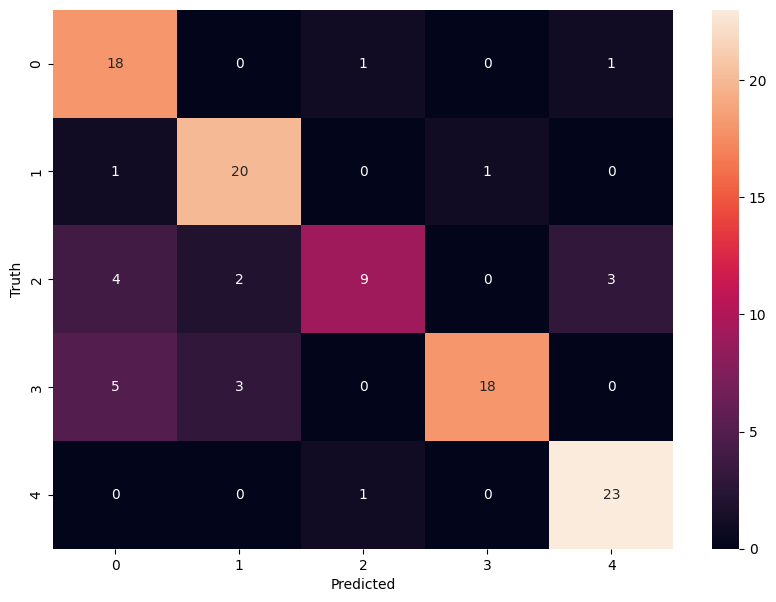

In [700]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [701]:
class_dict

{'mahendra_singh_dhoni': 0,
 'maria_sharapova': 1,
 'rohit_sharma': 2,
 'serena_williams': 3,
 'virat_kohli': 4}

In [702]:
!pip install joblib
import joblib
# Save the model as a pickle in a file
joblib.dump(clf, 'saved_model.pkl')

['saved_model.pkl']

In [703]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))

In [704]:
class_dict
class_dict_rev = {}
for k,v in class_dict.items():
    class_dict_rev[v] = k

In [705]:
import base64
def get_cv2_image_from_base64_string(b64str):
    '''
    credit: https://stackoverflow.com/questions/33754935/read-a-base-64-encoded-image-from-memory-using-opencv-python-library
    :param uri:
    :return:
    '''
    encoded_data = b64str.split(',')[1]
    nparr = np.frombuffer(base64.b64decode(encoded_data), np.uint8)
    img = cv2.imdecode(nparr, cv2.IMREAD_COLOR)
    return img

def get_cropped_image_if_2_eyes(image_path, image_base64_data):
    face_cascade = cv2.CascadeClassifier('./haarcascades/haarcascade_frontalface_default.xml')
    eye_cascade = cv2.CascadeClassifier('./haarcascades/haarcascade_eye.xml')

    if image_path:
        img = cv2.imread(image_path)
    else:
        img = get_cv2_image_from_base64_string(image_base64_data)

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.1, 2)

    cropped_faces = []
    for (x,y,w,h) in faces:
            roi_gray = gray[y:y+h, x:x+w]
            roi_color = img[y:y+h, x:x+w]
            eyes = eye_cascade.detectMultiScale(roi_gray,1.1,2)
            if len(eyes) >= 2:
                cropped_faces.append(roi_color)
    return cropped_faces

def classify_image(image_base_64,file_path=None):
    imgs = get_cropped_image_if_2_eyes(file_path,image_base_64)
    
    result = []
    
    for img in imgs:
        scaled_raw_img = cv2.resize(img,(32,32))
        img_har = w2d(img,'db1',5)
        scaled_har_img = cv2.resize(img_har,(32,32))
        combined_img = np.vstack((scaled_raw_img.reshape(32*32*3,1),scaled_har_img.reshape(32*32,1)))
        len_image_array = 32*32*3+32*32
        final = combined_img.reshape(1,len_image_array).astype(float)
        
        result.append(class_dict_rev[clf.predict(final)[0]])
    return result

b64 = 'data:image/jpeg;base64,/9j/4AAQSkZJRgABAgAAZABkAAD/7AARRHVja3kAAQAEAAAASAAA/+4ADkFkb2JlAGTAAAAAAf/bAIQABAMDAwMDBAMDBAUDAwMFBgUEBAUGBwYGBgYGBwkHCAgICAcJCQsLDAsLCQwMDAwMDBAQEBAQEhISEhISEhISEgEEBAQHBwcOCQkOFA4NDhQUEhISEhQSEhISEhISEhISEhISEhISEhISEhISEhISEhISEhISEhISEhISEhISEhIS/8AAEQgBtwJJAwERAAIRAQMRAf/EALcAAAAHAQEBAAAAAAAAAAAAAAABAgMEBQYHCAkBAAIDAQEBAQAAAAAAAAAAAAACAQMEBQYHCBAAAgEDAwIEBAMGBAMGBAUFAQIDABEEIRIFMQZBUSITYXGBB5EyFKGxQlIjFcFiMwhyQyTw0eGCkhaiU2M08dKTVCWywnNWFxEAAgIBBAECBQMCBAUEAwEAAAERAgMhMRIEBUEiUWEyEwZxgRSRI/ChQjOxwdFSFeHxciRighbS/9oADAMBAAIRAxEAPwDho6Aai1fPFdI/RkCrW+tPIcRxFJ6UJDSLCmptopCRSDX6UiyJiscUG1F7TsSmLRSRcUqQSPRgiwPhSsnkS4xf6VYh6skRgm1qjHdX2Lb0hTJIClRrVltNCpuFI+p6A6E+dVyQrqw+t7DTrUOxbw0kUTtaxoqmxbJLdr+obuqrdrgedjrV2PHadjD34+21K/qORMBaxvbW3/411KVcQeDs1VtNosY5Adb329SOlSqtaC1RvexmH9vzGF7W1Nc7tSinNqzF53EchmPI35FE7OvhcK3/AI15a+XHk0rJemizysVZYYIP1AjIKbgNddPGkzZX9IShcvHwZfIo75AZJ4wojA6ldNKrr2bc5+JM6EVV4lGnR3bbC2xrtYD5CtNb5MunogkbXLxIdqJGQI2Gy7aHWnvSyqTJpOPaL+4YrQqsUmUu6UqOpFYU4yKr3FtqjUzsFjO5q970I+zBltXUzXKZaohG7WrXZLQdFNFDixRPnZrBZZdItwv+yo5oaUPctJn4XCI2FG3IPLqfbUk6+FS7EItOxRzIkZczDljil1UuLAWFNRyyvN9JvpuM93+Cx+Pgat4syciM/Bu8YWSRVt40cR1crcztPjZ4mTJzRGrDWxsTRxJ+4Q8Hguz+FQ78sSsTcl2ub/OmSH5Noo+/+e4jJ46LC4+RWMZGg8hUsMVWmczmlvrelHT1ITzD460Eu2g5xzBpntWHs3SO14OreUtF6Wrkt6nubbh2v4imREoTuHne3lQ2MqyA3DbSNb2+tCFGRkQK7L7iiRBfZf1dbaCmpLcJCZ8tMddWZLn/ALn9uduZk2JlynImiIW2IwksNbhidAR5VrxePz5Nloec7f5F1sX1WgxXJ/fDC2t/asWVWLuy+6RtH8psB1v8a6GPwMOYOLn/ADLBHtbf7FJmffPuF7Dj8fHxLDV2Bdt3iRc1vxeHx13OHn/LslvoX9Y/6GZf7nd4PLLN/cZUOQQXVbBdPIVq/gY/gc9/k/an0/oT+E+7XcPENMJCvIQ5KkNHP6trH+JToVNUZfFY7I3df8wzVb5Isovvj3EJVM+LizQ2VXXaQSq/G9Vvw1I3LMf5rmVpa0/b/wDya7hfvTw2bkRQclBJxiMTvlDBlB6AWCjSsHZ8TerTpqj0fT/L8GZrnZp/P/3OmY2TDl46ZGPIs8MgDLIhDKQfitcrJXhuex6vYpmXtevz0AzgrexAboTVNnCkstbi4YCwCgeYtU092w1VyegxJYX+FWwRyRGeRQdOtKiLWUDUkwawHWokrVht5COhpq1bJkZaYk+VTwY6/UT7jVHBiu0MP3gKODI5hh72peQ6umLLKOvXyoVo1HgP8wuART17FWQFsv18OlJn91YXxIu4Umd7jOzIQE3FvDXwrtdS2kHhfyGzyP2plODv2qoZi3SymtebNWm55jF1Mr9CTFh5j2VMaZj57DaqH3sa3n+hux+H7N9kWEHB8nIReHYvxGtK+7jn1NGP8b7Fnql/Ump23m6b3VB8BU/y8e51cP4rle6X9SSnbC/8zJNvEAWrIvI5Tfi/FrLdEteAwY/5nA8CaMnkL2rB0cf45jrvv+4/HxuFH+WBAR0NZV2bm/H4bCnqPBFj0CIqjptFjRbsXZvx+PwV1X+P8wG5Gn1vVf3rly6+MTsbz/ZR96432aGWFrajWq9DmoMKfxogmR1RsGutMkQxY9QuKXMpqQGqm/7KzUoAoC2lWJQQOpoKdIkdQEmkerIJUenU2p0OiSjBSFte9RTHwHpis9xU2Xj48ZmyZEgiX8zMwAH1NQ8V72K8uWmNOzexneX+5HbnDkxrk/rHWx/pAMPxvXQw+Pvb0OH3PyPDRbpGLy/vc6NOuJhq4e/su1/T9K6mLxD/ANR5btfmNYhMy833a7qO72skoH6rtUAfLQ1rr4unqcrN+Y5XpVf5sgZf3L7uyovZbkJEjPgtlP4ir6+OxL5nN7H5J2cny/d/9SuHeXc+4P8A3TK3L0/qH8DVy6uNbI5X8/M3PJmr7f8AvL3PxeQn6915PEWwaJwF0/4gKrv1E9jbh8taYsel/tT95uy+U4rMjzeRg4LlJdIsTKbbfys59JFcTt9S2p3MPbpbWSTJzWTL6oD+pjaV7SRHehBN9CPhXiuNsUypOislWOY8mQqswx5myJn9PoIAB8abFmpaympZBI47j+cXLxGMLNDFuJZhqLnwNJlit1FdifQdHaPK5kmQzRCKOWUt5k63BN6albWn0BwTYuxeUlA9+dY2BuLAW+FPbqWt6kaGj4ztmTEmilyOQv7IICkAdafH0JyKz9Cq/wAjRmDi7WmyV22A631r0eH2IzWTIb4vaQfdKwncfGtaSakj3BS8l2tGFAxkkK+BFxRCCLCJO7+MjX24MRSo6Dw/dTwieNiFN3zOP/t4kRhewHxomA4NkDI705hxcuq30NqObI+yVk/cfLSg3yX18L1HNjrEinyeSzJbh53YfE1HMb7aK58hytnbfTpkOpAmZuoIvUkogzHTr1oKiE1qEwZJ4pf60hHlXN7W56H8ff8AdLhYyBe4sa5yWp7TJR2vARZVB3EWHnoPxqxYW9hMlFRTZmO7h+43b/AB45pHmySCBFFZgpH8xuLVs6nSteVBxvIeXx4K6uEci5T7x9yyz5H6OZY4JWvGoRRtA6H5128PiaR7jwfd/Lbcmsev9TGch3XzfJznIy8uSR2JJ9RsL+Wvwrfj6WKuyRws35D27v6mv0Kh5WkYvIS7N/ETc1qShQcjJktdzZtsRepECoIBQAKABQArdQEl/wAH3t3H26T/AGzMeJG0MbetbfJrisubp48j1R2Or5zs4VxraV85O09rfdHi+fRMXN/6DlnICx3/AKcr21O46CuF2vG2Wy0PpPhvyrFlpWl/qS1n4m3OSpQFWDg+KsCD8iK498Lx7Hq2q5VNHoMPKdaZsSSMz3PSoWrgn9Rh3sf5bVPELWSGJMi2lzUNNbC1iw17jsNwN186q94tkl6iTMBclwB530qyitEyQs1Kjf62Af8AMB+VEsR92iEnlcSI+qUMRratH26wUZPMY0LPcGIQbWY+VqhKr0MOT8hqkNt3AgH9OPXyvWqnWr8DDk/JEhhu4MkglUANvGr11fgYcn5RrD2NFwmLFyGCuXnxpLO5NrDQCsGTLbGeo8bgx9lcmi3jwsaID24UQjxsDVdu07bndXi+utl/wHQh8evw0H7KR5mx11cNPQIg39R0qOQ669HqgrHpc2oVhuEbDe00yJ0EnyqGiZCtYXpQEML1ICelBKYKAkygW4Bv1pYOTyFWsRr0qSOQsNc2PSmTGHEFtKXJsAtVIqmpArbc38qmAQryFMSSI1tTcE/US+w/G6XKsToL2AqLVVdjRxinJuCn7j7t4/trFL5amXKYbooVOp+JPgNa2dTr3yuHocbynla9bHyTk4n3P3/yvcjlZbY2Nc7YYzYAV6Xr9CuNauT5Z5H8jy500lxkyhfcbkk/Ouh6HnXZvdjiwbwCDoTbpScy+vW5KUwigUgfnuNB0/dUzIlscONwe3vHpAUjqLmiYIWPktNBLIVGtvxqU5FvR13B6Notfd4+VGoPjHzCDFdRp5VLETaehu+xvut3H2RlK2CwzMEsGmwsj1o9utr6i/wrB2uhTIvgdTB5GycNSehu0v8Acn29yyJi8lxq8RybmwCkGFvIXNcDL4VUTcyeh6vklZ8YSNu/3GmkRZMWBAji6EWsQfK1crJ11V6nax462WjI7998w9yhSMHwp+FeOgfb1Ip7o5iW7Ge1/KpqkieCEDneQf8A1chmPztVtbwT9tEiLlJSLtIx+JamvkkV4USYc9mOrbh86etnCK3jSJiZR6E6GrVsLCAZT0B0NPVkaCCbm5NOkI7DMrgi3kaniRJHeS+l6iCLakR2238aiBeJElcEXFgT4VbW0CsgySn8ppuYEOWS4qZKiGzH8TRXci2xO4UlpnJ0Nj+Arm9zc9D4JNW5LYm8ly2HxuBNlTyoqQKWcMQGAHjtPhWTFgd3oeo7feriqrScF75+7GdyTyYPDO+Nx7KBuICyE+PS+n1r03S8bCmzPnfm/wAotaaUX7nL5sqadi0rtIW/MSetdetFXZHh83ZyZXN3IzcU5QFQAKABQAKABQAKABQAKABQAoOVN1JBHQjQ0PUlNrVHSvt/35/bw3F8u7vjsR+mnLaQtfW48jXI73j631Wh7j8f/I8tFwvr+p1SPm8DIj97GmXIQNtZlNxevMZqcPQ92vKYviIl5OLqtyfKpxqr1nUzZfMKu1ZIU/Juw/p9f8KbJrsZLeYdt6kJ87KbdY7bUmNuCm/krPZR+5EkycpjZpCfgNKHeSi/cvYizNMbne23yvT12Mt+3eYI5Z1INzTQjNbLe3qIZmGtr3+NSkK7sUshBB1/fUpaldqJklZDvte+gNdHDZNmd46okqRYte/prfW8SZs6rCUep0Pt1LcVFfr1Ned7V5sfX/CRTCoRb2rPeq0OuqgtTVcA8aGnOpHxpXuSqQJvUIeBLG31q1bC8RDKOtSEBH8ppWQIoICIBoALaKAMqvQDwGlQcgd2AUyRAAovRBYhxRrUX2BixVCZAoUyJQYFzUxIMkqCALUmWr4yhWUvc/cEXbnFSZZK/qX9MSt1v528q39LqvJCZz/M+Vrgwy3oefuW5nN5bKkysqUu8rE9T0PhXrsHXrjrCPi/e8nl7FnL0K41oOcAUASIC23zF6rvubeu7QKtsYEqdBaoLFXi5aETEAALoDrfxpqIz9iy2RZY3H4+ThfqBKpnQ2MH8RHgRWfJldbfI6GDr0ulI1lcNk48lpUMIexW/Sx1pqdhNCX8dLlbEKXElQkD1BfEVcsiZjydPJUYAsaczCxIy2IOoOh8ahr0GWRo6H2R9ys/ip4sDlJmm40+gE6tGDoLHyFczudBWU1O/wCP8q5i71O84uZBmYyZONIJseYBo5B4givMZMfE9fj7KyKPUlRuBoKQcd+NrmhDLUWrX6m3woCB9Jtg0NCvqDroTos7T1EaVorfQptUmRZYkX/GmpYpsh33LjQ6VopYpe5GkfX41YAwX60MCLNJ18KUCHIx2/40yEZDlJAv50BBCdj51Z6FMDDMQw/d41KcEWUoCcnFxGPk5uQ5x4oEaRpdLrYaCs98fK0HoPHdyuLFB557z7yzu5uSkyGkaPHHpRASLgeYru9PpVxqY1Z4fzPm757cKt8UZQm+p1Nbjzzbe4VBAKADtQApYnb8ovUNj1x2ewmxvapFagFjQQFQAKADtQALGgAqABQAoMRexIv1oJVmtjU9m9xzcTySRTSFsHJ9EiMdFJ6MPKsHd6lMlZjU6fQ7Vlfi7aHXopYMgK2PIsqOL3XUD6ivLZOpwy6HscVqukzqBo7X8b09khpGPbILWHWox11ZDGZYj+bxpMmP4AmNBbrYirMVU6leRayNSY+mlTbGKkRZEOgqrYjiNspHSpRPELeVJcdelqspdp6CWoSYZSwta1xaujizcjLkxS1+qOncG+zj4R4kVx+19R9b8bWMKLgG9V22OmtQVBKGmUEk0DCD1tUAAgGrEAhtDbwqZFYTAWNRAgmy0QATAAVACKAMqP8AuqDjjxpkQgh+apLULHWlvsDHEALa1SiBwKPCmSAMDxoIHQ1kLsPSmpN/Aa02J2taPQOarqzgn3A7ifmeXZEY/pccbEU9DtPWvX+O66rXkfIvyjyWXJmeJuaox7G9dE8owqCAUAOwswb06/ClskX4b2T0H7vuuDuP8SHwpIUGt2ty+PxQ1I121UKfj0pqrQz5bTbVQyz41xBMrsqOw1UEkC/0rNnUqDpddOqNRh5f6wSQ5kKZeQHG272VVPgK59vZEbHWpTROSFyOBbItEkaRg6s7WRv8oNNhywoe5GZpIoeRxljeS0SoVOqobhfxroYrycntdeqrKRUnpWo4gFNjeglM6P8AbfvyXh8teL5Ambj8hlEe5v8ATJ00+FcjyXTVq8l6Ho/DeRi7rd7rQ7zHKjqrKQVI3Kw8QeleatSGeuxcrKR1ZWuReovuTzQveRUBzQsPcUvFl6UoPf50yTFeOR/HySnpv0qyiZnvjLOHI3pYMFJ8a11M1qRqGxPi26mkiRmQgDyoliuyREdibm1x51Ekq0+hFdgbgXHwtTrLVbg6N+hHdZW0CsR5gGp+9QZde79Bk4WY+iQO4PmKrr2VOoz8XmdkkRuSxZ+PxJ8zLtjY2MnuPI1r2A1sKvpnq2l8SzteNviryfoeee8+75+eyzHBIyYMV1AHp3/EgV2+v1a1fKNTxnke+2+NHoZC9bTihVABgE9KAJEGHNOyhFvutVd8irubMHSyZHojTQdpyvjiR/bA2FgQ1yx/DSud/OTtEnd/8ZStYa1Ii8KFYII5JLjpH1uDbX4Xp/5XzLK+LpGzRYdrdnz8nyTvlQN+hwgZZATtJ/lAJ66+FPk7a46M5y8XZXba0KLPwZH97KSP0o53kaAXJsAKuxZVsyrudLiuSKoowFyLX6VoTOS6tbhWNSQPwQmRlv8AlJ+ppL2hGrr4OVlOwvLhEM7Rre20H6kVGO0ontYlS8L4EWxHWrDI0C1ADkkDxrGzWKzLuUg3HUgj56UJktQNgipkg3PYXckfHZDYWU7+zk2CkWIBHzrmeQwL7bslqeg8T2m2qNnVXH8SWZWsVAN9D8a8tleSttGepxWTQh4umlqvnQVoakTW1Q2xUNGFx+XQUs3WzJgYlSUdTVdst1uwVUNtCGGorVxlFcEaWEr9KpvVoYispBsahMSwaEqwCm2tPXI66oqSm6XzOlcTO/6WHcRYoLeHhWTNZuGz6p4//ZReQyBgKj0N/poPXFA9QECpJGyouaCZEUEBWBN6EwgDAWqxEQJ2jT40EwJKi9qhhAW0VAQZLTSoZwx2nSBCT1oLB1RcXpLtQDHI/wA1/AVUiBwUzAMUEMoO8uTPE9v5WUjBZpF9qIDqS3U/hXR6GHldHH/IOw8PVdl8Dz1NI8rl3NyfGvYKqroj4lmy2yWdnuxupKwUACgB7Hj9yQLvEdzox8KWzhFuKkveCZk4y4ps0yzM3RlP76rraTZairWW9RmCKRrE2Kk9DrRa6Dr4L2clpBiosqx5ZaBCAbhbtr00rO7HVpj0Nbx2BEmN7RYvKwvCFjvIVHTeP4a5uaXbU10syVmey0MeBLjRLNHA8qrc3uPEfGoVmlsU5959DPcrj4/tLkMGMM+OP05/iEotuVz8r1sxONERZTWDIzwbLstyL610aXk4PZ6/HVEerDGLjLBwy6MpBH41MSn+g1G1ZNHoL7bd0f3nihh5BDZnHGxI6sltK8t3sCpY+gdHyCtjS9TchrG19b6muTdpvQ6NMUqR4EnVbsfK1LA32h+OOd1J9o/A1W88OBq9W9noOLiZbrpEb+dSs5rp4/Ixa8ZmHVhsJqx5oHr4jIyxwuOyT6GYfOq/5TRYvC23Zaf2gWBZ9fhR/ML6eET9ADiItS7MQKP5jNNPA09RQ4vDFwq3v51P8s1U8PiqLXAxUFvbH4VRbM2y9eLxfAUYI1FlQAD4Co+4zTTpYUthBVVBBANxS2u5gt4Y1bRHFPvt3fDhYY7ex3L5WUgaRrdE8q9H4vpcrK79Dwv5d5iuLHai3soPOJINepPkIVqAH/0koRZGsBICVBOtvO1K7IurhbRd9scA/MZXt7CwTqb2H41j7md1UV3Ol0Oorav0O29m/bXDSf8AWZMYKqAqI3qs3n9a4Gft39We06nWSqabuDtkY8Cw4SBVcf1kRFDGMj0hT53rA+w50Rqt1kNdufa7ExuPnyeVg9/K5D1WDkMtv4NKuydhtKfQWnX1NPjdkxQcaUijEMZtHBjIBt3t6TI/ibX0qpdht/Aa3VTOVcn9tJocscfEoh4fIyZmkzGF2ZYx6VT/AIjoK6NO1ZVdnq/QxZOmnaYOYd3do5fBZ6YUkTRtP64d4IbYToCPOur0u5zpyZ57yfQT2KWDiiFnMqF/aSxA1sxNab9jVR6mPF0ElrrKJOJh/o87FOSRGiWbcdVsw8aj7vJOC2nWVWn8BGXjtlcnJkRf1I2ZVDAWUkjT91O7pVgreB/c5fIq2gZnvJ1PgOtWq+hhv1m7SxeNgTzJI2wFYioP812NhYVF8qQuHA24sgldBiTQTIxdWDQG9vba9nB+YFO90UqvtckK1OUBq5UhlO1h0I8KHDJrZpyjsf235VuQ49oJ5AZMZtgT+Kx8a855DAqW/U9f4zsvIpZtXivYMBoTrXOx/A7tlpIzJEFHSrOIvEjlCPG1LBWxp4ySb3NVWrJA08dumnlWtRCKpI0iX0pbVlk7IiTRAdNapyVgrbI+3+oo+NqrQ2BTkRvsIlIY/wCUKLD6VlzvY+o9NRhRd4st7C96VM10clmtiL2py6rDtUksS9qAGyB1oJEWoW4SC1WEBEC31oAQet6hokFEAYz3QoAZgt+lyBr9awcbO2hw3dRIuaSGGIvPMFC6m5At9a3067ahma/epXcp27v4GEtHJlKGUHabXBI+NacfjH8zn5vN4q+sFFyH3Sw8dpP0uMMjWyMSQD8dK2V8Pa6h7HC7X5RixrRtsz033T5dpN8SpHrooXQCtWLwOOpx8n5k2tKkKX7mdySPuWfYD1UAW/dWpeKxQc/J+VZm5S/zLPB+7XJxFVzoUyUX4WP7KyZvBY7bHR6v5k6/VVoj909/xdx8emMuIMVoX33ve9wRar+n437LKfJ/ki7OO28v4mCNdg8UwqADVWYhVBZjoAOpoAPaVYh/SR1HjQNxhwx2NHuHAFr6X8aSzRdjxvlJe5vFww8XBnvMGdjZ4bD036a1nq3MI6WZ0f1bIjQY+QyRT4pUs8gWMXG7d8jUOyT1GnT2lvEzxThfbGXyBA9/Il/LCfgPhVUzr6FqT0+BZYeZFCBBjzCHIlu0uTFuPukeV6yZVaZ9EXzpJIyOdVScucfqSiGDHYAXJ8STUVrZ2hhEuDO53JjKlAZSMcKS0I0tJa1xWnFh4r5iNwUGROTcC43aEEVvpU5PazttkU1aYA1NjQT6M2f2z5leG7lgaW5xMsrDkJ5qxsCPiDWLv1nGz0X43ZfyIZ6xg4vEVQdm7Qa+HTSvnPFpuX6n2fHgXHZEtMOACwQAVP6SN/HXwRJjgiGmypLFVJRCF7APhbyqRgiPrRLCQIdpBGlQxkyfCwZfjSlibFN++nRY2xBAHlTQQFYUEiHFBBX8nlQ4eLLlShXSJCzFjayqCT0pq1buivt5ljxNs8Vd6czLzvcObnyO0qySMI9xvZAfSB8AK+hdPHxxo+Bee7H3ey4cpGfCm4Frk9BWo40Fnj8a0V5+QQxQKtzHcCU3HpYL1tfxpLv4FuKnq9huKGbKmJkvdQoOn5fAA0l8iSNfV6zyZNTuv237VOMkZyEvvG8oFvvv0LX1Arz+fNybZ6nx+LRqPU7Rg46RBIoVVGX/AJa9BXHu5selwqEWCYIlG6dA0j9PHZVDWpY2WcGGQoC/w+J6X8TRqQSsnFnlxWhh2q7FArdPQpBIoaFWhAyeLx/6JkRshcMyT62BLAWC26bQTeolqPgQ9TnnPdonkecfuXJeLJyoQVE73fHg9IVVRT+djf6V0+v2oRhy9eVEEOb7X8Nx3Ep+pmT9Xmt70/tppGqm4UnruY0lcrd5bKXge0I5P3PweRl8h7Ii/To3umCGNQbRKurPYasxrpY+yq1lGb+EWzdiZXA9lZuXmCFMgPDMkTjczkWK7fne1qX7zvkmYQ38dL2wZ/tb7a9x8zK/IwwDDxsaS15htDk6lRcVry+RVaQjGvHe81WL9q8rj4JJs2eJJczeXEY3GNVN7A21NYbd3k0/Q05fHpqEjnWd2NMEyJ7lAszBVKnUXNiT51sx+UUI5+bw6bMdPx8uMrM4Ita1xrXXx5lbY4PY8dfFVtkKxq45hpey+XyON5iCGKxjzJFR1trqbDb8axd7GnR29UdTxed1ycPRnf44pHWyxux62ZTvH/FXkf5NXZp6HuKY26qB5OJzpiVix5XB6BV0/bTLJT4snjdeg5H2pz0p2phME8C3Wkydt1rxqtBlgVvcySn2+7hcPK0QhUai+tV9e9laWH2kzKZmJPhzy4kxDSwNsuOmp86sm3LUpskRZIha3j0rTxmpTYiSR2OtZLSiviNJBvyIwT/EKlWNHXp/cRs0XaqL5AVTlXuR9H6y/tIm40oRx43NW32NbWhewuHUHSqrMsxjh60y2LgWqQEsBQA3pQtyAmAtVhIigAm00oAT9KCTgXJ938c5yHe2VkOSsSbiEisdDodTXa63j7Jao+Wd/wDIsVG60unBiszneQyroZ5BEf4CxYftrs4+pSvpqeI7fnM+R6OF8CsLbtWJY/GtK0OPaze7BcUCiaABQAKABQAZoAKgByCVoJUmQ2aNgwPxBqLKVA1LcXI/6siYyOwQPq7N8epApNlBpc3tOyCkW8hWJmkhU+lyLEj5VMitWs4Wwp5bxpjyOwRGvbwHx+dKlrJZe6hUfoTYTjPkxqkjYsIG5pD+ZRbW3nVTTjU1qy0S/UtYYg8X9wwWCnBJDySH1t5Eqb9azur1T2NWOymCXgZDTbHzJFx+ORi0swUBg56AH40nCr9o2R8dhzdBJjT/ANvBnRWCSo38jn8y/Go4xqyOTnUzWdA0E0y47GSKJyu/4GttGnuZsvNKV8SsmZiQG0t0q+qOXmtZvUapikUqkn4aXNQTVSSoJmw8yPIiNvbdWB+RBqu1eVGmbsWb7OdWrtJ7P7T5P+6dv8fnAhzNAhYg+NrGvnPZo65Gmfeuhm54VYvVvb41SjXyY4nSiRRVjf50SECyNNBRIQNkG3Sos9CVoSsTofjUIsTJRGvSmTLZEMoJppALaRUkCGUGgDnf3f5deK7PyiSUkzf+njUaE3/zV0Oji+5mUbHE/Jc/2sD11g8gWHuN7hBOvTW5r39qxXQ+C1c3bsKgnaF2e+pHSwN/hc9PmKViVerbLPimyWlnyk3ylYSpZyXCs5sgYfx/Kq72SLcabcfI33a3anu5ONkzK4GcVyPcl1AjUkMzofzF2FlHh1rl9nK4PQ9GkPRHbOCwFhDWvdb7STdlHhr8K4OSzR6brY6rY2HGIirdVYki5kPnWRTOp06rTQtsYMy7tfj9KWz1I1LTERpNpvoDqKiSSekSlRbcTepkUayIIwBG4Lx9SvmfjS22FcjGThwyhY5UAT+UflJHQ/Siug9NtRD4WM4eR4Azta5+AFunjTt/ArSMhldq4T8lG8WMIYpSRJMp9Vuu0DwBp7ZXGhCqPc323jcnDj74o48eLJWZVIvYRmw0oplbr8x3jUol4GEmKpgQD2vceUMAANT0saG5CtEgsvFhZCuz1eBFqqWjIZkeW4KF8X9OIBEgJ9y9m3a1prbQVqfQ4f31wKJMRiQuyoDqBcddRXR6nYrW8Sc/sdZOrRybNxmxpyjC2vQ16bDflWTwHe632skejGoJ3x5o8iJiksLB0YeDKbg1ZeqahmXHd1smj1/2f91e3eQ4HGzG432sjYI5FWzEyRjazE/E615DtePt9x6Hter5JUooe5aT/dfDQH9Lx4v4XFh+ysj6ME5PLP0Kyf7t8q2kGJFEPAWqzH1dDLfylmabsTurlu4/175xVY4VsirWbMmkdPx/Zdnqc65xVl5bKb/6p/ea1VScF95llNJFr5Xq5bFLTI0sROlvlVVqpkpDEEVsqP4kVneljb01/cRq2A9NjrVWZrkfQsMLEg42sQfjrT31RdJeYLbgFPQ1Uy2jLFV2ramrsWhEUwQJIvQEDdqFuALePhVgCWFxpQAm1ABW+FAHjgsD417w/Lu+oiggFAAoAFAAoAFAAoAFAAoAMW8aADBvpeglMfRtsZt1A/fVbWprpfjR/EQVcKs76qzFfqLE6fWm+RTL0sxSEMxZnKhja3wqGoRZS02luC+bLxhCkWIrR44AMsTtdpn8L2v0rK1qdTHKAkeX+nMDIVjd1ZwTY/tqp2qrGl61l7jekeWYop/aMCPJ7movbUA369KZa1lrcz3t70mRsjNk/SzQmwMrh3Ntbi9XUpqivs5Iq/iVLsX1NaUjjWu7OWJFSKLQ+l18wP3io9S2j9tl/jcU3+jGPPd++oW7Jv8A7a/c9dfamRn7K47cCCqFBfxANfP/ACf++z754df/AFKfobrUaGsJ0xaGwF6rZA7QAq9BEgIuLDrUSDYvGUg9KZDImEG9SXIRY0Eh2NOgGWUljUkHD/8AcVnvFxHH4e1GiypGkZv+YrILAEeGhrvfj2OGzxP5tmX2v6HnHKwXw1jMjq0kih9ikGwbUXI8fhXrK3lxB8htihcpE4uO+TkojL6Ay+4fJb6mptZJSTTG72g3PbWBkStlxYcYvJLHFFjFbsDG1xIxPkK5/Yv7UdHF15todl7Y4dmjVnfcuINkJA0sjMDcn4tpXMzXPR9PDCNlBD7doo9vvgbnsxW48j4VzclpOriUFvgSyyAwqQgU363+n0qhs34jSY0Li3Q7hra1UW3GsWmDGiMQdF8aEQ2W8ZVrBkvcixbS3xqeJS2SWww62KIwboen7TRxJ5kaXBx3W0iHVSdGHhRA3MjyYcaBLCyken1C9EEq0kOXEt6vAXsLeNEEjUuNGsSqoNrdCL61K1CSqliVfUfSb6gDSl4kyNvGrruBBUUDSUHI46gNoUGt92tWJEnOO5cNJIXjNtb+u1accP4FGXFKOEd38X+mf377vcNzp4g2Nei8dlf0s8f5rrL7bt8DG11zyRv/ALb5bibJwh6lIEgQ3sOoJArn95tR8zp9Jrg16o6KoNyAACOtr/41ybmqQAGin0kM6n9qY1XB5KQCzFW/ECuT2loeg8YZHkF3Zs7WOspIFvib0+NaI6V3qVs6ObVetihkNiN5Gt160rZA3ChbMiuLgms16N2N/j1OVGjdBu0GoJ/dWbNX3HvuEY0Eosdav9Bm9EWuDIAVAPjSl9C5BuKEXpB+FSSNnxoASOlC3IYR6VYQggLA38qCRs6daACuKAPGle8Py4CgAUACgAUACgAUACgAUACgAUAKCm1/A1EktQhyRNgW/wDEoqKsuzY+KX6CL3UC9zfp4CpK5bSRKjRIoyZF3sToR1FU2bb0N2PHWlZeo5iyxyZCK91QnUjrb6UXq4LevnVsiRa8hl4zHFEEkn9OO0u6xYNc/TpVFamt3hwytygWj94bhr6GPiB1qzHo4KO03asrdFe8jv1N7+FaVWDk3y2tuIOtSVhUAKDdfiP8aBp3HFPuKkK/mubfWl2ll1W7qtFvJ7J+3mFLi9ncQko2v+mQgW1sRevnvkLq2ZtH33xdOHXrX5GssSL9TWM3jypcD4VWDF7fwqRRzaKAD221NQwJGOnjUjpEkqKC5DJX1aVMkiToalMBtlJ6ak6VMhMHnf75rPm89xvE23RrE2TLJb0+kXN7+AsB9a9X+P1lNnzv81XuWP8A7mcgyePeXNds0HFjyT7m8LoLgFQfIGu9yctfA+dui1p/qL7jOHxceGHGzVZG5fIeScx/nXFhF1Iv0BNU3s4XyGwYnq5Np23GFy/1wiUZEkkYhhRSCGb0s17C4K9fjWDs+2v7nU6tfcv0OuYeMMeIBRZp/VIEawNzZQy+FutcrsWPR9aigsY4gE/qA3YWbbqzkeN/C1Y1Y2VpJccTjARkBREl+hF/2mq3cvroXaPsKix2+BtaqvUlsucVwoDFNCNDUpCsssfLiZ0QsiuD+S4LEfWrlUztals86AKEIUX1v4XotXQWCMzvuZWuSbbmUArb4VXA0iXRiRuclToBcD9gogattSJLi6hlCgnobWvRBbzG3xGHjqRqPCoQcyoyccElXAHjpRIyK58UqpaN7AdQRSoYouVgcg3bffpfSrUTJz3nog8ckbixa4uPGnxoqbcHGu+oC+LstpBoT8zXb6Gb+5BwPIYpx3T9TlrrtYr5V6JHgr1hwaXsSR4+48YIyqXuCGvqLG4FZ+1WaGvp2htfFHXwpsRb8hIrhZNzowDxt4ijE5s6/AS20nWftkoi7d5CbxLMP2Vye3bdHo/G4+KVjIZqH9RIbk3Zj+JNW0WiN9yBKv41YrlLRDmjBYFdD40cghiceO2Sh+OlU5cqrujpeJr/AH/2LkBhqTWS7lnv8scEJa99BTK6gVonYDjeLjxomS+jRfxgMBbxokvDYBdDRyARtOutMgEUEMF6mSEgm1FSiYG2U2pgE7TQB40r3h+XAUACgAUACgAUASsXjs7OJGJBJkFRchBew86S+Std2acPUy5foUjU2PNjuY5kMbjqDU1urLQTN174nF1DGrWpikFAAoAUG6X1A8KgZWDd2kNz4UJE3u7OWOYmO+VkR46WDSsFuSLAeJPyobhEUpycEkRxpM8Xu74ELWcC+7bp0Nqqs9DdhWsToWvDRBY53iiEmRIGUyMLrHGBctfoDVGZtuDVgwVXu21KqSxkIJ0sCPjera7CZrJ3evoDIyJHxoMZ9BFuAt4htdamtVLZRmbVUn6kdIQXK+Q6U7toV0wTaBEsTR2v0PSmrZMpy4XXX0GqYpBQBL4vHfK5HFxo/wA88qIvzY2FVZrRRv5Gzx+Pl2KL5nuTi8cYvG4uMFKexDGm3y2rb/Cvm+S/Kz/U/QeCnHGl8icqk6dKQtHVYLp40j3BitxoFFhulADgb4UMCZjaAgjwqEW1HyLjyqSwatrUAEUBpkSNFbG+gt4mgDz7942PId3wY0A2pFwkyxXB9bvNYD/zAaeVez8Cl9v9T5d+a5//ALlE9jm7B+Qz4MZ1KpjyJ+tsu4BYUFjv+B9Nq6M+5njq1/u2fyLvCxGm5Jy8jrjyIcgu4JIVjoEFvynyql3lltK6G74EQ/3FcqdjFj41jDGwBEaqLG4661m7V/b+50OtX3m74xX5F2C7YolYF5LbS3iK4mex6Xq10L11GKm3YC5uBfUk/C1ZauTXVQTsNCibZDtdvUdOl/CksSyyjlGm31F9BfUfhRUIJyvKAu1QtupF6YIJEZG9JnjIlGgY2sB8LDrTKwjqWMOabWXdGv8AEWW5P7aHYh1Hk5DdIVVtvmb2J+hvUSJBIGRGWuxB8DbrRIJCh1ARvSL9fCpJBMGK7QQD51WyDP5btvBOoW4YedQXVZVzyoA20gL/ABJe37aEOypznRotbfKrkBhuai9+F1tZx+U/GrsaEbhHFu/IAkBKkh5CAUOt9Raul1EllOJ29as5JkRtHM6MLEHUHrXpqOVJ4Hs045GidwM4x+Z4+ZDtKTIG+ptVeZexj4Yd6wdyXqwYk7T+YeN689k+o7C2CCgufDpR1v8Aet+iKsn0I7B2Ant9n5cnmWt8b1x+1/uM9P0P9pGSyIzvYn1Ak/vrVXZG51K+ePWoa1KbVIjoAdaZoWRuB4RkC7XK30rNn4tHR8Y4zfsTJc6FWKAXI8L2qm7S9D3OR+1DP9wS5A0t11FJzXwLLL2ol4eYrSA6H4Vbjchiepp8WdSi6W0qbV1NUjrMGN/Co4hyAT4VI6G+ooAKxoCQqlAJvpTgFQB4xr3h+WwUACgAUACgAxUko9Bfbrt7Gh7ZXNePZJnKfV43HQ15Tt9uzyuvofT/ABPj8f2eT0aRi+/OHReMbl1UblyGhZh4+RPnWnxOe3Lh6I5fnq1thd3ucxNehPBhUACgAUAH0oAcjL2sg1v1HWoZbR2ftSHiJDMiKvq0CKOutJKgvy8lkS2OmdwpwnbP2+xOMxW9/uHn5VycxyB/Tij02DxANYcNne8vY6Ge/Guhy2STe26wU+QroJQcjJldnI5kS+5IG6WVQPoKiihQWdjJNk/kLgkvdhbd4/KkvU1dfK3LW43kSsSVNioOhpqVgo7WZuzXoiPVhjFIu5gPOoY1FLSNV9u+PGf3xw+KQSq5aObf/TO7/CsffyccDaO7+PdX7nfrX4M9qAC587kH53r51y1f6n3Z7L5AA1okgXtXrbWlAVYdKCGLCjSokgWOtxrQ9gLKBbAG2tqWSxDlr1MstQ2U1olgJKkdKOZIiWNH9BFwRdvnVi1BHm77r5XIxdy89zeOxij45cbEwoj/APSHQg+Y3Gva+Jsq1S9D4z+X53kzq3rVsyPbOcf7DnSgBpsybHg3WvsVUZ3K+bFmrZnoqOanNpj/ANXxRrmTHwsHj5cyRzlrhpPtJvIqx32qwS1t3jeq+KifkJXcn8J+tPINxTxHIypGXN5SRdfZgcXVbkaqCQGNcvsX01O308CblnYOL44pAGlQY8cZ/wBNTuBNhqT52tXIyXTcHoMFEkS5oySs7lUIay3oVUi1kmGZL2HqbxYa0tkiCwx4tzK9mA8CfGqyG4LbGw3kayklSL1IvInjjpGtuLAWsqWFrnS5poD7g5/bGtY6utrFQBS6kuygZycR4iWC3FtTbWo5sKtMjF3BQqxA8jUc2M6pjjZUmxixsAOoqPuMX7aFplmRBcmwHW9SnIroioyXuzBXJDE7vh8qkuqiilZQpIUq1rm//jUIZopOQy3jh1G4k+m3+NXIWxmeSnVkJRjc9SfCtWKqko5No5D3tkgybpHuCRaw8tdK24at30+ByuzTlVnMeWxpMkS8rHGEgDrG9jc7iL3t1r0XXbiDxnkMKVpRE4eJ5uTxI4xuYzIQPkb1ZmcVZj631o73tsFA101rz2T6jrq2gkgLdh1tUYlxyNivWqOy9oKI+yJCdN4Jrkdj3ZGep6SjEjITlbEnS1XK0I2u5U5eVGFPTpT11ZRe5n8vOAbRjU5Mdfiyj7rK+DLkaZ9o2lTa/nWPJhSUz6nb8SpyfOBcs0vvgs5bf4Ui1R7pRagSKblw7eo3I8BSt+mgt8rhKCy4reZw24nXpUVtxtoSnCNjjyFQPO1XtzqXJyiR77eQoJH0yLga/So4kyPCRSL3o4gmKHq08KniWBlB50RADe0VEgFtFEgeL69+flsFAAoAFAAoAkYUPv5UUP8A8xwPxNJktxq2auli+5mrX4s9i8XgY/EdlxTlAy4+MigW1LFfAfOvE57RZtn1fHX7dFU5L915MbC7Q47jISDNmZD5WQfEaaD6E11fFfWee/IKxhaOGmvSHz8KgAUAKW19dNDQNWAXAI/bQRVlnxefjYmZHlTRe6kOvtXsGNvOxqq1Wb8XYrOugjP5D9TnnNjAhkZtwC6BflahV0hi5s1XdNegjO5DJzXT35WmMShVLEmw8tajHiVUR2M/JwhuVYmZUjXbtT1f8VMm/UL407cV8CKf21YY38xcb7CfIgilaksxXdQOQ1yDfUfuoQZGnL/QRY0xUKjB3j4EVD2Hx/Ujrf8At94ts3vOXkGUGHjcdndj4M+i/jXG81k44kj3n4D1fu9y1vgeoxqLjoelv23rwdHMn1RPV/qKAFqYkVaghi9o0qSBRGmlR6gOxJdhfWotsSi2iRQopEOhe3yph5EbQOtBIhh8OtKyZEGLefTpew16W8atqtA5QeSvuPlT8tyvOwQiVmzed2YCkW3rFH7d9f4Rqd1e96iVaL9EfC/yC/LsP/5P/iNcLgQ4+Jh8Yj/qIxMwnOihmeyhAfMdanJaRavRI2GfNxHDhJoIiWM6umNN6ppWxxtjiYC9kDm7GqcuTjU09fDyZuuxuLmeMZnIIxmyJRNlltPcYG6jTWwv06V57sZG0ej63XSN/MzCJQxLlgb2sBodARXPUtnTVYRR5vKY+M591ooQv8bt6f26Vurj0M2S8ESPurAmDf24Pkxg2acxMiKfG2vq+grTj6/IyX7UFxxXcsA2pKxZx+a0bAWOv5m2qOuul6s/hlNu4dA4nneMm2wQvG84ALxudjKP/SKn+HAj7Zp4mgsDJsaNyPb2MGK6X1pfsCrsOR72IT6o9pv1FrVDwF1c7ZEy8aFbghbudLA1nviL63ZVz4YaRQoFhqdKzNF6uMTYRCOFCgH+I/8AdUcENyZDx8S7evougt5edREEWsMZeBZDZGQAktKSOnlQPWxRZeBIBtCtvI8NaEi97Gcy8R44pMV12Xud3W1WpCWZhuXEmHISy74zr9K113KFqjlPeIGTGzotthB8OnjWvr3jIv0MGT1RzXJkmiTJgjW65KgOCOgDA3B+Yr0OBnk/J43LSJXZERfuPF8Au4k2uOlT3LRT9zldVe6fkdpGgI/l6V5zJf3HZVPaIlIDEeBWrMTmzKmtEdd4nK/TdiKdPUpFcnO4yM9T01/aRzrMzZm01FX1q4LXYqcmRn6i1XVWpTZldLHc3IvT3rqUN6jeKh3zAj0hqx5tK/v/ANT0HiH/AHf2FuoMgJ6istXoe5xfSK2mw2/WlkSqll1wuPdg/wAb3psdZclzRqI1svxFXJFi2Ft+UW8aAEA2oAUrkEdbVMkkuKe1vKpkORLLgrcdT1pbAmItc69aQsBapkDxZX0A/LYLGgAWoAFAAoAmcW2zkMZj0WZL/jVeZex/oa+haM9H8z2jmxrl8PwmEnpgliWeUjxst7V4ftqbn1ajbWpxj708O+Lw2FyBVh708kYuNNpW4/dXW8RpkZwvyPXE/wBDhRr0x87CoANVv8qGSlI5EF9wX1FLYtw8eWuwU1jIdvS9FdiMzXJwIApipC40DGx6noaVsspXk4Y+IgFI6mxJNI2bFhSq0GUO0smu4DWonXUZ09sr4DLQuL3FWKyMjwWXoNAa60xRAo6IKgd/SOPEBErgdaWrlwX5cUUVjRdqdrZPPZAVYy6aA6edYu53Pt6I7Hi/E/crzspOqfblc/sKXlMdOOXK5HktkcQL7VAiJNz9TXH72f7ujPaeEw/xLcqPjO8HaO2+dbmFyIcqL9LmY21mRb2IbqRf415i1aqUkez6+TnXlMyzQBLAWN/Ks1XrBsYrZVjFbFeQqEyBV6YB2O9xS22ILGOXS1IOmSB0qUNIRF9PGpGmBGiH17iG02qu5qlVkz9nsKiKnk+bx+Mklhz4psRoo9wl2K6C/Qkre1aFgfFlFu/VKTyd3FysXI85mz4LhcrPaPFxXuTHjQsx91wLdQB89a93g4WxpW9EfFfM0t91v42f/E0XAx4XHPG0W/PxOPnMGIjJ/WyctzsMlz1G07gvVbVF61T0Lkpqi+4vgl5HuTI5KWLbAqrHgY7HeSsRsGI8L6muN3r2O/0FVqDq3HEp7UfSxBY3t08LVyHZtnepSqWw7yuZ+nRjdRGT6T11HXoasxUU6i2uznXKQc9zmY39r2ZSnVkf07QB/De4J+BrRRPWDn9izGMPtXuLbBvyHZIldzBIAsiMPFdhBI/ZXTwOEcnM2RuRzuYw4jFly5Bd2RYZGAdHvchrqAym/prX91GHLkskYDle/e5sd2xPdlbKRYizIzn2ywF18Ga3xqxOrRlpku2O9uffH7jcJyPs8ZIuTIxZUhyI2fcALC4Zutqj+HTeRqdjKratnUuB/wBz/PRCN+f43dh5DSRTPjIxlSRSGsVewAsR0qm2BI6GLM249TvfbPfHG91YkGXjSpGMhFKILhh8w2t6w5qprQ2Vu5NfDGszh1I9R0A0OnWsH2tTTW7F5cGyzFBE/Ug+VLfGW1sxlI8aLHMjx7zKTtC9ASLVFMaRF7OSmmzYUk9uTaSQVO61rfWp+zJNcxU5EmI8hBP9S1xbofwpbYoLq5W/UqcrDXIMrRj1ILgH+M9KptWxdW6Od9zcahx3lkQrOhPoOij5Vtp8wytRocL7kmSGYwTn8xICkXAXyvWmlG3KMDx2t6mBQKvOrA0ay4+UJYCp1sGU2Yf8Jsa7+B/2p9TyfkpWZfM2X2n7bmnxed514wcfizHAshIFpGuT+y1ZfKdjjVMTx3XlWneTbSOnU2AAFrfKuZSL6lz9rgqcvPjS4UguQB+2tKolLKrP3JHVMebb2PAGvuYVxL1nJqer6zjEjJSbCoBbwrbxJsVuQAD+a48qVuyejKrMr53XcoGg1vVeazXqxbtJSMxOi7mJJJbWqLy6/uel8BXlr8hfuxddpJ+VZ+DPVSwCUFgFHp8fxo4j0k1HDbdoKi3WrqLQuqX62t86ZMuEny8qgAEekedOkAj4UQAakj5UQQSoJjbU1DSJSJh6A+dLxGE3+FTxA8XKL9K97J+XVuaXjO1nyMUZeY4x4nvsU3DN8hXMz+RVbca6nr/F/jf3qzkZUclhDElslynTX51swZeaON5Xx/8AHvC2IFjWg5IApJsOppWya1bcFhx2FLLkKw/LCVdvxtVGbIlVnR6WCOxSfie1+2Viy+3uJll/5OOkd/oBXjsu8n01TEmF/wBwKLkdoRpGtxxuSnTpZhtvW7xj/unL85ScJ5TZSD0+lerPmzq04CAJOnWiSEm9ibHFtjsBct1qh2lnVxYYp+pHeMpe/j0q1Wkw3xOjciCpsGve9SVOukiQD4C9AsEiGIyI5CE7NSw8KS1oNODGrLYkLCWibapO0C5+dVu2psWP2wMpJsYxHRfCndZUlOPJxtwewvcr3UNqRSqpbbJW2kkIj61ectoehgeU7VBZj0Aqu10i/Hikle2JNiAXBsDbzquY1Ol9tXiq1R6G+1PGR8ZgY+bJGCJ3sT/xaCvKdzM7Xf6n0bx3WrTHsb/H4OGbuTIlEd1hi0IF9Sb3rPa7mS/7MltwnHLBnZuSq2LhYj/5a5l7cpZ2+hR1x8fmy9Ca28qype46dloL2E07ED2aUIA9nwqZAdj/ADCos9CGSIvzjyqsapYX06aUyGCW2pP5dSfkBeh7EZXCLzC4ffhpO59WSNznyX+G30rZgx6SeU8j2XMGT7ugwuKxJmnQ/pcoGCQsLoY20JY9RrauhXLWtWZXS98e55g714lOL7rmxuHaL+1MIFlyIytg8n5nHhfQC3nXe6+ZW2+B4/yeKXruWXH5rQYEBv6cTkJ5hLtszu3oi2n819t/cuLVqvuippcUaXtDcxnfcff3k3vqV8B8q43f3O1443uHL7cavItwTcedciurO/OhU8vkyTzb3hOVjQ+ho0IBVT1a3ia0Y0Zr2Fcb24kjLkwxTCRCJI0kb2xt6BQB1Jq61UtUY76muh7f45kd3ZirESNCWN4XI1CN1tR95oq+zJcw8NxOeipNiR5AgjCqXT1Mu4ltel1ver65XBny46Ijcn2P2lmTfrsrjMc5qRkSzxIArW0B0q37pXipT4GL5TtPtdZInGLA0kF9m1dpPxJ0qhZ78tzTXBjZXQ9p9t5UscE0ShYJhKimwBcmxFx1BHnTWyX4yyP4ld1ubbguPx8PLiyPbT+htEaqP6ar47dtrn51nfZLMeA6dg5kbq4dgik/0bA2UHxHxpa5tS2+LiiJncsskvsCYBo/S0jAi6jypb5QqiPl81FDisYAHWIABbkFj5ilpaWNap59787t5/i8yRsZceZw7PummcRw+IdlXr5Wrp4MSZz8mSDnHHffDuiXNfH/AFkcDhiSxGxXRNLruva/lXQXRb1ORl8mqXdfgazE+9+fPixNLCyZTk7QrRkEDS9vlrSW6K+ALyr+JV83938HlCuJlyLj2UiSRdQWNVU686pGheRs/U5jy/Ow8kWhEgkMEhMb2HrVuoPypqdd11N/X7c2gzvK5Sx5aZGO+7IhXcsiiwJA1Fvlet/Vo+MM4fk8sNONUdA7P7px+P43mu1o0CHkMz9UrA6FQoW3XqLVj73VeVIXD2VRP5jfKc77CERttFtb1nxdd42kjLbPzsZibnnlcWO9iVs3Tq1an1222O6e5Hd5ORMPZWFuJuwH7a4GS0XR6nrP+0ZEcpfxrV9xDsjZObvPpOvlVN7fAos9CBJkytoTprSvUXK/YiF7zhiLmxv5+FWKqg9b+ObP9BQnYMDfp8TS8FB6ppMUJmZy4NtdB+2o4KC3FBvuCkvCpHlWarglbl8DcdamC0WH0t1qUgD6/wDdToAH5UECKCYDB2mlY1UWELFl1PToKESOXoIk8ccXCJ8/Gh/+dKqf+rSvb53FGz80+PSeeie0nU8ke3njHFiFAjiJ6Ko1Jt8a8ppxdkfX1RLAo9Sh5nj4813mhXcEO1gB9L2rd1c7rozi+Q8dWyhlQOzc3IG6EDpcruFxW3/ydVueZy+ATcplZyXC5PGSCKS/uWDW+da8XZVzk9nxlseqcj8eJKuTiRwSb3mtuA8L9BVdrp1co1YK2+5Vr0PVPYnKmPtiCCdry4KWJ63rzOTFLk9708iVSi+5nKYnKdr8hjKsgmWMOSRpdat6t0sxn8lj5Y2eYREY5jexr1PLQ+e1w8crkcgxryknxP4Ut76FuDre+WWfsAMVxyZVC3Jt0A61l5/E69KQhrKxoy5kjRhAw9Ab5WNWUyQZ79dOZ1IE+MRGhW2tzp+FXUyanO7HW9qgGPjtcAdTepvcnr9bYtuNxFkkGOze2mQrhj4enUX+tZr2ZvpjVVAIikETll3SMCv0Gl6SybfyLK1T1KqbH3SM3T4VrreEc7sdWbtjYg0UdCDc03MoXWaSXqOrjAsdoDE6m3wpPuF666mfiPYpWOXcx2qoOo66i2lJkloZ45UGg7R4RcqRpZV3QxWF/De1rVm7maE9Ts+K63CGj0/gdsPhdpYsWLHd4lVmA0IY6k15TNM/ue2wXjcvO00nXkciXJUqf06XB1uB41arKNQ7Wtk0TeMXdHPKf+fK7A/AnSuXnfu0PRdJP7ZYCwFr1SkaxVx53qRGJvrpQyB2xtqKrkAKRfSoZDJMAuRQNUn2006U1xhUETTSxwoLmaWNPxOo/AVd19zN3LxVm3zpYMTBSRV2wpePbbrs0rrX0qeUq2766lNgcZ/7iWTHkUSx5BCsrqGHpPkarx1lwL27cVOxxj7odlcZg8y/HphxxwYUMmY85ASMf1LxxW8XDDQ1v6zSucfsp8JUHCxHkCfKy+dyWxuM95nj8GK9fba2tjXZq9U2efs5cLc6D2IyZcEWQkYgWQ2UDwQHQG+vSuN5C6bPT+LxxXU3efGy46xx6b20YeFYsOh0bP3suOKwMTHx1fIjWSUrq/i340llLKbkXk+YgwF3pYIfyIo3NceVXKEilsyeb9wZMdi8ixYEKobzzvbpobp1q+mHkZMvYa2RL4zvUzxyTY3IzzQ4ghaR8LGJUGUgKN8htdvCtWLCpgx5M7iYJPc/3KxO34posyPuzPyMXEjys1lTHSLHgaRlSVgBZVupCqfzWro4+imjn5fJumpy/J+9PDcxOVxMzMTbf0Z0C62+MNVX8bx1RZ1fK83Bqe3+exuab22YR5ioGX2yGRlPQqa5+RKHU7OPI2dN4CTIEaxOLuNN51FhXNzVNtWbfEgyZI/TJ4dLaCstE0y3IpRnORzJ4pnbIRH2tYNfyrRWslehk+U7wRHEEKGXUsUT1a9OtW167blC2stjIchwS9xys2VhTMslzYeG7zNbsdIRgyYkynP2Y4DJBD4uTh5CHes8LKWB639Vaq9p10MuTqzL0krs/wCyPtYxfCzBkrHcx/qG9qaIMNQGXzp69xp6HLzeL5M5t3F2ByCI+aV/qwARNDt26Jpu3eN66P8AJ1+RR/AgwrYmRilHZLREnaT+a4+FXfcrfT1KK4bY76bf5ichTNLjxlvbEzAMx0sCbEn8anFpIeQluvzG8vLZeRkzMU+0WcshB6eFXKs1ixy8ulpWxLPNzZCkSgNJ0rM+sk5Lsdqv9SOk3uZMCEWs6n/4qd19rfyLVH3UmeguUm2dt8bEDe6C4+leQ0+/U9jiX9lwYiWST+bT/urU7ORElA1+rYmxuL1HFktaBfqFL7QdfKl4MbI/7aCZyWA8Nf8ACpS0PW+AadNA6U9ImLjvuFupNRYap0HhdIV8LCs1F7S3HuXW4+GopnuXMVv0A6GoAUL9akgXe/jQAdASEWjsSTfTT51ESTyDjzYoyPAeNEBI9/coP5h+NTBGp5EwHaLLhlTRo3DD6a17bLWaNfI/NXScZq/qdFjyXy82Oa1zIN4+ICkXrzNqKtGj6us3LClXUYx8eXM92d5Bj40J/qN5/DSrb3VYSUsoz57vYuuDysBcgRJvJVhtvqDrWLs48kJiV1+ou+8+1MnnPYy8CON3VLNtFtPI1sw9lU3Oflwcm4UoqOK+23Iwv+qySqvFZo1HnTdjtt1ipTTrQ9jtPb/FDjcWBZCCk6AMtv4q5972g7WCkIf7p4lk4HNlMSCKSB1CMtiWIpes4vLH7UOh5D5BDDIyAXZCQbeYNq9Thco8L5GvG2iFYDpvRmJUHqVFz06WqMyexHWsmky6hhDNJKT7MbxFVPiSfgPOsTtpB01tBK5FMaeAui+ymKBAgsfIEmope3LQj7bTIU/HRBYMeIqZslbre/jqP3VYsllLexReu+hGXFbGaM3UgOAXGvwIp3kVkycVIWxe4ONHiiP3VB/qEl7X2q/T8ax2yK1hb1nYQ+BJ+qydwRliiKWC2CX1FOm4hDKjhaFTPxqRgKDumIJ6dba1fXM51KbyrMjKkc8BVI/6ya7x0t8auhpldoT1Yx7LpEJrWR7hW89bU0y4JVqoWuE4kjCjf7wDADwvUPIoLsPXdnojr/afD/pZON4pbNJLIjzeZLeoj6VwO9ncwej8fiiZR6X4ySBYWjZdCu0L4WGh/dXMyPU6vBuI2Kc5Hs5OflqAEeEQxAeOtqstVpFzryso1J2PjiCCOAdY1G75nWuXkspPSdZcaQxzaPOkTL5FbRUyhGAJfprUNoBftNbrVaYC0jsB+2pkhkrGQ9beFA1SaALWovsDJfHWTPxCSQP1EZPy1rR1VqY+6m8b/Quu6csQ8N7YP9RnlFj5lrV1rLSDzNPqn0LPtLHbCxFykR5pFj08txF6MdGvQo7t6tRJzf7scXyefjx5eaUid5NihwC6qLvuQeIU+dN1E3cx9lJ0hHkTuR5s/l8ycqIeP47JTFhxySS9zoyjxZzdz5Cu7deyPU89Ss3SXxO09kcUMbHiEq3lKBmHgCR/3V57uOGer6NXWups2jMssMIFl/ipKv2ltvrZLyFb2wgZVCjQld1/wqK1ciWRU5HH5WUjGOK5Q7rJH0A8bmtfKqWpU6mW5H7cYHPu0nJGVdwKlivqUHrtFWVs90VWwo2P2+7CPa5A4nMiaAZUeTHgZY9zFmmiUKrSodQPLwBrbivZatmLPSr0Zl/v12Nz/fXLHleOccPknEjweYxIpyuHlR4ct4mUDxVpDfdpetde46o5dvH1tvJzb7Z9u8b2L3U/J91YB5P9NiTY+Lh4yiZWkmQxFpFItb22I+dU5O7K1NeLxyX0qDoHZva/BQco8vG42ZBxk5eXHimis8bMbmO/S3lWG1+Tk6lcaSg38ksGBmNBjyFoERSQfBj1FZM1TTj1NHjcjOMa8aswt1rBdQzQ6No5l3zzr4+XHixsUbKkCXPju0sPjWzHR/Ay3HMfi5sHjRmDFE9jYPO6xxKSf+Y7EEa+VdCihGKzbtA7hczBLOuMe4EM7MsYxeIwXyrSHT2y1rE1fW9PiZst7V3Q1yvfHBduZP6Tm+Zfj8lywWPk+LngfamjEFfAeJ8Kt/jTsjM+6qqXoVWR39xmaPdxcnE5DHIZDNiOJLFfUbo3q0GvSs9urZehpwdmt9irk5LB5rHLSIkyuGHvXubJ/N5UlLXiWPkrRnJu++ChigGTiRJaNiWYHUKfh41d189VkVZ3M9uuuLcanMJygyY1b/lgkg/EV28a9rOD22vvVT9CtINzoetaEcWyc6gDFTcdRUxJFXDkk4e6TMx9L/1F/C9VZdKP9DRg5Xyo9Cc8vt8VxkfRREN3wuK8a1GZN7HucP8AtQZHJRTbb4VfeynQhJkJ1bcNNL01dgb0ZGclJC/Uir6pOoln/bSBjTF5GZjpew+FqXJWEew8H7aEsG/TWqD0SsOwn+og/wAwpLbFlWdC4kExiw8Kz4/pLsehcKRYDxpi5sO2t6rdlJEoMSjRRVkMd0Ysa9NTUFN8iXqNyzKi6kA1LqxFdERp73HWiia3H5kdpgQQSB5XppRPNDW8ea1HJE80eY0YqQw6qb17hqT8x0s6tNG24rPDY0Uin+rDuB+KMP8ADWuD2cMNr0Ppfiuz9zGv0FrNIitGrEJIfUPC9K6rc2pqTQ9uwQJlohkWRp/Lw+FZclm3qtCvPMbHZ+JjEGOkbruBGrD/AArNk+oSj9oMVZEzJA4MisfTu1FqZ7C+ppcRwVAkQEHS3QgfCq2bk9CJ3fCB2znTS5cvtxxWSO/iTYC9FFEv5FOV6QeV+5+LTDyn2gj3vUoPhcDxrt9Dsc6r5Hmu/hmWUPGib3418C1r/wDfW/PEHH6aybM3vD8LLPI0ki3I/JbXpXGyZFxcM7mOjbLLK4HIkw7lC8U0miePz/ZWTHmejLXiclaeC38mJZGKiFAVjB9RKrbQeVav5M0hFV8duOgiLi0e21SZHYq6MOltR9areZ7CPHdkz+2S+yciA2mQGN4z4gG4YCk5JrUVY2tB/LMawYblWM8g2ZDBT4dL2rTS6jQSLVZluUEoQsXKz4kpBUizbW6G3lV+JzbX1Eam2pTSTvGVMP8AREgsdp1Y+JNbKIptVepLsJeO/SlTvgkB0FyBfW9V8ovJZ/F5XRrO0OFUBuTzEDQQi0Bfxt8PrWLPnUnap1+NYRuuxphPzGXzOQt8bCYpGPIjS9vpXOzLWfkdSleMI7Dx/LY+fAVxZLksNzDpYa1hiXJvraES5o45+Rx4R/pxASFR4nyNGfLCg2dTHrJa7CfHppXHmWd1aCgmnhegkHtnzFAC0BGhoYC6T1AUiXNDAmRJtFMhh0dRTPYh7Cy3tssimzxMr38gDenwXgqyKatE7kt/K8hx2G5tDlzpIT4FSAx+tdfFklnlH7UbwckMeFsfFCokQ2BgPVppWnLkML68uWc277xV5Ptrn+a5R3Iw4jj4zX2hIg4llcfELdaOg9WzPn0q0eXFxOPy+Zxp4EaLFyJldN6+pywvp5kIAvyroZ8ySOP0MTtlOv8AFYy4sPvnQbfDW1jpXCz25M9TirxRe8Ov66bcgLAkkk1U7xQX/VJoo+DvsJU6dLnSiuVi2ZPl4KWeILE/t7Aeg2gmrlqLJTT8HnYtpIbyE/6m43H0rRS0FbYjdnw7N+MJvAE+mw8elXLMZ7YpZDyzlZCtHJgSPEQFWO+4D1bjr9KPvgsBWN23NK+/9CmOBrue2g/8Ki2YurRotMWHOwcSWKAKkMqlXlI6C9/SKq+8WLHJW8Xxj8lyLAE+zD6b9bnxNU5MhfWkHQ4uNjhxUhU301v0rLa0l1bHEvvNxMmNgJzOKCZOJyI8gAdSEcXH4V0sF5aTMl1L1J/Hdvx85iwdwQFecjeOKRMLKZwYgSGYRIPSCejXHyrbxOdbT9jpXZ3eJ4FzBn9oDD49HUxz8QqzCIBr3kisH3D+anTcmbLV2W5xn/dV3PzHcXNpN2esPJ8VyPFw4uRKuGzZeGY5pGdY2cXjEwYCXrvAt4V08OaqSn4HDz+Oy2bjY86dqdnySyzScnPNxGPjY8j++qsknvMtkjF7X11I8qm/arZ6D4Ohlx1+ZZdsc9ykPLT408xmilJjeQKQrtGbB/metZM9KJSjXhtdpSb7nMX3u2suTKjVQkTHfazXHS1ZVRck/VHQUwef+Q3rlyJtsY2CE+Rrv4PoPK+QyTmcfI3H2/7Ti7pHI4M0IdYcKXIbJLbTAIlLlvjWDs9h0uoO71ehW/Vs2c3dQrsqncFJAPmAa6yeh41qGTuHUvyWNGOrSKB+Iqnsv+2/0Nvjv95HoPuZf+hwoh1WJbn6V5DJ6Htsf0mTkAtSLckhyq3UdK1UroUX2ILi7n43qxPQl/QiNB6S4/zH99W3PV+NcYkTI2qho7eO5JgP9VfgRVd17TVjcs6Pwx/pL8QdazV2NiLNRtOvhUoK6uBzqQPMXv5UtsM6llr1qiPkZio2wABuh+Bq9YbMrrR01tbQqp+bw45NjZKiZesa6kfhT16+pmzeU69PqIc3MQkkmSRl06LV1sT+BmyfkHXW0DUnIJOu1Yslxfqot+2nw4G3qjN//U9emrgEUGeQTBhzzM+u0yIv/wDVV767+BRl/NOrPoH+l5j/APZSf/rR0v8AGfwM3/8Abdf/AAjzsK9GfDy/4OZhYKL9Vt8wa53bqey/Huw4gvoMcyTrGBuubkfC9c+1tD1V6cTVRduLlZcEuCxxtrKW18utZPvWWm5WqynJ1nCYR4oQsQYwBr1vVVqyVLRFlBdirG19KaHBU3qTWLqwY6KR0FJaptx5tNij71yt/bzxMSnvyRoAT4BrnT42qHCpEiuJOP8AdnBPyLIcT1SAAG+lWdXs0wuJlHJ7GJWb1gT239uZ5H9zkoZSD0EaMdPA3tWvL5LHZbwZadetHo0dO4ns5YIwqY2RuBuboxv+yuRfs4/+46mLjEuC2k7ayCqBcaZBGb+qNrePwpV3Ma0kud8T9UVknacsWU2QICGItu2H4eJFSu7jTlFeRY3WJRGg7cjiyJBNHtjMhkDPoQWFrfsqzH2qWEeGvxIi9tnDyZpQPcDk7WvoA1X0yVT09SXio0VeXxsuEDIwvBPcMA1yvxFq10euhiyYUYvN4uc5pVMoFNjBWkW5kB8/j4Uysk4e5jsoZRSYiwXwMmJZo19XvR/niufGtNck+5aFd8DfuL7g+ElyZ4ooPZycZzsllTqy9SWB8bVjz5k36ybuvi5/Jmr5qRMHHjw8VVEUKWK+Vh1P4VjWP7mRVk7Fa8aa6suvtxLBjwpNkABMlt0qm23XzBpHk/uOj9C1r/UdJiwDHP7uN/0wlbcqKLKVPjUXqquC9L2p/MveBgIE2TKTK8jlVY+AWuLnySz0PUwwpLa2pA8KzqsG4G2pJFWqJAAU3qJAcMdh1vUeoDsUdyBUgTVjsLXpiJD2WN70O/oHIMRBydfSwIP4VFZ3EvbQkcezvmcRfX2shk+NlH/hXU670k8z2q8btFjk8gVz1gjuI5XcEA+VaL2kWtJRkPvd3InF/bflMWNCfdxpEZANR7wAJfyv4Vr6G5zO7RV1POfYWRlch/bsHJHuDj8URxvbxc72Yk+NrAU/dUu3wOf4hTds7Kh/oiFNF2+r4CuSnB6Czk1fb0HtDGVSQk4LK3w8b1Xe2hS0bbD9uIEFjKwJ0GtNS6KrDzZEaqwKlTcaAC/Sr1eCFQaM0bqFaMhiN3q00NDuK8XzKzIgxWcmzwlvEG4FLzZdWigOKK/5JLqNNxW9RzB0JcuLCTeYbiOhJ0OnlQ7MVIzHNbFX2YrXboouKrbe5orUnduYUGNEFICvfcT5k+dK7yNZGiyhtg2rbYoututJVw9SuIOTfc8DI4vKgP8AzEKhevheteKjEyIzv2tztvGRYuRco9hGwNghBt8/CuhXtQkmc/7Er9zpWZLlRkELuibQSpdXAHXoRf61dXOmVVw8WYnmsJeQO+Od8dk2lzu1urlrWJtVbzN6F8L4HPub7UwXUCa+VKG3sjMSNxN949Vr1YqN7Mh1ZnMTthsF5JmQGJnJZbj0km9gRTNt6lWPCmif3OIhwTRQM9pHUbGPSxF9elU2ka9Ukeec4tmctkrGRskn3HxGh/8AGvSYvZiU/A8XfG83a4r4navtxxJw+xu9uZkZ4Fh4poklTS3um1jfrutXEyZeXYR7PNX7XXdTz6etemPm7LfttN/N4Q6j3l/fWXuuMTN3jazmR6B7pt/0yAfljXT6V5SeV0vme3pT2GWkiG35CntTiQQJV8fCnpllQV2pOhCkW5JFStNCOMpVICCzP8WJ/bWh+h6vp0440h5WsaRo6FLQS8ZrsD5WNqoyLQ6PWcs6Pwzj9PG/8wv+NZ+MI38o0LMs0hb2w0hX8yqL2ow1drQL91V9z0gaxO3u9e6YZ14PDihxceQL7803tlh52rq18day3PF+U/JsVbuqTb+UGhH2j5CXHjGbJFDORaa+afV8RYV0Mfj43Z4y/wCSdt6chGL9nMHAkdv1fGxGb/U9zIdtB8zWuvWqjk9jv5sjl2JD9g9v4y2n5/iMa3XQG3/qarPs0+Bm/kZP+4YPbfYGOCZ+8MGIjrsWI/hrUfZr6CvNO4vCx/tdJlxYC96M2RkMI0WP2luzGwF9tH2kTyxv0Nx//wAd7V//ANiyv/1k/wDy0fbRPDH8D5+CrTmGj7UaJc2EzW9vf6r/ACNc3yE8HB6n8f2/c3uRhk50c2IQtl0t4GvO4cr4w9z2jejTNVx2BmtsmMT3uPy6ijXlLIj26Gxx4sg4+10IY+fWr1kRlvVllirkKy6bwB0Gp+Vql9mtVqVfTudA4bsTluaijkyf+hxpACN4sxHy0rkdnt/BmfJ3FU1KfZ/t7JjROUR89IyGCu1hcfAVzr9hv4mHN3rN6GiwewO1eP2/p+JxVKjQmMMfxNY75bzoYMmez3LqPheNisI8aNFsOiKB0+VTyu1uJXM0OjjcRekSD/yD/uqrhedyx9mzUCm4/GtYxIb/AOUU/wBv5lcv4jJ4bDcWMMbknxQVGtdiVktXVMhZPaPEZQImw4WufFB+ymrnshl2shSZ/wBq+2s0MGxAN/irbbfKn/nXqSu3cxvLfYXjplK8dnZGJcGyy/1EufDW1bcXl7L1g04+5O5zDuT/AG/904cTyYAh5jaCQEJjkUeQDaftrdXyHPVsf79Wzlc3aGRx/JLDzGJNiZhurCRTHcdLX/Kfxrbj762nQ11aa0NRxPB4fBY7iCMGV2LM4Go3fPT8Ksy3nU7GCtWjK90TCMM9wC91J8r0db/cTFvabQSuPnOJw8apq1gVYaG4FV48fK7ZVns9kdV+3nMcl3XxDPOPZhwz7KP1Lr51n7d4Z2fHdZtanRIMePGgSGP8sYtfzPia4uRyz0WJQhdrH51DLQ7edACwl/A0grsH7Y8jUhyHVQm2hoLeSJUcD6EipW4ruh/2yRenK+QYiJ66VXk3Id4BGhDWv4imrsF7IXgbopEyOq4eXuZR12t1NdLr/Sjgd7/dZK5biuTi5bDzeFaLKgmLO8bEjrr8augxVzRuck/3H5c0PY+VHloMCWaSCJY4iHSUAk3Zwb9R5Vu8b9Zyu426ycq+2WQcdC8xtLp7hYWWNAugUjrV3aftsUeGstTt2DjLN7dwdgAdtuoIbpXFsjuM2WJGmJGZJAIdi7Yra6tppSOosSScP9Q4kxg63DD3CL7/ADsD4VGwvAvcHFSSUJf+nCm4sxs7AHXTqauxOSuzgs5MR5Q6qhECi6r0arXUXkQZ8GQJZxdl/L8b0jqWVZCWJo3s4ITxAFHEZsh8pPJBAZXIxogdZHIP0tTcRK7mMOQubmFYZBMQdD0v8qqyL2s0VNLx8bo1t+1tLis6GLXNyVihCli5c7eg00oYljjffWeyyOsgOwIWIv51vwsrybFH2FIUwShOy77o7eILXp7rVFOOspnWsHkI5IXimte1g3gPOo+5A32ZBkcVg5QZ/bSdXFyykKBf+Y9aFl1E+2YrI7G/TtPOrOyTzSSom4ye0sgA2AmxIFvGmXYa9SeBVzcRNjxGE+uI/wDLIAJP0q2uaQrihGI7rj/S4kgV1OOGZhcerQagjoK1YFyskY+xKTPPnHQQyZRe/raZtx8ApYdK7PYu1WPkcbxXXTzu27lnoYNB2/8A7e+b5KdvZl53ZjYoAHrZnOh+l65HUx8s/wC51PM3+3R/ozyrXqT5yX3aKe53Dgr1vKv7DWLyD/sM6XitMv7He+5tcqFfJB+6vK4f99Ht6/7ZmpE0+htWrKtyuSulW4rPi3QvqQ5Etf5GtFvqf6kL6kVo0Zvmav8AQ9Xg0qgw1RBerE3BAdgD4kD8aoynU6Lk6Jxv9PHRb+mMAX+VUWOjuSDyWQYMjGxZPYmyI3SNxYENa1xWrpcZON5jn9p8fgcMl70734jJycOPmM3FKSMsiK+0Eg/KvTY0oUHwzt5Mtc1uT1kgT95d15F/e5nNe/X+s4/cRVpk5sr35flpNZM/Kc/GeQ/vagHZjEmTkS/6k0knnudm/eaCJY1QQLikeGRJYm2SxsGRh4MDcGgNToH/AP2XvP8A/dD/ALfSgs5v4nPB0oKzQcFEzMgAuzHSub3LaHs/x6kQ2bvBlaPIiSZtQAbfKuDZeqPW5NTrHC58b4sSRmxXwsKy/d5OCFWEX7T7lVhfQi5HgKfIoRTltxR1PsLs2FIYuVz41eZjuhRhfYp6EjzNcnsZXJwO127NnTY40UbABbxHh+ysdq8tzmX925KXWw8vCq0lXQrSgWAx08qnmRA+gBFjVfFBAe36ijiLwQrYvx+lLDDggbVGuo+dSiVVIGlGhICB8qlOCGgrJ4+FQ38ggS0EcnUBlPgaj7a+ZKkoua7V4fmojBn4sWSh09aC4+Rq+uRrYur2LrY4z3n9k83Gilzez5ybXLcbOSVbx9DeFasHas379jp9XyL2Z5f7weaLJbjsuB+PzoJ/bnxJhtkFj+ZfNfjXp+vSv1V2g6S7CblDXMZwxcCKFdQyhbFtbHytVXTpbnZsW2VM9BfbeCPiu0sCMgCV09xwD/NrrXE7mVvK6vY9N0+7WuNP1NnBO0pAjjJLdNdKx8FJq/8AKVJUeLnySbDCPMa+FRbcX/y9SYvDckTfYoH1vUMh+XqR8zB5PEAUD3STfaAelMqJlT8g3qitXKyvcKMrLbrpViw1K35G3yLzjMLKz5FjgSQX8ToCfqK0Yeny3MefzF67QanG7VlfGkMkrxZEQvY6r+6tK8am41Mq8/knWB+DtDMljVjkfm1Nlpv/ABI3/wDQv5D/AP7JntdsortFzoBQvFU/1SLb8gs9o/x+5U5Xb/JYwkkiIniLAILamqr+Pa0rJpw+f5aWgi4Znw8ueCaErNKt1QeItqanFjdFDLM/ZpkfJFrxBaPMaTKUe1CoEXluPwNWnPyNvY4r/uQ45Y+J915LcTnzJDGiC7JODvAHXVhV/Qs1aUZfI5LKig4d2lLPLlRxZSvi4kr7gniCv5FDHQ3H5h4Vr7lE1D2MHjPY5r6s9G9uZKyxIIxePaqruOpA69NK4+RKuiPQ0cmmz45x7W1fcQEMQWsFHneq1JHKGS+OmhhEbCMt7kjBpd25z4Uth1qabAZGYTrtSUKy7gvqEelwDTYrNMW9UaDFjT0bwqbvUDc6g+d/GurSqa1MeRwQs+aCDeGa4FzprWW+5bjtoZ6TOUgldRfrSpjSZqfCk5zLd5m9zERtiRC4U/EjW9Lms6rQuw1Hv/bsGCFkiTYVN7DpWZ5LNFzgsePVXcGRArt0v8KVCyTuWw45sRkA2t1DDwqytJFtscI7vx5F5Q4LBpXyF2IbEg/WtGPQrsrNDXZSxYmXHwnKIMTJfd+ldjcSEH8l/Crb31j5FdausnTY+FlF7Blt1XrtvWTJJdTIJfjpYQSm5bCx1NzVasydGxtsmeNQBJ6RYFWGv41bVSEIp8qTGy3370jZXKNfU7vP5VdPFkehxn7sunHYOSIrSLKHW4FgCwtXS6bf3a/NM5Xat7WziXDQxnBkmP8AqmZdvy2k10u1Z84+Rn8FT3T+5v8A7z85lYXaHZ3Za/0448IZ+SoOjF/SgOvUa0eKw6u7Ob+T9qYqvWThtds8eaPsZC/dHHAf/OW9vKsPknGCx1fD41bPr8Du/cY35yA6WTT6V5vFRSrns7OPaZ2YW1+dVPsWaEK2RQBRjeqYnqQp7KrN5A9a0JzYK63RUBrqSfE1qaPU43FRO71WqWiFk1guuHg96ZEF7lh0rJmep3+goqzfIvsQW8T+6kalG1WcFPkO8M8MqH0KSVI669b/AEqOtV0tKLsWKuStlZHOPuXxf6XmEz4kIg5BAxa2hcdfrXp+nl5LU+D/AJN1nTsNpaGGPWth5sFAAoAFAAoAFAFxHxDOiSrcox2k+G7yrG+zGh6LF4ZWahmx4jt+fHSLJdSLahPG1utcTtd5Wbqeu6fS+3XQkzf/AHtwLsoAUXqmi9h0baI3nbGQRsDXF+pNZ64YclVbzodK7ZgHJc3h4Y9YMgYr4ELrrVXYcIw9u8I9G4gjjhVVG1dosB8NK4d7yzzH3OTZNWRSRZrAVCBklGW+hLXqpiskAkahdfjUEDi3Xqqi/wDmFQArfb+Uf+YUMA999AV/EVWyAN7m3oD8iKlANtMFNmV1v41MgD3kt1I+J8KAGnnAawYHTqaiSBSZAIA0J+FMgFNMr6DrUsNxiQqVK+DeA0FLmo7tQDmpyL7y/Zni+/uPkyoNmF3BiAth5oQeqw0SQixIJ866nS8k8Gj/AKGvq5LSeIc7C5nA7sx+3O4cdsbPwMmOKaFh1UuLWsbMCOhFeyq6fx3euw+Lscs320eze3YeGykiwoo1hVI0spB8Ft514nsuXyPS41C4s00WHHCsuOqD0j0G1UKxZxr8R6FwkkLaflAY/WiRHSvxLyJi1zoPKpF41IWQxeeR/wCRbDTxo5Dw4M7z2Xj8aIPSGlZgWGnS9W1tqiq0nSeLEE/GQZuOqrop0A/wr0HXSOVns2y0Y/1Qy/lmXbbwvatTmdNylUmupIwT/SKn+A2pv7gv2qDmVJ7cLEWBbQH501OTXuGrSiK9lUBQwskQLv8AGktkrXcKUq3ozDnkP1PJ5ksUfuODtQ/5BXLzXTvodvq43wQP03JNaWUEC9wieIHS9Vm+iSOSff8AyM1+3cXECH9byOSYISQD7egFx5NtvY1d49++Dk+U019DjGNiYpEnFYeQ0smHNBimUqSgDMu4XFrva+5ga6XbjQ53QTTO69uvKeXMMMRTCw8dVxY0PpIU7dTfXd51x89Dv47aGwEUmXEA8qoCZN0fi23wJ+FVWWhCeovC2+7HEBrAVsoHUnU1nZoqafDzJG6RiOYsQOm06/Cpx7leWxb/AK1oVsdlrXII3anrY+VdH7kIztSZ7LzDO4jia7E2ew8/xqmZZYqwg1x44sYrK/qe+02pRkVWHzWNwLvFlxSSK7XieNdwt43qaLloy274o0o5Pj82NXX071v6vR++9VZKQLS8sd4XiUlydwbashJ3Eg6U/XxSyM9+KlFvyWDjKpRduovfwsNK1ZcXFFOLM3ucY744UR8nDlxELJFKpsB4GsrcG3HZMyPenHEcRNycY9qfCYTxTDQqyDcCLfHSptbkpFtCZ2rtWYctwXHZzoDNlYmPLMDptZ0BNWKkmLJeHBJ5LAi9ZC7bD0kC5+tU2pDNNHKRkeSwFMRANrkbdLdfOqeUFsmG5g+xFM0RMY90RyKoB+FxetKUsS+iOBfdrk3fBiRlMfvyyq3XX2msvUm1+td7o4Zsn+p57v5VXHZmM4jGKYmDDohy5FYnr+ZgoP4U2Z8sj/obfC1jG38is+4vODne5ZpImMmLgRx4mPrcBYlsbfM611+pj40/U8P5bO75n8jI1pOYa37boH7twAege9c7yj/sM7HhF/fO2dwG+cx8rgfhXAx/QeuyfUUMyghdOtZbJaENlfkKob4VdCVxPUrc1kEbm3psf2VdVTfQnH9a/UpACUsK2Pc9HVPgLiiYt86W9i7Bgbsa3trEJmDkXUfjesWVS0ejwU40g0fIytGumlgNKZo3Y8ehWyKkkbH+XX9lMtAVuFo+JS934B5nteWZVvkcUfcAGpKka11epeGj59+aeLrWjt8Tjddg+RhUACgAUACgAUAdqwuJw44gY4tu3qGAI3DqbHSvC5ezdvc+x/brXZInT+hNT4WH4Vnq5epKW8FYmH7ku+wuLV0cXu0MN8jW5r+GwC2OSpsbXBq1YODluUWYrJnUPtPA0/cbyyfkxIRY/wCa9c7sWlnL76aR338iAKxC9dFLN9BXJtCZ56q1Y7CZzquNoOjyObn/AMo6UJosgmJJmEACSKH/AIF9Qqi71FgXtm6zZMrjy/KKSQhCVjh3M7OWUDozE1MoaEEP0l/UF/8AX/40aBCHdmE2oP8A8VRwFhCXjhVCY5mQ+HrH+FLasCsNve025D7QPA7v3UtRUIM2Ug23jlH+ZCD+NXKyRI1JKxN3xksOrRv6vwbSp4SQMNLGB+efGUeDorx/Vl1oeIdIdTNlCb4ymTGBbdCQ37DqKpthsTCFxZ6TKCrC4NPDSEab3JYZZkIYAqdDfp18aqdW3LIlrY4990/tTxPcPI4HdCQiHkeHe7OoHrQG/qt1tpauxg7t+HGdH6G7o2rVy1qUvGv+iykdbj22APxF6LXrZQejVpR0EkSGGdDpMLH8KwZFqPUZKlSF/lawoRLSLmBtoJOo29KYjiiI5umn/NYsT42FNVagzC89N+r5J1H5IBYX8601qhGdG+3fInJ418CR9zxfutpXT6V4Wpz+1SNjXg7okI6o1v211vmc/UlYd7v8TRLAVmi7Rr4brn6VDs5JrvqUvN5i4nHzyj/UlusYrN3LKtTV1cc5TE4oMO1lNpW9T6db6kV555nJ7pdWv20ki+g53YoSXGZ0XSw29PrWinZUanMfj7zuci/3FT/ruzY8rjMKY5eFMVX2xtZPcFnfcNbi2lb+hmryOX3vHXdXLOAdlwTYDpiZbRyMJFbGeM+MovI7L4jwP+at/Zsm0cToSrOTvnaubiTnETHDR/0WJG4XaFWJVjfoDXLzpndxvQ1vHnGmxp1hlCDGW+Q5uzm7XuD4fSqY0CdSQ26NvcxTvnYbnkZyFBA0Ua1TepdW5Mw8z9DBuzZEDbS0yj0xoCL3LU2DHLJy5KpGA7i+7eMORHFcYrzY8ccjvMAC0xUElYgSttu31PfS9utdauJRqjlX7EMl9vd7xZKSGI/qM4SiLJR7QmJyu9ljiu+5VJ23JHjQsCIXY+ZcZ/fPGLLFgSZKyZ+Z6cdYgX3X6sdhP5DofAeNV2wGvHmlEYc0VkjxDskN2L+4bqwtqLefyqpYWnoWPsJl9xmTgz4gimPswZAYoH9ADA/wk6m1T9n4kfyUiVicyONZYZJQIQSYpgw2kfM0v2mtgWdWF5fe/EwxySvmxRxRg7pJHUKtvMmo+3d6Nltb0qpZxfunv3lea5NP7FCkXGxTqH5HNJiDqeox4W9TH/M2lXY+ryKXnrO5axRZfeWOMB5/Y4oOv6mUreeRVN2iAWwIbxYeFLnxumhdgcqWzrnDz42DDFixqqxwBUiUNoFUALr1NVY8yWgubE9y0zcxAreorfyNJnyp7C4ZiDJZ+SjxSgMNw/K3hWOmSrNV3By7nM5CksE0m2Is5FhYq6+dq29arnUTLaEeY/uPl/rM+7OW1ClAfBWtcfE16Px27+R5fy1lbFxW7aCy+SxsbHhnijWKfEgCNtbfEzWARk00IHX41VXE7Wj0bOk7rF1W9kc8dy7s7HczEkk+ZrvpQfPLWbbb9RFSKbf7Vwmbu/EX+UM34CuZ5b/Z/c7fgl/df6HX+bO7OlXyJ/dXArrjcHrrRyKbIYKgP8o/wqUlGvoQ4KPJyLkUJq36ldtpKXkcn0bAbFtPpe5rVgx+pPX1tJHx2B0NWZEej6tviTYgCwqiz0OrgS5G67cx9sKtYEv6r1kyTJ1qsncmguVIvp/hVtC3HZldkC2P6QFJGpFWL6h8Wt5YnBEEsMuI7bmzI3W3gP4T10q+XOhzfNYVl+pSjh3Mce/GcnlYL6nHkZQbWuL6V6OjlH5/7eF48rT+JX0xmBQAKABQAKAPQ0OK2ikWPQjzr50q8vU+yWmRORhS2F9F/m8LfWrFjaF5aFhwHaHPc3KF4/EZ4yQDKVCrbzv41dS7rqmv6nL7GWvxOxdufaHkEjVuSyUXfoUhFh9b+NUZe/bZtGK3c4KUdD7f+3+JwTtPiMyyzj1sdTp8q5uTsMwZe27muj46YDWRrmsbytmbYfXi5OjSv8NaFk+YSPrxZtq7k+d6htkMX/a1033YfOlkgUOMx+mw/GhWkZBniYLaL16fTrUpv0BsQOJjINlvbyqPusUL+0Rk2OlzYfOo+7OhDaCk42GGMyPL7UaC7MTYADxJq6lG9lIkoiZ39vwIFnz+ThwcZhuSSWZUDDzG4i4rSupkani/6MlJsaEM0sK5OHmJl48o3RyKbqwPQg9KpeRV9SCLIM8eAk8wOlDyOSxEGb31fe8AjYfxobEVbW6JCTkUZj+rO1+keQgs6fAjxp3xgmCdh8vGkvsTyodAVlU2Vvhr0qt1TDiW0yx5EDaArIPmNaqdYcFNL2VjkPcvFtxfIsB6YZzdG8L1qxKD0/Syqy3NFxU5n45CRZo7DXqLeNUXRuTJL6kka9CKCWTwSuPcfxAa+NOgImbIYMWSS1ti2Hwpq7is55IZZ5JJDf8AqHStFHpqLbc1fY2dJh8usZPolVR5VfiycWZu3T1OtRtcSqLWvcV38bTocxok4Z/rHx9I/GmK2FkPec/DS3zpba7CzqZDumZ5JcbCU2RSXbz+tcryOWFB3vF4XbInGhSKlxf5j8K87WWj2jcaBkN01ppaDQoe8OFxub7fzMLMklXGKNI6IR/CCxJ+GlaOnltMGXtQ8b01PNXJ4Y43k+L/AEkPsYMsShpJG/quhBPpU+lUI+tepxKapv8AzPAYkle07nX+0cyKLDyIcwJBBl4Kb5x09veAVUjxIsNKx50pZ08djdYkkO4xwwrHBP6cPcpF4o7Br+BN/OqmlATqFhZjyvOSSWBcxvKgT3fVb0qNNL2qm1S2tkHyijJifBkikzI0T/qXBvDBvUksR1JVdRVvX3K+xaEcE7xyJ+OyMHHaZzx2bI0fI45EmPaGMgwY4Mfq27AJXB/MfTXZo4Rw7uW9R5YMnLzoMOHj2fHjhaWSWKVmXY7GVVLSbyBdrBEt8aLMMSb2JEeD3lyiR4CQTYS5eS0oy3RVdIA24w/0wzbG2+v1C5rNfI50g6FKNLZ/0Nfj4Pe2M+AJ8CTJnyYkjGQ8ByDsv7jM7XX29wG1V12/xUiuyYfwZczcazyy5Cx5XCqrxxouRGssk0cZYs0XVIl3Ean1N1NOrJlbrYzvHdzZGLmyjl0n2YUEj5LZOSrqUj/KqrZRdr6Wqylat7ldnamxk8rm+U5/GysxolxQEORh7F2sNj3VGLC13Gnwqy2OqUoiue9vazmfP8vyOPLl8ymX+rSVlglYIqzRyIPUrpGNmt7b1NjVlKOVBmydl0cNF99vvu+/Gr+nyIRPCXG6ZfW0Y8tq3Nj/ADVPa61rPb0NfW7tWtLL+p2dfuzxcQXIklRYgobav8Lfy6ePlXJfUaexs/lytzacP3dgdwYS5ODkJMjbgUXQptF2v+NZOxht6Jmnr2T9RrkprQubbVHW3Uf+NY8eJGrIcV7z5BsgH9Ogb21EUbXtZnY3P0rr4qamPsXip535mWaTuBcc7XGOQrE6qSddfxr0HXxquFs8pbI8vYrVarci89IYkXHWy7jqB5VZ06S5Zo852Yw1onuZ2uieRBQB0P7OoD3Ush0EcTdflXK8s/7aR3fBL+42dN5fKvmSsLG5P7K4VZ+0z1145GdzsrSwIAqms2KW9TNZmWFKg+PjeuhixCRoVWROHcAEED41rpSETg0Y9jNSZEd3qWLLG1YDztWW+x3eq5sjo3AxmLGiv4qL/DSst9YOtZ6i+TIv1FrCrMaHxlTOC6hQTZuhHSrEvcX1aTI8WQ8O2RR+XQ9Li3WtUSLkxK8yYX7n4Ij5WDkYdYM+IFSLWuo1Bt412OteZR8Q/Kur9rMvR7GCPWtR5OAUACgAUACgD11wnanLctHHKmE8IaxPvrtANvLQ18+tjqnofVb+SXBM6FwH2yxImGRyrDNlHRALKD8qpfYiUcjP5NvRHSOK43EwY0hx4VjVR0VQKxZL6Qc63Ykv4QLAAWArD6lLvJPhYA6m1WIklLIii5YAfGkvHqHGSQGBXd1A6Ei2vwqtpEOsC/diUiMuofUgEjUAXNM+caC8hXuaF+iDq3RdRfqdKMVMgOxj+d+6nYfbp/T5vL48+duCphYzCeWQswTTbcWBOutdXF4fL9uUV1u0zXfqsZYfekdI1TSRpGCpG3irEnTS96xYuplVuPxCzlyUnE94cL3ByGXg8LkDlI+MG3LzIQWxxLe3trIAAxW+tr1fboZU4DVlB3n90uI7YgEXHHH7l7lyn9mHh4ZwQxALEzPHfagtr9Kt6vjJye/Yux9N3epwvnful9xfuJxGThPw8/b3CxyTYnKHji7SZJv+Us5BEelm2ivQ4ulix7GuvQVXpqYvufF4lOzFbMyeS5Tm8PIjWDEyfdyZI4VUKsSuCFAU6qOtdHFlxu7rX1qy1YGjunZ/3p7fzuR4Xs9cHPwzkYkUMWTkBYwZkQD2zENQb+deb8p4ZU6f3V/3HOeOGdVMqgkN1vqQLAkfCuBe3JySmRpnia4K3vSMkgT4mPIdV61KZJVZPGR2BUkFSavqwkhmTlsDXEldCdQB6lI+INWxJbSkspu4OfmyYFTl8XZIjAJPCtx18R4VbjqpOn08axtsl9tyK8UsINyVvqdSD8KXIzppplq3pAB8hVFXJZBZC3txLfQi9WehJU9xZATDEaH1SnWmxCLcySRg6H41dkGJvHSHFzYpl6qyg/K9LVwyrKpOvYeSrKjX0dFt++u71smxzL01LPBce4Te5tpWyUyi1RuRtztJ/m/dTJ8UVqmhieTn/U580nVUbYp+Wv8AjXme/l5WZ7LweLjjI4FgK5uPY7bYdOBUdxwzzcRlQRxrIssTK6mQpcEdLjzq3E+N0Jlh0Z5fzJ8Z8t4ZMmTLz8SSUTx7dwxAXColj4KNK9ZksnSsnz3s045jq3b05ycr9DEi+nBjkewBQGI2YG/5TresPYfuN2DY2Jz9+LgSZEskW6YhV3D3Cu3aC1hra1VyPcr+DyWyX5B9cKKHMkijlO0yCOBQXAsbeptaaJQlTSZU868LyX9sUY+REELSbDJctrsv4lgbfClwuGWdqknDO6+1pef7iTMmnkxYY3fJzNjmT1NM0IDDyUR3sPCuqr+2TlfxpZuPs32Hi9x+8q8jlYPJwQNNI91KMyE7AA400P40yVboe1bYFJ0uDsfuTjBjviMORgyWaCJgfaffc33HXrasebBBpw+R56P0LB+M7i40bOQwsmEgbwyMspbzGhv+yqlRo017NbbEfI5HHG7Hzl9DhC0U8ZjJvqLEgeNXKpZFWZ7meH7Kzg4zsOSIZS7ZAjaMvjqOtI9Ari5Gey+2eyzDFBjYMiY8SlFjjf2YxuFgSoNiareV7Fj6KWpzTkvs/wAfDjTJwuUytK0pSHMb+iHbX1EfDQXrTj7NjN2ehWyOL5PYPL8NyGP7cMmPHO7LIWspQg2I0Oqn+E10a9x2q53RwMvRpis1X9Sy4Pj8HFy/Zny815om9WJPGvsyXFrqxa2lXqysV2yWojYdj8hm9t90iPi8gngs/ITfBeN12ugVje11It51k71PakjV4/st2a9Tsfc/NxRY0/sA+7GWcIDrttqWrh1wqT0OS81OE9wcnjw8PAyTOs+Ys2SfUD/pv0N/HWujTE7RHxOXnyf2mjkfFyS5HKS5DkMZtxJ+Irt9iKYVVHK8Bi5dtv0j/gDujG/TzYwZi0kkW51P8JJ6U/R+lmX8iqlkUfMztbTzgKAOhfaZinNzOOghOtcjy/0o9D4Hdm1z8otkTHzJriYG3iZ6XOveZrkcsopY6ixFW4McsjczWTktIRu6CurjxwU3fEiq92q1oprk1LPFOlZMiPQdK2ha4ILyqB/MKyZtj0HT1Z03jxshQeNqw49kdZIi8t+VvkP8K2Yi/DuQlZRClzawFWPcL/WyuLpcgnzp4Zckys70wzn9pJkBQ0vGyBgR1Ck2NdDqWh/qfM/zjpO1nc5GetdRo+XhUACgAUACgD6iQ4W0KAlgvgLWr5bfLdtnp3ksWGPjDdYqApqp30FepNTFAIsNBWd5JJSRJjiHQXv40lrqurLIQ97ZUMb2NqbLFKq1tmI9DHd0fcztztPl14HKjyc7nJoVyMbAxEDPIjmwuzEBda6nV8VfLj5tSh8VbW+k5R3Z/uL70wOeXtntztWAcuLF45JmmmAe3p9I2qxB8TYV2Ol4jDdaqBc3Vy1WorD7u+8L9yS53KchwfG8g2I+Fx/Dk/qf07rZ2Yop2s5H8Rrr28ThpUWmJxHqI53uLm+QxM/OL8v3dn8RNBCi+4MfGM6n3JU/TxEb1/hvfSqsVenV6t/0NOPpZbONDJ90cN3V3B2VxfdP6PD4rIw74uLxfHQEZaoZQzbnHj6b3rp4fJdamNpzH6DfxXW3H+ozmvzbdkYGL3vzfLyJyOSy4HF4zgSTXbczOy2LMb21rldNrNnVq7T6mhYapPT0LD7a9rcpk4uZmNyvJ8f2jyGSWxeHilKPIFG1veK6C58qo8vmoszotycHW9qtCOpYnbHHYCRw8dx8HHmO5JjUliGGpdzrc+Ncz7tlo1BtXGDWcZgcTi4wic3OQz+m1lO74nz8alqz+JTZfAx/M8b9uJMHIwp86HiIZJxLkNjyC5kgO4qDrY/WtvS6mTjZ19V8Sm+TioZme2OG47un7kcPk9uwN/Y+2S2Tm5z+ozzJqm5/HcT0vT+Q7HHxrwZPq+Rzr7yeg2hG69tCSfxN7fSvDUegi2GpIrtcHTyptyRlsZna5G2oSYDb4aDVjTuYCSJLjljY2Hlapx5Gh1ZrYqc3iVkVrjdfw0P760LMx65rlZj4svHPujRXDdT0NqtrdPc24+1G5IGZGbIylTewB6VP251Wx0cHarZFuGDLGVH5RrSOprq52Mx3FkuchIgLhRT0q5CNSmR31NtL1bYljgLq+4db1XYSJOjcVms2Fjux9W237K0488KCnJh0LjDz2Ryd1yL2+ordi7DMdsLHMjOWPFkcm2xbi3ma05OwuOolMTd0jIoWdA7aM7Fm+p0ry+Z2dnJ7rqY+GNJjhNzp0pUaEJ1qZJG8mMTxNE/5JFKtbrU2tqhY0Z5d7pxMPiO7e48UxfqMzOx4JT+na7IHO7cTax8N2uletw8r4pW0HgvK1eHKuXqzddnZeImZE2SoSaZIcaQoTtPtiz7v+IG9Zr0b1LMGSrRvIIcfkRJHOJMcIffgeIg6aoq26enbc+dJoty12RmRlH+6rDE4THyp8jKTEIGmyxYgf5m9Rq1uULRwzdQ50WPxu+ByTHaX27f1HaUbUUL4kkk/SqqqGP2LS9DMPxXFSEieWWOXkmORJCo9uVgyj1L5eNviavd9CvEtSXhYuZ2/mQcpwk7Y+VECzzIPRPY9XXW9761GLO6s2/bpde7Y6x2/9zMeSPDxudhOL6y82QgBh3HdqQBdb3vVubMrJQc/P420t40dD4/muF5rkkixZ4cpsZB7jKRtAb51ZVJ2RysmLJjo5ksn7d4nLzcyXJjizMcWVFcK4sBoBf51fwUmP+blVEtmZPK+1HbHJchM7RyY+JsBONFIyIWb4jUfQ0qx1b1NdfI3ovmZ/kftR24uZkSI08GBiQgLAs7ktJt0PqNLbDjNdPIZLI5v3t9u8nAh4XG4OefL5nm8kpkNIweOHGVS+9gfLpeoWKvoaF3LtHKe8u3lwMqLj4+Wk5nNdwMjGjVSquDdrMBoKtXGq3IrivkUtFE32+/tmZhchmRLlRZRf9fibix/Tu2ix/5gWqr7imUyq3Wb0gY7f7ZPb/MGFD+o4/IyYo0jeMCRceK4mVh4sumv8VR2MrdYJ6vXqrNlp3tyMOJx04/0zyETQ47dZrXBJ/DSsVeS1g25rTojife/ImLGkxtiurE2KqPSwKuAfIMNa7nTqnocPtZuFH8fgZfgcjEwd82VGJ/5dLEEm/7at7VbX0Rf4uyxUd5h6+nxKzuPkn5PPOQyiMWAVR4AaVs6uPjU8/5fM73XyKWtJyAUAdE+1biLkMmQi6iE3ri+YtFD03gq6T8zRZUpeWQjxeuNio/tz6Hoc9lyKLkBvRvr+ytWDRlLkzWQbkkdK61DNmkjofXVjWhlpb3FtjH0isWRHpOpbQ0HCxF8mO/QkVhz66HqPH421J0ZD7UAbxArMkdeVojO52ZNPKyMfQp0t4iteKtjbiokpI75LmMR/wAvj8KtdYYcVMjPxqYY0om40IzMbK46QB48yJlCnput1rRgtx3PP/kvV+91LXXojh08TQzywnUwuyH5qbV2k5PgFlDG6CAUACgAUAfVtItetfJrWPSD8UZB6fGqHYEWMIBuCOopSwfMIYDYLnxFJesoJjUKwDfl1UeXT402VPLFV6ETJ59+5WLxGb96OOmiRYsntbijk8xns3pZ5DaCF/le9eu6X9vrurZv6NNYIj4PA8JlT4WarQtyaNncjzUrBPcLn+nBHJ1O7oFFN1M3FNnQ7OKYkmpwvD4iHO4njoYsuGCbIyFUkv8AqJY7IpdiTe1TbuXsoIeJISMzF4TicTIz5244Y2GY5ykLFDlTj1OxW9yCbVUq2WrDRbE7kuXze1sHjMrCXG5DiuTwfZw2MpiSJRcvNLuFyxJ0roePStVu2xTEsyuR7ncHAwzcXx2JLzfbMU8qHJEysjlGJkjJAFzY9au6llXMnXaRbVmrXxNP2iIW+3+A0Mz4rvxvufqVN2WRlZncfNhWLPnrfuOfiWLruuKE/Q5x9puT7s5XuLOTM5HkM3B4+NyZMn0hnY2VQPGwBN67fk8WKla2S1lGSs1WppezOc5LG4fnOd7v5WVsLGyZxDjSEAiFWsAg6km+lqy9jrVvVN6F983wI3b3D4n3D5bheJ4bj2i4fCyWyuVQIyQJAWLEu76u7jwrLnzU6uPivXUzdi0s9McZwvFcNj/pOHxI8HG3XSKNdp06M3mfnXhu1375L8fQxk39MW/MdlzewqvjACvYjRbAX+NQAyVt4VHIBiSIsbeBpkwGjjLf5UwEeWAEmwtQnBKcEV8ZLHcoN+mlXVsvUbmVuXx6MCxQW/aKs5v0LMeXjoVxTNxBugb3E8n8qtrY3Y+20UvIe7NMZJEIJ6irUbqdpMi3RRY0FyyJiiY1F+vlVbLFY1PBzCTjkBOqNoPrSWcIZuUTlyWRzYkXP7qmmZoptURn5zeykQNy51+VW37MofqYOWRMQpAWw8AK52S8s9bAEYEWp5GaFVMkANrVFyDzV968GPF+4uBmY0Dw8dJhJHmyj/Ruw0BtYi5Feq8ZZLE18YPG/kymG95K/A54jluMRsUxjNMWMmLC1pXHtkRuQfE21+FanjbZzOteUdA4TuOaV83JyWUYuAWxpwhCruCXvYfAdaxukmpXKk8nHxWPNK6mTMhwP1CgL7ojWW5RVfzZOtq1Vwe2Sh5osW2N3HNiZXH5kDNnIuLDO8YcFlmAMaRxk9bM1JbHBLzcmbrHliyVeTkJlmmG1UheNBs2m7EMvW5JPXpWe+hqxMmqMZJk1kjd4zbHA9PqsLdbVibfI3VWhKiwVWVpdt/dJ9BsT1PlpVtWyxZILGPiZWkjyMMmHIbaCyOY20Omg8q1VbguvfE66l9h833Pw0HspmtKpkGmQokOpt+atNb2Obk6eG70Jn/vruaAMdmJKpuxBVtQNOgNWfcM78ZRmL7g7y72yTNCudDg47gMyQR63t/M1zVd7s34/G0qpOX9wcvz2dke9kcjlT5OPE8cQWQiyNofy2tUVuM+rRELhOKSDbNGVObJd9xkJIB8zUZbwJZJKEWGTLmYeZAJ4Yg29pIJUkEgMOwiSwOu4E6CkxOWZblJ3VycPAcbi4vISGXkonkkOQq3chxdySPAI26ku3yhlaaWpzbk+WfK5GDkXcvjcWpGOm3esu5d2v0rfiolq9kYcuV7I5f3tlPJm/oo3VxZZJynQysb2/8AKCBXQ6eNVls5Pcbvt/jUq/U0d3O5jqTQ9zr46Rjgqc+Ig7/KtmGx53yeBrUr60HGBQBt/t7N7WRl62/pfvNcPzdZqj0vgr6NfMtW5ESTSgaENcX8fjWauKMcHoc9YuhiWZJkYLobnW/wqK0aYl1DM7NXToZexsMRjc9WWehkxKbF1iw6CsGSx6vpYNEbLtzFDsSVvs2kH8a52S567r040NZkh1gNvVYdPnVVbSaZUmYljdGJfxN66OF6G6tpQyetOyQtfoaXUj1JmDkCPLjc9CwB+AOlRS2sGLu4uXVtT5HLu88IYPcebGgtHK/uIB0s4vXewP2o/P8A5PrfZzOpnj1q05wKABQAKAPrOiAnpXyFnpCTHECT4UjQLckRLbSoLB9RY6Gpqk3AtjKfc/N7g43sXls/tctHz2MqNiuq7yq7v6h2+Nl1Fb/E4KvtLH8QTVWpOD9s/wDt1eweU705pszl15PLH9xzM1xJkZT7go0HQA6Ko6V6byWKLfbqtjt4KujVjaZ8AbLwcCTGGdgy4X64xzQ+46RiwjCg6XHxqnr+2vG2iJzZHd/AhYB7gyMrMn5rDxeN4cQk42FC18qRi22OSUDpdRe1WVtRPSGK1rElZxfZXcXF8hHiS9xTZPL8plwscKYK2OMZnJZFjNyNoNtx61bbNOiQ17qqNB3fyPByfcL/ANg4XFS8tz640UcYa36eCIkSySOPyqFUXHxrRg6OW+J22gz4snJFX92e5+NiwcrB4/LjxszOb2pUx5g3txroS23+bxp/CUTyPk9iu+XRpbnMOE+4DH7eZ3bu3+3vxqPxych+ZFgmBML2XXoGFP3PHpZnkQLsWSVWVnbmJy8B4mTH5hD72VkZM0sbuA+IigILdSoJvXQs624uJ/xv+xWl8TsX26+33/uHuWGTMyE5Pgey5GfKaRdq5eVKu5VKdLLpXB/Ju5wxrhoUttHoPFwMLCFseCPFDepkhQICT46eVeEv2M2SHZlcklnAICAbQNCetLVpatAJvc3PXzpm51AJhcUrYDYQUsicgjGKJBORh4/ICndhxhorXJ1vRMgMyQAgDzp0QMS4w2kedXUyaEyVsmNcEW/L4UtrsZXIc2CkguyitNM3tSLE3uVWVxK9UUXq1Wk0U7DqQJMFha8R08qa2NM217nyLHipoMRHimLJuN106UrxJepqXYW5OEkckylCHUH5dardS1ZFYZmVZMsJpZBVGdQzqePo+Ta1FuSpsvSs0ayd7jOrCDso+Ap0yU09RcchbUjbUpg0LvfSi9pIg4d958M5XKzSwRCfKxoccQBidnuHRbqOvqIru9DJDR5Hz1Of7HOX5L+2clgqu2PmOBxXhjnlUM3us23JYkaFSx/peVeojlseWw3dFBe8dy/G43NZmPnFMXjcl4QJWv7bRmMe77ltdztWLilZyb1k05EEtLm8fLKZiEyf1b4omJ2w4WOwjiNh/KABr4VqpEQzNkesicHMnysrB45YzmwjHQRSK5U+yrBJZvSLrqtlPi1VZF6E4zsnBcpBi4eQuTPhQQTBr4+GGllgUnbss1921ABpWPLjk6OC+hrIZYZsON8Zi7w2JdkEe9SLm4Pietc+8JwdKlpRNyXzPaxkxSqzuLxssfSMCxJPmKuq1At6sGB3auIHXNxmmbFcs7p+dg4/phfiQR+NaqNGd3gX/wC9+BzBj/1iv67SJVN9zqfUi/8ADbWr3ECrtQ9hUncfGey00OZfbEBIEAbYST+aqHKLK9ysmL5nu3hiJSMkZjqLhItGsPH4ikmdDVbvNqEjOBRnIuTx5F5zYKxO7afzH4W8qrV4FtdtC+Lgw4Pdyhk7jhsY3VTuLob/AMJ1UijJVuyKVZ7Mpud5uFBiS4eTFdZGeISWKBxqvq8LEerz6Vow4PWTNnyqu5zruvuB+4uSx8PKEaqEYmNGIb+oRE+vxQdKvtji8mFZHZNoz/dvM4fGpHiYbmcYwvibNFT07bMfGr64uekwV1s6y4k5tjZLZWXNlZiFmmLMV8Cx8fkK6OWsJJHP6fK9m2oHegqk7WyIuTH7ikedXY7Qczt4uaaKiWIxNY6ittbSeZzYXRwxqmKDT9pSGL9YwuP6elq5fkq8uJ6LwS3/AFFvMRMR4nrSKmh6HLm/uDomKEEfhS8Cy9kyFOfST8P8KuoYOxs2FhpvYGpyuEL4/Hycmm4/HZ2VALlrVys94Unu/H4TonF4iY8ShV1sL/jWFe5SdzEo3LPqrAreor7Nh2tSgy4L7gU8TatOHO/gacZUOCrkHSx1rZM6lwQUm9ql1XxIAi7GB3a9RVdMSrbcGp0Zlvubi7crAzlB/wCpg2ufDcuv7q7nXt6Hw78tw8exK2MEeutaDyQVAAoAFAH1vRRevkJ6NEqFBf50Mn1HggXpSIsDAsbnpSZW4X6kMyP3T7lTtPsPl+VYFsiSBsXEQGxaaf0ACut4XG/51WJl9DjfbOTx3afafanBd04q5UXMTB596emKaQmRXPntuK9F3PufybcVKUHZtliqRc9yczxvYk3cXL5+fNlnuGKCLhsaRj7g2G7xxC1gD1p6Url9j3LHZNablTN35h93RZQ7KwpMPNnxYsrnOQzmK4+DBg2cJu8Wa1tvjetP/jMeFQ2ZbT9RcY+d9yuU7y4HMg4fBw8jk+MOVj5TRMAsV9oec67dCGVfEGqX2uvRwzM7ciq4n7Ud4879zu5MrN5aSPDiaPF5DnkUx/qkdFZoIB1F9VvU9r8lpXHwqivHfSPmdmwPtH9vuMiSHH4LDvHYGSQNI7MPF2Ym9eR/8vfFZupXkdjkv3C+yWfh9xz8/wBkcbi8lwXMop5HgCu2NXSyqRqLaX6edel8R+RO9YyD0vpqR+H7G7yyMmBsDs3C7ckwov0uNJLIfbjjuGJC63uQL11Mvk+vV8ky1W+Z2jsLtM9ocNJjzZP67lOTyZMvkcgCytNIbkJ5ADQV4Pvdp9nI2tiu7lmnNj8hXP5p6fARCbVJIdABVDAKxpSv1DKj50AhsoPKhljEmMHqLU9QEtEtx42pwGmgU3Jp0BFmx1DaW1oYEV8Rb2K6HxqVYOQy+Go6KGvV1bkyxh8NBoFAt1q37gJsjvhwsdVDeWlPTJqXLKyNNx0ZuYwUY6br1bKHr2GivZcvDfcR+oUHUEeq1V5Fy2Oh0/L2wN/MeXIjlW4BjbrtI6fOsWTrOx6zp+Xx5F7h0KGUE2IHkarVOOh062rvVg0PSgbkGCV+lJ6i0tMnNO+Yo5eay2k3BVSM3UXP5COn1r0Hj/RnnPKUlwecM+DIw+6II5Xd+Kg1iy30TcGMtmc/m1H5a9L137NzyPbSoi8wxHyefkZ+5YonCbnfVZFZT69vgy/Cly015EY8j4IictzHJmSRcVJYcWKOHDhijs4aFXDD0gHfub1Fuh6GkVnsS2vU0nFc3yWNLkRjFafLmieOWIqscqEEBQLfmABJAGgq+2vp6FNbQzT8C6qCGbHxVgkEcWNAGMa5TElopCAWkJVdzFTYE1jtU6GLIdS4LKV8RpZJ5sndISplTYCw8NdbKBt18q5uSnuOr17mr4vLxs1N1/eKj2iN1tl+oqvlBrvWUJ53gcLk8RoJC2C0gDE4huZHO0FQT5BAD8q00sZrQYA9lchg8vHnYgjMKZ8UyRFtUiZG91VX8PrWmvarsZ7YJIPGdgc1g87y0q5bR4nIOspja5W5W6kHwIBIpLZ6ySupWB2PsODC5GHkcgsMuINDH7YDRyQtqEdT/Kehqi+Wr23NGPAqjnKBMeCNOPx/6+9tyItlYIv8Vvy/Oqq2ll1qwjJ8vyWJKcg8U8Q5gR75drhnjcJosgNgdPGuhTHy23Odl7CotTivdPeozBLDjRQ4Txwg5GFGf9LJT0GQHyfRrV0sPXcbHnu12+VoTKfjuUm4/Iw5smESzCORQqn3C8xB2tf/ADFqTJiXJ/I0Yb8qFLkZG/mMaPLX3IppIy8TNYDeLNr8DV/VxpVE7GaGkiLIiQZU0aL7aRuyhdwawBt+Ydaa0tGzqtIS0i9KVI0XyojyyKB1qytWY82WsFVlSLIRt1te9bMSaR5vu5a2agi1aYDSdt6Y+afD27D8a5vf+qp6bwOwH/1aj0Orkf8AcCL6moSC2Qadixt51YtDLe06Fnx2I+0PtO0+NZM+RHb8Rglm57e40Owma9hoNPiK4+W3K3E9zhwqqNmsYjQ28LUyRsrWESI19NwL361Xk3ET1K7kICGLqLC1WULqMoZ8EyMXUkM2pHher3kgvV4JmFxTCztck+FtKHlZVkyNjmfwchQPjqLjqPMVQ8z5DrJFoZl/uRxs3/tzHySumLKNzfMWru9TL7kfMvzHqpq1l6QzkJ611D5mCgAUACgD65hAOlfI2j0KJMC2N6qbLEiRpSyOGAD8BYknysKEnYg4x/uCzXOL2vxi40nJrm8os8uJEpJmEVrR36AnwvXqPxm+BZeWXdbDVqnuQuZ+0/eH3IjHLdwZON25FFE39m4XHBaSC1iizONN1x6rVuy+fpi7GRLa4zy6JP0IMjLk4GN2x92ey+S5TP402gzsCMzQ5OzQNE6aobedQs2K/voosaa3TUSaHt3sXK7glx8X+xJ2T9vsOVZ/7U5BzuUkXVP1Lf8Ay/5lPWsve8jksve9SrJkVXxrsdmSFVQKihUsq2A2jamir8AOgFeUy3eRw2yhOGGIwpJWw3EsbaAsfEjzqLuWEwxW0nQi9tDf99S2D1C9sfXzqBYEtGLa0bfEaWCxI+Row/29gliSulJXGlMeoCAPA+FMAdtKIEbBY0QEiulECg2k0QSDYTRASEI/rUpBLA0eugp0HJiGj11qQ5MbeEeVRIcmNvBuA01pkhkvUa/TaHSmTGGHxrnpTSM2NPggi+3Wmo9SGyPJilQLDSrZIkiyYoe9/S3gfKitmEiI+L95WLD09COl/jVn3GMsrRV5kLccwktbHJ27fImlyVVly9T0nhPI3nhZ6CrKFv4EX/Guc5n5HsXNnoJP7P8ACosFdDCd1RMOWyti+qfGjZQetyCNK7fj7ODid7W5wP7mcNm4mBi40UDLA15WWQlkiZDcMrKLFmJ6V6DBmVd3ueW72GrZzDF5nPx+O9mQyD28gWFytweu5upNdLJSttF8Dl15cjYDOWPBWTKzFixpsdpD+nBEnuBgEVG8AD1XxrPSqhIta/qI4XJabIVsH9Vyc+ZdJ5WnWMor29wM5NwrAageoVZVLlD+BRefVG34rLk5XO3cWdw4iQpg40StFjRNJZSY5CPW38xBqnsYo1Rdhy2R1jhM04TRw5udjGLJt6IgEYHaDYtI1rAnrXOvR7s7fXye0ucZP+r/AFPGTxzz5TbpNshImVND7QXS5rFfHqdCubQusfMz51QejIUPcLu2tqei38RUK1noKuMyD+4NHk75N0Ler0sLkSXuFqeCWozcqB1+UnhgWLcqSRWa513X8GHlQqyKqVM7ynNnHQ++FAX1xOz2s1+lutjU2xpKS2sIy3Pdy8dLjvh4sk2PkZTCNJ4De0ttbN0tfSx61oxY6mfs5WkcW7ibnMSWZBE+BnyK8UpbYRIV1Vyp1Um/S9b8FLJ7Hnezn5bnMecGWmWiZOOsuUkAOc6MNriT8jWXoV8a71KqqOJaz5aaqRMOXHDJhxR5BRYzC8kr+nY4b1EeJUA1meKW2dG2Tjjj/VAruLksHluVmycSD2IHAjKeRQkBgR13datrXitCrG09Lf8AsVyEqOtK0b6NpBM4NCRFsiZGncBTfpVtEc/tZElqVlajggoAuOHz1xxLjuLpOLadb1k7WF2ix2fFdrg+JMOp3H81Zj0T1c+o0SdadGezHsLFkyp1RQTuIufIUWfoiKJJyzouHw3s4PpvcqAtxXE7dLVtLO14S8549DTcLitBirceq2tU6cZR9GtWvoWmzd+bpVfNktj0dgthTLXcWtUFkQCaIgammmNhYaIEPETvIWItGelVO9pNFWoLePAEMfTUC16n7noI1Ikwt7fT50XUMMaTvqUPemE2b2fyWOE3PGhdPgV1vXT6eWLVXzPI/l/Xr9i7XwPN5616M+MhUACgAUAfXZVJNfI2egRKjFqpZdUcpRg9T0qU4Ablgil9tpYo5mhbdGXUNsa3VSRoavWV029QHS7aDadPLSqnjVXyv6iusgDMOhKn4k09c+TaoKsBnc3ViSfOqrO9nFhhYZxp5aUqXEBQJ+dTMgK3HxWgAbr/AAoAFAAoAI0ANMutzQAYAtQIwWFBAYAvQAr4UACxqUALGpABFuovQANoPhagBJU/SggLZTosQW23wqQYjYCel6RsRsQ8RHhpU1tqSnqR3gJPSreQ5HbEJOwDVv8Asamtiu5ImgWJdltFtr56UzsV8jO90wA8RksFKlEY7/ANbQ1YnKNnRu6ZJKDj1zE47GOaC0kiL67ddL3pMtIPYeO8qucMmbQdKyZNz0lXKlepiu7dsfJRSnQSY6qX12qFNtba2rsdJxQ4Hf3OWd2QzfoJcTPkWSOOQGCGSRgsZJuDuQEuluh6iuhhu592xx82PkjjPPcKkOW6HKR3yFuhxUaYBuoUg6g/Gut1rxocXh7mVvFPiYwY5cmQWgVjBjMFC3Hi19V11Fq0ZG/gVXtLhFvDOGc8li4rTzom+TKEJAiNtPZ2izE+LNSVdloTer4waPtHuDJkyI+QyeJliXCfbPM6+3Cu8jbtuNu+/T538Ndd6ytTGnD3OqYEY5PGDy5cGNxvGxzbsL2IphB6rqJHK3bUm1v/AArn5MWp1cOb2o6H22mFFFJMxEUGHEymUwe27SzbmHtqLWCeldg61jtjSNtMzL5Fw0WOYbZFlOwKu0KrxaTs2psGJA11voKpeNFlMrkUkEciKcVQZMsqZFLEOlujer5VTY1VsMZuGVXJGMu/Nx13lz+Ynx00veio/IwPJzLj5JmSSXadpeKVQUnaT07ELLZWBB8atpWWLlvCMF3LkcZjq+GJWMcqKcedv+nicM19jsw23HS9bsVUjmdrK4OH97ZOVjxIZmyYMtp5BEJnYsMcaABgx3fA+Vdbq4kmec7OeE4jYw8M8nuPI8jbnRlaS5LWK2tc+fSuhZGDDdy5+G5KigM591vXCQEVS1yCAD87VVdutZ+Zv6/X+5aXrWB/2NpHmNb1n5nW/jQxMhsDapqV5XCILz7X21oVNDkZOzFoGJpTI2n5R+2rK1gxZ83N/IZpzOCgB2Aqsqlvyg/tpbp8S/r2qsibL1GEi7lNc+yg9hisrqUC3wqJJ4m07O4Np3GU/wCWQWVfhepx6spzv/SjqORxf6fBS6/mHiKxeQpB2/xyvLLIiNQiADSuNyk+i3+oWt2OlMA+sZ6Dx60sgmTsbEUuL6X86Exoktf0cax+m1wOlJZjKpDkQ2sbaUqtqMkRnQ/QUZL6lTcZEQ88RScZnRPr7kEg29bnabCul0re5HH/ACTCrde0/A8pTIUldD/CSPwr1VXofCM1ON2vmIsakSA7HyNAQDa3kfwoCD68xfnr5Cz0SJVUskA10oAMLrQA7s0o1ACjb9abcJHQu7wvajYAilvC1AAt4UAHt8etQx0C30qCQWoAFqAABQAlhrQIxPiaCAUACgBS06AWVqSAKutACtoNABbba0ADaDrQAeygBBGtqYkG29EAJCeo+NEABk9PS1EEDbILG/WpJE48GpZug6VKAZyQJJAi+B1oYpQ9yRtNHFx0f58xrMv/ANJepq2rnQsrpqNTwwNAca1gi7V/8tgKseNFtOwUeDi5c80mHHE8jR6q56Wrn9rspUhHtOj5Jqqn4FP37xDcc3GSu+6TKE0ZA6aW0qzw3alOvq0V9rsvJbRHP8rjJMgROqxvn4ZJQkG7x+MZA869Bh0Znexy/vDteR8syxR5WLhcg94J43Uqkp6xtIoBUA10sTavKOPnroYDN4vOnRkz40hXFQxrkNEZBKAdbTg3B89K100cy/8Akc/JpqitxM/i0R8DkcmfAiiJMU2Hd1b0kbHQ/mv52rXiot2Vc7J/EshBnT8EscU+bDi4jO8OLhxyTia9rPMPSiMR4nWnUOEVpcnotTqvZ3cH2/bjYJE5E4WdFCJnwpiS7NjL7towh2g+nVelZMuN8m0dHDl4VVY2/wCZuOF57tvmJHmjn/usCxrLDG0pZI8iQFpJmcWLSMu5Sb7UAHjWThqaFc2XB8tByTS8hBLjpBkOIsKKONQsaQlkkVNxOoAJZ/Hw1pbFqY2vckuZnyQYwDSDMEayRflkw4yBHJcnxY7TWexfVk7PypRkZ2ZjN7issnuKDfau3YCh8iwufhRVjbHP+f5mXG43iBLK2bxPKEM+UCSCY0Y2/wApV6up7tBcuVJHFfuDyUc+FjiINjwKfbhy5fQjzRkEMbEnQnpbWujhrqlBw+3l13OS90f3YcxlPzA2ZqOh2g3j2lQQUPQqRrcV18aSUHn7ppO3waK7HEuZKIES+8+qw8/lai8UUtmnrcuxbhVaPc2S9tvxuAZMpf6pA9tb9L+Jri5O47ZOKPYdPpKlVValPJGVNaa2JzYmmRp1JBsKtozndirjYqMh7sUsBbxrdjWh5ft5JtEEarDGCgAUACgCRjzmFrXOw9RVeSkmvq9p47b6F1hyLkH0sNPAnyrDlq6nqOn2K5NUzr3YkmK6QwjZ7qhdwvrVfWtP9SvtUltnQuaaOPHhS/hVPkFJ6f8AGKpFEhVzYGuHwg97JKRQBp1phBQNjQBKhnKWPlUIeqJy5l1J3CkstSUMmcE9b+dRxGkTM8SRGcnoOnyqytAZj+T5NvcYwkDQ9b+P41r6743T9BOz1F2MTx/9yMknD4kl5WxYJHlZizMi6Hr/ACV0n36eh5Ls/h1Z3/x/UA4nCvpBhf8AoUf/ANlQu9USn4Yt9f8AH/7DsXGwRt/Siw1v1sB/+Sp/moLfhtfWf8f/ALE79En/AMnF/wDQP/yUf+QQn/8AGU+f+P8A9j6CwprevnTPBIfANVQSKAtTAH5VDAeT8tCAMi+vlUgKRhqDpUoBVwPGhgAG9QAdBYCgAx1oAVQARoAbYa0CMILdaCBIFqhgCoAWop0AqpIDFAChQALHyoAFj5WoAGw0ADZTkgsR4VIA2X6UAEYydDQAh4rKR1J0A+dQA4UWKK3gF/bQQyFFFcvIwuGIP4a1MkFJFhPyfIZGef8AQgBih8tNGt9Qamq90si9lWqkdlwY0ZYVUGV7WI6gHzrN3e5x0qdDodR3UtaFxicbHiRbVADG25/FjXBvmbrqdv7kKEc2+7U6KeJhVrt7szAg+G0AGu94TEmpZasjSiNznbqziKUO0TKLFlNmU30IPj8q9LUdR6iMiBMiF0lCEyFvcZOkcg10HketvA1cruupQ8Sszn/dnb8GTGiNEy/9P7pbFYpIJLFbgDqDYGteLM2Y83Wh6HKMvg2wJEdYouTdD7w5LIG4wWIUo8YYbzc3sa6GLsVS1aOVn67naB2fvDlcRl4aKLCiViJFyFw2j94j+ErGW+lxpWmt5+mDM8bXxIg4TJT3M6Hj4cbKz3DKs+SJfY/iJKoATuJNlI/dU3xclqV/db9S4wO5OR431chEvH8aZFbdFEAjIBYwRxvqSzAuw+NUvE16DrJf0TLZfuVlF2x8MTcdxUkc0ZmiG1lORtRhjB9FUKSWJ6UlqUNFex89S/7a7xxOIx3nPpgzJEgUhryOki7Y1k36xKRqQPEg1neGqqXY+4neJRb8j90oof1IgEeLFt/TyIG3IsUKC6Dw9JvrUVwfI0X7Vfic4577m8Zy3b+fxLZLwtgNJPxXtrsYu7gBSfEbb1rwdZp7aGHsdnXc5xz+XLNjY+f+qhyo55JUx8cS7mhVNt2YKehvbWt2LDGjOXl7Ka0a1KkHkOemh9JyMhgsKCNTdEjAVdNfCrMmSuOW3oHVw2y1SS9f6HWezvt/HxEH6/kU93LlUlA3h8da4fa7vP10PUdLxtcC0LJsaCfk4UyI0khUPdG9SgHTpXH7maK8qvU7GCylo779vPsT9vu6uzY+S5niVkyeRyJmjlileNo0jOwBdhHVq87n872MNpliZ45Ebnf9ofZWSjjic7kOLksdil48iMnw3bwjAfKrsP5bn5a10/T/ANSj7NXWGeevup/tq747Fgk5jDVO5+FxxumycNWEsKfzSwMNwA8xcede28Z+Q9fNFXZVb+LPLeU8fdvlSrZwnpcHrXozzjQVAAoAFAAoAdilkhcPGSjDxpbVTUMsxZrUc1ZbYPdHL8fMs+NPtZCDYi4Ntddaqr1612Nj8jktvEHQsP7jcny2NGkoj3x23tqbm3lpauX3K2TPf/jGfG1Mmm4bnVyrLMNsym1v4SD5Vy80cfme2x39/wAoNRFJv1A1PWqYsbX8iVHH1pYEb1FqNLDw61MFlRjIkYEhdLUEyQjlmIAkgnzqVVjEXkOUP6coNbAm1W1rL1CsN7mVLNO7s4sxFwK1uiaiTZW0bEmOOLYDt2nzI1rHbqKYkzZctnbcjFUDl5FO06AfGrf4aiJNXJ8VD1JGMYvWFBB0pX0l8SnJzH7L8aX+GviVTc+giLYCvHM+FivGoAUP20AHtINADi3tQArWpQBsulx4VJAkUAODoKhgHSlgqpJDF6AD2mgAiCKAEm9AjCsaCBJBvQAW01ACx0tTIAwNakgUBegBSqb0AKsaAARagACgkV4GnFE2/dQAEt08aAFHQXoAQEvJY+GtADeU3q2L/wCakuSiHyUrYuFIYheVxsi8yz+n9lMiSFFG/G4SRt1iWxA8WPXXx1NJmy8ETiwvNk4ErjsdifenO93JYny8QK4WbIrM9PCx0VF6FjkOFjJ8B/hSqnPQSm55v7z7gHP9y5JgYnD42VsWM62Jj1cj616bxmJ0mTY6zAnGIyYjE42gobfXxrs1uTeoqLFZEkhc2hTZuGinePysWXwNW2ehXVahZ2Jj5BiJtGYPSJF9Ngdeo/MB8aamSBL1kxmR24DLmRYzJA+Qxmjl2qysB6dkiNowYHrV9MiMebC2c95TsuJsn3YsbMxcjE3ERRossIPjtRrqoN9GFb8PYgxZOu3ojH5vafKxcivKY8csccVzNPkAgFrX9QQJbr51r/kpqTO8MUgq+R7sy3nGNkwJNFGGWRY/SbItywDnxGtXUfJToYL1tR6SRczufGz8DGTkGmmycHH/AE2OiBIIY91wZCE1Y1d9qrQyir1EYvcMg4lMKaOKGKEOscwBEj6Bbm38oFh/4UlqJ6CtLV1WpU5YnONhZmfkLkLMSsWMG9axKbFjbofn1p6KuyM9nknYhfp+QyVcJC2SRJrMEZnFxZUJ6fGn5USCmHLLNNwX205vlI8fJX2o48wdJN6ONbEMGG2/1rN2O8q6I3dHx0ubb/4+Z2LtTsDA7ZEc0eL7/JhCsjysCsTEdRfT8K5Gfsu61PUdXx6qoWxf8j7iwgMyn2kbeyiw89KwJyzZlpChHPcmZo5xOh3bmIB6XHyqM3XTpy+JmwvjZnrz7C9w4vJdkR8Sh9vM4R3E0ZOrRTNvST6m4PlXjPKYW9vQMut5OoS3VJGVSxVSRp5VzELJXRlc3EMu25O4dL3HSxBB0PQ1ar8PcgSTcM+fn+577XYXYfd6ctwkH6Xgu5A0y463K4+QD/URb9Fubr8K+rfjXlv5OLi37q/8DyHm/HfZautn/j4nBq9KcAFAAoAFAAoAFAEvDzZsN9yGy3Fx51Vlwq61Oh0PIZOvaa7G64HlYMiSNy3tuuo1tqOvWvP9zr2rsfUPGeYrnxqHqdJ4Ll4Jz7QYe4p6HXd8q5UZFoz0+Cza1Zr4wCNxplWxprVW2YZ2IGJIB6+dTDD7b9GVc8sbklWBvU1oGq3KjKkC31Hn56VqpQsq/QpcvMWQARNuN7HqKtVSzHigZj/OPnTMsexIuALnpekKkNZQIRT4bv8AA0+PcuwbsLD6P9P8aa4+Ul1WUn0FBvp5V4Rs+Eih5UAK221oIYoG5tQQKGlSiUHUgGDoaAB4UAKU3FqhkyKtSwNIANdKIDkOBCDepgOQdEByBaiA5BMtzpRBDYg3BtQQFa9EADaaiABa1MgD8KkgUnlUwEixRASHRASETRASHRAApkQCghigN1RJHIVa2p1FE/uDtASCyu/wqJt/2sFr6DMfqIfTX+FvGpabUwy2tCskY5PIb2G7HwjbQ23O3halxXq92l+ol3xeoWQDkZQx26Yx3OD/ADeAHyrk9/s1tdqjT+aO743rutfuv1LNUWKGy6N51zsOOytLNTs3Yxv3M7pPaXaObyUfqzpVGNhRjqZ8g7QR/wAP5q6/isLyWcehdipLPOuDE+LhQRFi7hP6h/mkLbmc/E3r1KitYNePG0aXjGG5SbMulwaKj2NAkasWYXKNYPGf4rdPpV0me1R5MW0RYKJUDWEba2BFraDQVEMSCnkxoLvEVU7DdgwCts8QnmAfOmxpjWrIkcc1zKG2s6e2HRVdio6K17kWq9WaKnjQmTh8bLwcjDyGMrMLXkTfHIBrewAt5VZW1viV2xVMBz/244vK95HihSKXHSWKCFEiRJVYKx0UllcHxNX0yxuZ7darIuT9n+08jIw8hMdIceGIh1UKqlraKy+N6uXbfzEXSoiHN9lcTNy0OJEmFiuW/X2S8hLn0IgNwLiq7dixK6dEW+N9s+2sGXJliw4lZ03t7kYlCLfZ0Og226edV3z2ZZXrVLMdrcTx2PjnCxwW0aKzgAHwcgKSSPjpVazWqaK9XHOqHkwTkvNO8jk40hjChIwrAi5I00PxpLZXbcsx9dJ6DbxM1oEX24Izdgx9R+oAv9aovk9DYpKXlkjWNlBugvZasxKNRbStzns6LLyESKB6WvtHS1W83yS9DDfVto3/AGN3Ln9mc7j8rh3eEMEy4f4Z4H/1E/8AL/B8a5fd6VrKzrGzLqNcYZ6/4bmOP5rjMbluNmGThZ6bkINto6MrA9Cp0I/wryD69qKWUPUn4sccUJWNNoJYj5UqhpoS8yeW/wDeViRv9vsfJf8A1cfl4ghsNRJG/j9K9L+DZH/JsvkZvyCLdT9P/Q8JV9VPn4KABQAKABQAKABQA9BkS47b4mKsKW1FZQy/r9nJhtyo4Lkd18qAnrCvF+R19JH4WrH/AAMZ3sf5R2aqNP8AM03DfdXmMKP2c0/ql6KxF2A+ZNUZ/HN/QzpeP/LbUUZZ1+H/ALk2L7hchLL7rSkhje21bW8qyW6bR6zrflGOy2f+P3LzE7qHJgKdsUhHW5Fz5Aais7675awd7q+Sw5arcKWaR2PuOxN/O37q0aUUHcoqtSg0xpHsQVsdep/7qqb1K32UtIYvcEkAbwIOnSpacDpSpHXlUiwB63/bSwIqhzMJ0CJ1Q3N/LpUpwTjfF6isWF13g2sbUXsNkyof2t5Co5FXJH0FAINeBPhg4FPU60EMUNadEIO1qkAxQSHQACaAFAaeVABqLHregBe7woAPprQAoPfSgBVqABapJCIs22lYCbXpQBs8tKZADZ8akgGz43oASKlAwwbfGmIFBtelqAFnzoASWsaADDaXoAV8aAEswHxokBxCNB5+FIsrtokNaBVi4snqOt/G1qtrjzv6FqUWzKpVc1z3B8BjLLzXKYfEILlhlTpGRbyW5Jrbj6Pat9Tj+hNexOyOe8j9+O0QWw+1MTke9ORv/TTBgkWAuNNZW0I+Va6eKxVX/wBjIq/D5/0ZGWmS9qwiih5P71c7BsxouP8At/xzlnmnYGbOYMdSu8kA+VN2+z4zrYHx9z/x8mbMXSs76nVe38Z4cOITSvlTLGqy5EljJKwGrsfM186/l4+zZ5MdeNX6foeltXhVVLiUgKSPAVfQppueffvhzDch3DxnbkbFoeIjfPylHhLKdkAPyS5+tel8Ng4pv4m3AoRkEAMCWFx4n/Gum3MmpFpgsAw3D06UVFZqMQBrFrG9rG9OVsniEqNu0lWvY30o5C8RiTBRj70K7CetxuvYW61ZRiW0IzQuylZoVYINJFb2yPwFNyFIM+LGrqwn9YG07l3XHkSLUyvArQqLjYpAWkb3IyNoVYyGChw2hLHrR9wIJeNxMJfb7BkidT7cyWRSfiq2+VT9wiCfBxoQOFiUe9dQTdmVdpN+up8qPuEcSpyeJfkM2GPIXdAhLBbLGSQLDcqgXAt40n3B6oLIxF/IqrGoTWwCgAHp40fcktVSpmgsrIiJHEDcBPzHzufjS8i6lStmhKhmttH40jcssiGZjl1XY21d1hWquxVmMlhcf7mW0ir6kuT8qdJSZ1WUaRsAmEIqjaaizT0LFQ6R9hk5+TujksTFncdswwB86F9Yv1DelHS/5XYaOB/DauF5amOs1rGhTkslVfE9IN/Tj08BoK8jfJGplWrPNf8Auh7d5fvPtbH4HhIjlcocsZMWMv55vZRwVGoF7NpXofxTu4+t2Jv/AKtBvLdV36rS/wAayeBMvBy8CZ8bNhfFyIWKSQyKVdGXQqykAgivr9clbKauUfO8mC9I5Lci0xUCgAUACgAUACgAUACgAUAOxTSQm6H6Utqpl+HsXxv2sssTlnjcA+kjxvWXJ1k0dzpebvSyNjwvcSq3t5DbkcWJ62PnWC+Fo970fPfcUNmijbciyqfRLe1vhVFbJnu8OWuTYejRWDMfUR41N2Nls0wGkIHIPzfSlsJYlI+wHS96VFbQv3h/LQRB9CANK8LB8ObDFEESKtapQBipAOgkMC9SkSHtFTxAULUsQAKCBVr0ACiCQA2N6aAHAahoBQNQQCwJuahkhBRaiACpkiAVMBIKIIG6EgCuRTCSGCagh3foK3m3yp3wj5liWgnU0lKXspElv6dha7joBuY9AAST+F6lprdC/eovqI3J8vxHCRGTms/F4iNRuL5eRHH+AJvWrH4/sXUqr4vaRfv/AAMHyv3w7DxnfG4mTP7sz16Q8RiSTL/+oQF+tb8fhcj1taqXrr6Eq1nsitP3F+5nMLftrsePisdhZMzm8sBiT4mGO1qTJl6OHWjdv1j/AJF1OnmtuoKzK7f+6fckjDuXvc8bjyi36DhIvZUK2m0yHy+VZMn5NTGv7SXI3YPC8nNm4J3E/aDsrj5Fys3Cl53OWwOVyUz5Lsw8bObCuN2vyLPd66f1Olj8XjrtJucbCxsKP28XHgwo16e1GqWHwsK4mftZM3+8+fwn0NuHrUr6AmQvCZG/IzKsSt531NZ1d0ThaGita8pSL7BhEUIBt8bfCrse0mTPaWLyDdSPMWHzNaMalCU3PLfOZq893V3BzQ/qQZGYcXHceMWIBEv7q9t0lxp/Q6Sx8UkIgQyQhU0AvVqruxyyxscbbtSkwXnFSBSUk9SLoD4iosK6mkgjjIDD1bh46j6fGkkRi2gVFXUjd4CnqxGpIs+NuvuFluB86aSOCAMVXK7V9A60cg4ImQ4q7wFWy260cheCJScdjovqCoXYMV6ag3HSmknghRiXexBC3FgD1qJD7aK/IABDixdhZiBrYUoyoiny2BDKoJLeFRMFlUU0mMym7XG7rYCmRdXQrM/ZtZb2AHjanVULezkyXIC4YaG/1rTRiW925H4zBZlJjUBibk21+XyqXcFRJGmxeHef28eKIyZWS2yOIalnP8PyA1qm+VJN/InSD0V2N2ni9pcImCoDZc597Om0vJOwsTcfyjQV4vs5rZK+56nJyWl6F5lzbIjbXwtXF7F3WmhZipLMLlYwl7pw8lxdYoZdnwdiB+6mw5XayfyOvbXHxZh/vL9ie2vuZxrZRjj4vufHi/6PlolsTbok6j/UU9N3UV6rwv5RfrW4Xhpv5nA73jMeekNtOu0HgPvPsbuTsPl5OH7kwpMHIQn2pGF4plBtvjcaEGvq3U7mPsU5Ucnh+11L4bQ1p8TM1qMgKABQAKABQAKABQAKABQAKALHAmYDbf8AL0rPmojs+NztaSb/ALa5JZY2xsi5JH9Mj+auNnpxtKPqv4/3nkhMv45AI3H8Rqvk3uevyqbIQsjMQDTEusEmH830pGVWH6VCAqQPod414VHwxiqkgMUAHQSCgBS01SRQF6YAWsaR7gKFQQCgAUEgHW3nTgOfCoYBg2pADBvUkBHQ0AC96dECCzXt4UADcaAEEm1BDCufGpEAL3sDa+lxqfoPGpSnQJS3K3ne5O3+2MV8zuLksbhsdASxnkUPYeKpfcT8K3YfEXfuZTbI3ojmub998bkZDh/b/t7kO7Mg6LmyIcTDH+bc/UfKt38LBx5WtFl6fIsp18z+nYhOn3W7nW3Oc+O2cSXWTjeFQK20+DTtqTbyrldjz+Hq+itB1sHhlk+odwftV2xjzLk5eIecyAd4yORlfJkJPX/UJH7K5mbzvbyrnVpVe1dNDqY/EUqofobbCw8fAi9vFgjxIx0SGNYwB9AK852fI5LWi93+0mynj8S1+A4y7z+Yt89am+Or3sPXJJNxoLWIA3DppVDx0rqnqWcnBKsEGou7ePlTK8kJaiseE5Bu2qL1+Jp1WRMluI1mOHyYoh0Xw8NKpyvUsxKEXkOkKitdPpOdf6mQuTkMWO7qCW6KAbXYgqv7xV2PYtwrU8vcZx0mHgnAcWysTIyY8hSfyyiX1X+t691gfsR0XuTcNF994dfdTW3hb4VbbYkuFhITdbTxqomSdx6qJPQL7tGpbkM1OHAjL6DtI8PClKrE1oZAAWGg6EC9PUrqNGNJDZzb6WpxgCBd1tw2/E1RZ6gSYVQaBgLfGo5APe3D1Z7gfAn8Kv8AQCPKYxewLeTFbVJJWykm/mvT60pJWzo2pAF1qGNTcrMqOS51sCNadFhns3D3k7hvFS3ANFVPgWX8lx5VbVhBM4rD2AyFNsa+Ggqq19xmtDr3217U2le5sxd3uqF4+Nv4UN90pHmf3V5nu910t+uhzO1m/wBJ0iU7Bp4Vwr3dUZqKSozJrgqNLaisXYzq1YOhgoVkUKyTRzEepOh+dV4MhsyPQvjjxyxAMBuXp8DXRWOllNv2OXzaZhvuD9sOE+4PA5HCc3jpNuBfEnsBLjyjo6P1GuhHjXW8X5TP1rzRhmWPJSGjx53L/tL7nXjzyvZWZHzsqKzZHDzgQZoKsVPtfwyXt0GtfQOh+W4bws3tseW73gMis3j2OA81wHM9uZr8dz2DkcTnQmzwZEZjYW8r9fpXq8HYx5Vyx2Vkefy4MmNxZQVdWlQKABQAKABQAKABQAKAHYZGiYMOhpbKUX4MrpaUaXi8wwTIwPiCBXMz45R7vxPd4XXzN/G8U8cU/wCY5QJKqfyteuZe0WR9P6eV5KDuxQbgVYbGxauV6daiBWh6Nma5Y3AqGV2F3+B/CoIPoieteGPhYoUAHQAKABTQApKlAKoAFAAogBVRABCpAUDagA73NBDYGJHQ2ogWQgzedSkHJihc0NIJEsTe1EBIWpoDcTUXusX1KQeN/EAuTa17+HjRTsp+7hItnxUtmP71+6HZXYUQHOcgj8jLYwcVi/1spz4DYl7X+Ndrp+A7XaX3KrhT5iUyvJ9KOZz/AHB+6nfh9ntfCj7E4OY2TOyR7mdJFbV0T+E69DWrJk8Z1Vxs1fJ6r4fMvx9DLlcbC+M+0/BJlDkuekye7eYv7j5XIuZfV/ljJ2qPhXkvIfleStuOJuqXoj0PT8HWPcjfYuAmPEscES40dgBGoCgfIDQV5rP3MnYtzs9djsU6tMS4pFjBD7YufE/haq1cfiiSgF79azZOvjb5Rr+ojCe9tnVq24LRWBHVEjGxSRdtGFZbJMFCJagR9aWlUrA3IjWR9ifmPj5VoS1JlJSyQWWGLZH+UdfiaunQqS5OWVO7fnqB4WrNbc1NRU08f5FArbTY5VtyPmQLMoRtVZgxH/CQR+0VdBZitB517iVcHvnujjphsibJXMxyNA0eWnuk/R9wr2/jvdTW0/8AI10b4oi4aNLkLIugtb5irnrJdU0IgJUg6C1VMccwY1WUAeB6UlyHsbPAg9Ia2ml6KlNiW8DdVIB8Ab1akIhMcTk7XAXyNSMFJ6TY2u3TSqLLUBUaj+QXp61AXK4VdBb61bAFfKWdL3tY9Ki2wEYxkgkhap1GIkkQJsBqV18qAkrsrH3aEXI6a2o5MsqyqlxDY7lK/toTZYRP0Aa+9bnw11FqupWz9SJLjtft6TnuUjxEVo+PxyJM2XyiXog/zOf/AIa5/fzuIq4a3E7GVVp8zvEMMcEaxRII4o1CIiiwVV6AV5TNb7j9xw25I+bKqjQ1hz5dDTgo2VExEgN/GuQ7e7U300EY0RT0v56GtOBpDZbyXkK+j4101xstjmXeo+I1kPqAsB/jfWr+rZq2pS7NHnHI+8fD9ud58v213hxuRwfH4fISR8d3JEjPhyREghplX1RkE23r9a9YvxZdrqrs4kne2/7E38plpf7d17fib7luJ7I+5fDrj89h8d3jxri6ZkZjeRVYellmTW/1Brk9fP2+k4y2tiXygHj62b6Yv+p5Z+7P+0rL4iLI5/7bSy8xgRAyTcLOLZUS9f6Tf8wD+X81e48P+W48z45dP/y+P6/qcTu/j7Xux/0PL2RjzYsz4+RG0M8LFZI3BVgR4EHpXsq3VlKcpnmsuO1LcbKGhg9akrBQAKABQAKABQAqgktseRfQVNttqx5K7npOrlWjTNvw+ePYVCQWTUCuVloocn1TwvemirJoBmQvGpEfqtqKqrWz1OylZ7MevHMg2AK19R8KeILFNdxyFGG7QVDgL3QvaaWEJzR9EK8KfDgxQAdAAoAFMAtDa+tqkBV/iKABe/jegAqABf42qQkAPje9qgAw1zbpQAodakhhta1Ag0CPO1CQCg1vGpgAr1ACvCj0IexA5bl+M4HCl5LlMj9LixWvZS8jsdLIg1Y/CrMGJX1uLTDez0ORdz9wfcruudsThz/7D7XkuBk2EnJ5UbdWKnSIW6W1rovzWLqVmlFay9NDodfxb5LlLI3bP2z4ThZBlQ4xyuTlP9XkcombIcjXcGa9ifhXl/KfkPa7G1/tJ/6VP/Jwd3H0qVex0Pj+ITHO/aBpqSNTevPO9H8W/wDuOgq1/wBOjJS46q+231rNatE5L4tx3JAxgp3Ebv3U9LzqkV1b9QlRmewTSp5MZuBxo1i9T6XpKP3MrHMfFDuZmBF+gNaLNIV2gnW2DXWqqor3I7katJonT5/Cn4xqPIqK8EZZ7CaTVh/KPAVatBdbMj+8ZLi97GoVjQqpEKAj+46aaf41U3qTbY1UH+kP31txbHKvuNzkKrP4hdK0Iah5u+4PuS/crk92kUfH4MCn+YqGYn9tez8TkTrHrp/wN1F7UDCdIwDe1iK07SW1Rex5UboF3dR5VVIwcVmlUoxW2pNJchs2vGsTCrbx0oqVWJxyCpGoK2NXCojtmbnBZd0Khrn42oJEe8xO5yFv+TS9LxAWMhF62U+dWpANTZWOLEuD9KhkQV+TyuBCjSySbY413OSh0XxNBKRHXl8KZUlgcywuoKSDQMh6daSENAHyoJGNiQAOl6W6UBBBmmjvqLk/lquR6jJUyX9IUAX100/wplCq2y0cxuD5DkGJw8VptArSk7YkUnU7vOsWXuOmxW7pbnWu2OBxeCwFxILs7H3JpiNZJLan5V5rP3Ha9v1OT2crsy3ndUTrrbWsdrwinGm2Z/LkMri3nXHvk5HYw14oKOEsxFVLHNiLZCfFj2tW7FgMt8hNSOw0rdWkGa1g2kaIPJ/ICT9Nf8KurpqRCcJmFm4bi+V4uODPxYc+Jw7lJ0V9ZGJO0kXBqrD5W3XvNMrVv+3X/wBjfk61Mi43WhzPkPs/icXkvyHY3I5fZ+cCX9qFy2M5vexj/Lr/AJhXqur+X0yL/wC3jVv6HOfiLYdeu9Q4e9/ul2iPa7n4OPu3iIbB+Q45gs6DwJQ6E+YU1tv4vxnkXPSvF/hMQ/htBUs+TGvcYXv/ALb+yv3lM2Ri58fZHfe0Bmyo/wBOJGsbDIRgAxP8yG48a7HUr5TxqVb0V8fxlaL+pRnw4+xX3LX4nlnv37Xd3fbzL9rncE/oJiTi8ljn3sSdfBllXTXyOteu6vbpmrKk8p2+o8VvkYk9TWoxhUACgAUACgAUAOwymNwb6eNLasovwZXS0l5h5xjZGQ6E1z8uGUeu6HknSyaNZhZ4lQXPh51zsuig+jeO8gsi3LOLKXaoW+8G518Ky1yWr+h16ZuVo9CwXkVYKLbbHWr1ZP8AUOHwJP65PhRBXxsfRKvCnxMUOlAB0wAoAFAAqULYFSQKXpQQHUAJamQA8KAHF6UAHQAD0oAa8aepDBTEBg2FI6hsLFz0/wDwpZgmtOZn+fRMrKijeNJFwiXi3C5DsNWrieT7noen8X1eKKlsVmJdtS3pGutvjXFpnlHZyUhlzhYKxILdTRKYtrQTZItq6fKqctIKq2ljIXxNV1Wha2OxwvKbDRfKr6KUV2yJD4x0i69R41DoVfcbGvZaaTedEXpVqU1RZzSRI2gfSs9q6lUjba1oahDIaXa53m5jj6A+JoQ7009RjIa9j1ZtTS2ZbjQ2dipd22nyHjRVDTqQePL5HIO8Sgqpsl/5ailNSLWUamxx12QXb+EHT41sqjkZHNtCNk/qFiaVkvs1CDrVstIux8ZhHJfuR2xEJcDuDHW0kxONmN1uOsJ/C4rqeL7fvUfodDFeW0zHxca9x/Cb6n416jI+STLW9C0x8CZbAepNbmkSKmy1xcLQed/KpggvoD7cYA/dUoUcDB9CSp/ZTAKMVozZrDrY9KCSJNNMBt2qLdCOtSiCJNkSKvQk3oJIU2VkDW9h52ppJKfMzskm5G4D4UVepKKl+czIiUETe34AKBS2xKzG4oYPdskRIlxZgo0BAtWiuDHHuYcUKxu7mzJfZxMXKyJrelYYXlYH5KDeuf2c2GmzkhqN2db7Y7OkmxYeS7iRo5JVEicbu9Md+nusNWJ8V8K4nd8jWI+Rmy9j0qbnHhQFUSNY4U0SJV2qLV5v7nO8ma9oRYbVjBa9qstRLUyy2VWbk7/SunhXL7XYb0N+DFBDigJa5vWPDXU03yFjFFttXTx0gx3vI+Ft10rXUpbHU9PjVwr1I3IP7OBlTfyxOR9FNLncY2/kNiU3SM3jDbixLY+lF/deuLOh2vUjTgXuQbW/bTJsGQnhW1yoX9lXWy5auULavIzHPdn9uc+HHK8bBnMD/qPEA4+Ti5r0PjfPXxJNrYx5OhyTSOcct9reVxcefH7Y5LKi47J3CXhs4DKwnv4BJL20+Ver6n5bXLfW0I5WTw8V1POPe/2Y7l42SXNh4wYik3McIb2PiQWJt9CRXuun5XrZqpVt7v1PO97xjrrU5Zm8Xn8dKYc3HfHkAvZh1Hn8q6rxuJ9Dj2x2W6IR0NVCAoAFAAoAFAEzCbXb9apyo6fj76wXuFPsNc/NST2HjuzxZcRZYt1rDbEeow99QTIcvXrVLxnTwd5D/wCr+NRDNn81H05FeKR8XBQAYN6YiQUByBQHIFSiGwWJoFD2miAFAWFSAg60wB+A+BoAcXzoAOgAHpUAMt1p6kMMdKYgBpokjK4qKjX3H2g2XxrDnuq6M2dDHyUlVnxbc2Zj/KoVfoRXlO/Nnoev62lZIwgU5KRAflALfOslKriyy129S3RFUdLVbRODPZyN5J2rbrfpUZrKBsSG4I2ci40qrGpLMlkixiQL4WtWulTHe0jbsJHK/wAK+NWNpbjVUIG3aLL0NZ3ZToTMiDpepSGQ0zjcIxoT9bUw/HSRDsh0XW3QfvogZJkSZ9mu2kaLkRJGkN1TWRxZQNevT5U+KrYW1UlvxHHnGQSOPXIbkeVacaSMObLKgtFEk7XJ2RoSAo8fjTNy9ChtV2FlgQY5PoT41ZWwkeqMr3XgI3CZcJY+wjpNCWtZSrj0/LWtfisda2cm7FeWm9/Uwy8dGwWS11a5Bt4jqLV670UGp2UE6LCCgEJofOpSEklrAoAGgI8hTEDphsALaGgB1Y0VelzQK2NyyMV29LedAckMNGDq30t1qUSnIBCrD1WIPhaokkgTYJN1FjGDb60jcByI03EM2iquvwoWo0kQduyzzLFHF7k76LGB6if8PnVOftfbWpDukazhPtbxyFcvn7ZUrG/6VCQinydxYt8hXB7HfdtE2ZMva9Km5xsDD42JcXAx4sGEaLHAgjAHnoNa5+XO2Z029WO7Gd7LdgNL1z8i5PQbkktSVHCsQuetJxgotkbIuXOzDavh0qrNncQi/DjS1K9IGJu2tzWSuLlua7ZCbFFtq3HiaM1rySFQAVtrUqbFEC9WpMgSf3U0kog841uLkj1LT2jHyY61HZsvtx8Szqqci+RS7QFIHRRb8NK4zZ2CNIjE2Um/hfpUqyJaCj49pDulNhV/8izUNEOyWw+2PjxgWszHrVVsrmPQFexEyIVIJUKBTLHLmYLE5WpRZuJHIGR0V0bQi1w3wN66OPK6LlXM0/3MeTqUvuc87u+03avcsEglxIcXMZf9aNNfgDqOnwIr1niPzHsdayVnzX+PmcvseLr/AKTzv3n9icjiDLPDEcnAiDEZWNrIuv8AHHYBvktq+g9L8swd5S0qWWkfH5nn+74i8zWpyPP7N5rEWXIghOfi49jK8ALNED4yR23L9RXaV6vZnn74LVcQZ8owLek+nrp0qRHRrcLaT0HWn46CiT1pQJOIfWflVeXY29J+4sEdhbWsrR28eRolR5DDrVdqHRxdpolx5YHVqotiOlh70eo9+tX+Y1X9k1/+RR9WR0r54eLAaj1BhDrVhWKoAFr0AAi1SApaAFVKAB6UAIqQBQA6q6UACgAmaw+dQA0fGnqQwDpTEAJqLX4qSOPPQfjARQfFjpXn+92OTO90+vwqQs6PdlOx8hauZnR2sFvYR4I/68kp6sQB9KzVXtY9noTlFyPKrsWxQwnjDtqOlZ7VlhW2g5GgA0qylBbMU5a1hWitdCEIChRp41nyvloNIOlJSgDbeXifGr1UZDSwbdwvdzqWqEh3kTI0pIKhRovU1DZfRL1IziRtSpc+AAvVbsWriQcnjM3lGOBjySYcGRYZubEbOIh/yYj/ADN4t4DprVuG7Tj+pXkyVrqa3j8WDCxIsXFjMMEKhFBZnOwdBdiSb9bmtDUnKu5cknesNhYhT4gU1dBIkDbG+I8KnclJoruRw0nxJsdkMuNkoUlU67QejL8QbVo6duLL6Xl67mIwsZZIiL6wkxsyjRth2g167qZOVTYOSf0/6Zub9CRWkYbfJihXc1y17behoICGYnve3cox11NwdL0BA3LmneFFlYHpelFdRD5QaSNSQFe7E+QoI4ivdjCnQkk2S2t7+NAyUD36kRgKgKuw+dMSOqjuhYARo4vr13DzBtS11EZKwMLJ5KRIsdCSw1dh6Vt4k/uqjs5646uNyq+dVNlxnEY/HLshHuZD/wCrkMB7jfAHyrznZ7bvoYcmV2cssXREXceg86y8UlJUm2yIBctIernaL+VZMnxL59CTFEEQX6jqarotCq95YmZx0Wq7saiIpjuTf6VT9uS5WAsetqtriJdh3bVvArkOmrUAAU5EhAa2qHuTJA5ohYoEbxbd/wCkVR2vpRp6SmzKlIy4+d65aqdF2geWFFW5GtMqwit3bY27MdAPTTNsZJDLq3gKR6FtWiPJiTSLuLadbVZUnmtiHLisx1WxFXcvQGpK+XFbeVQE+dqemSCm1Sun4CWY7iLC97FbhtPGt2DNlT5Uewqxq+jOddz/AGm4/kZhncUZeD5uEtJHl4x2Hd4DW9gfG91Pipr1/iPypr25Dmd3xNaKUcI7r7D4vMzTw3ecEfZ/c0xC8f3PjJt4vMlbRYs6AaRM3hNF6T4rXvcPka3osmP3Trx+CPLZOnbJdq/tS2fx/wCH/M4t3L2xzXaXLTcLz2I2DnYx8dUkQ/leNwdrKw1Vga62PIrKUzj5sNqOGv3KU9aYpHYG2trSXRp614ZMSS5vVNkdTHk1H1eq2jZXIOK9I0XVuL9ylgs5n1sr5iczkCgGwU3IUVbxokAA1ICj6vpUgFfbpUALGopkAKkBugAx1FQA8DYWokAqEwG2N/pQAk9KeojYBoKHaCHYVGhdrjompFZ+xf2mro4nbJI4GDSIB+XrXlewm2em4whGXGZGEg0uNfpT5dUPhvCgjQj0g+LVmrooLrMloul6erhFDYVrGqW4cgmLAq6grYTaVpelSUINc9LUcQ3WtCoMgAW61YQ2L0PSq6ihrGp6ga/Ciy0B2Yr2I/FQf2UnEXmxW0qRtO0DQWHT4U9U1sK2nuSkkVxZh6/E+dX4rcjPasBPGbnSnyL3QMrCCAtLZpDyFtOpH5vhUUy8WQznnPYZ4TuMGK0PF9zMTCxNlg5FFvYeAEy6n/NXqPH9jX/5G3r25Vh7ogcmQYHCyOuVBZiC19pvrpXWkuI08k4icSOmQAiurDQkH5U3oMRpt0UyZFyVQj13/MzLooFQApItzB5dzSIPUFa2rHQfMUAFGzNIZF/qRKNrpe7KSSNW+goAlY7LKTMhKWPpvcbQOtx/jUwRBNxHSaea2/bCqg7gdxNtWB8qFIjZc8fgzZ2QscREpWwZnNwgv1HxFZ8/YWJfMpy5UkbrDwIOPxv0+Ou4nV3PVj86832ew7WOW7uzlj8aED+W/hWW1QtYXJAJAP23odpUC1yQxnIP9aOJVBVtbDS1qx9q/GyXxHx/S2L1UWJ/7GitdCNxhypNj1pXiLUhFr09cWg4oqOo0q1VFkK5qIJAKIAH1ogBQW+vl1qHVzoK2U3MyCXNgx+vtozt9dKzdxQdDpV40dvmNxRADcdAK59NdS29/QDKXP8AlqYITgSYwKJGVgLB51MA7j/sjZY66U1dCvnqVUse6QoouT1pOeptpbTUVDjRRFUVbuwu31pyt2kVloxS0Q2m2pNSs966LYWupn8rGZiRJcgjoNK0UdX+pMP/AFaox/dXZ3F9x8fNgcljLPBILIzAMyG1hbcDcfCux4vzOXpXSonZP5mPvdWuakNRGx545ztOJLfbL7gSn9ALDs7uiXWXCkkNkxpm6tBI2gBPor65gz1yY1mxuLeqPL58PBcci5V2UaNfvqedu5u3OU7T5rM7f5qA4vJcbKY5oyD9GB6EEag12cOSmXGrp/t/j/qef7GB4ruu5VAesC/WpYlVqSUBB61Szo41DHw1qrg11sOKaVl9GLvSlsn1ytXy4wgtQALUAKvpapQBKtzTALAtUgEVvUAKAtTAEW8KkBPU0AK26ioYC6UAj0pkAi1zQAkixp6i2WgXiPGq7i4/doSYV2qxPVhXJ7eeLNHoOp1+CkQn+r/5a5E8mdG2w7KNwI/CnvsLQiKNoUHU61ngubklDRaLlL3G2OtVRLGFx1qxVFsFJqbVOZxoTUaJtWaillqCtfXzrSAdvHxoFFAGkCRaipYrFjrSiCrU6RA7Gtx5Xqzr7iWYnIkMMe7VgOtHZtFpDHTkxuCVMhd8TbhfUHqKzrIrjXq67jxUAfLWp3Ekou6eFHPcHlcdGCmUV93CfxTJiO+Mj5nSuv1exDS+ZbjvxtJz/j8v+8wwyNGI8nNxiMhf4lljJR1I87jWvWYrrJsdB/ELHx1XMGLtPtGEMlrsNuoN7/HwpazzaJRFy8ZnYhGs0DIy9bekVaSKyZ4sDFkypELEephfWRzoAvzNADPHrN+k2yKZHJsdguGkJ9W6/UA6ChAy2x4jdnkAgx41AZt1yx+Z/dUVtqJa0FpxeBlcrJ7OMnsxOu2aZv8Akrf0382bqtV5u1WpmyZlU6Hx3Gw4EAhx1JJP9SRurGvPdruKHBzsmSXLLFYj0Ncut5ZS7hsI49QLtVwqlgSZJUultp6EdKT0X6g6QQpSf1Ufwv8AurD3vrRpp9DHfzKPlV9dkJ6jEigHpTQW1YgVKHDvTEQFY+NqCZBpQAlmtf4VDJSBFJuNhc3HgOutW4bpTJFqlBAXyp58pwR7krIgOtkQ2t9a5XYzK50fpqq/AmhNLdAPCsta8VAjYe0CpIkQyg0gyYpF1pktSLMkbfSau4lU6kGZYcZHyJNEjVndvJVFyaOMKS9Xb0BhwyewJpwBPNZiP5Q2oX6U1K6S/Ui99YQmVeo6jzo4MsoyumxxcnqTTV9pcisyMUWdjru6fCnwNUta1vXYi1k9Dnv3A7Gwu7uJm47LQNIFJxpSLFHI8GHgPLzrs/i3mL4s7eb6P8epzez1E9Uedu6+2OS787eyu3OSiDfc77cwn2ZiAJeX4lOgJ/ikhH7K+rLNx7v3KOcWWP2PNX66t13P1eh5wZfakdWBVkJFiLEEeYNehy1Uvi5R56nt+rcWklwCTr41ndTXjzSvmOlxpfSl4mh5B2NwfG9JZGrFkTHN9JBdzPrtevlhnDqABe1PACb0JAGGtTpAKD3ogAbqiAD3VYqgJJ1qeKIkPTrejigkWvT5VDqCFeF6RokLw+dCAK1SAhutStxb7Co1Lt8tap7V+FZRo6WCbSSRYhvAAaV5+XlvZs9FEDe0K9x4C1ZPpvA8yg7kkjz6U9374AaRRvVOvW9TfGldL0Hb0kecAdPCqc6SehXViAgIJNJSu7GbHVUAXrX1q8qyI2MSN186y5bOz1LaoSFva9NSsEtgAF7VaEitpvegiRYF6WorYq1SxZDAtSgGovUoVj0fW3hRitDK7AnQGE/Gm7NW0FH7iv49falZfAmuVXK62g19lzUtTGLFr/SunRaSYeXoR38iNoHiKZOHK3RdU5dyWAeG7ynx40EePz8TZuG97BJ4/wD7mIeF2Wz163w+Vvf1N+K80FyY2RhyyZZlhEUi7WFrgfxCzX00rrXUWkbkZXkO4Vjy143BV3yJDczqCYb2ttLvbWm41JVmWEGNJnlFZgQgPtA/xTAXLfEJ4fGqockO5bQQRw4YCMAipcDoPc0+upuTRLr9WwcjRcN2jNnCKfL3YuCCH2Ef1Xbx9PS3xrm9jt8X7Ygw5+0k4Ru8XBx8KFYcdFjjS9lHS56m/iTXn+z3bXcMwWyO25LVeltK5lslmyuzFPJsVha7eFb8eKqrPqKqyRpAyq3ixU2/Cl5MvrEkfiY3iwo1kXY6KdD5k3qaarUnsRy0ESSBcgFjYKCb/E1zezblYurWajizpbroKsx5tNRXRhPPD4uPrVv3qgq2GTIh6MLU/wB2paqtBbx51H3kTAkyEj4/Op+9T4kqol5CB1C/OltnoluTWqI0k9iQt3I6qDp9TWXJ3I21Lq0kiLLlzSli5ihOhjjFgfm3jWZdjLd66foWvHRL4j6oqWCgADoB0qFTiK3IurCBLeX7aUlBKh+dPwQNjigi1NWikVscJIHWwq7iIitzycibH48D/wC5ffKB4wRkF7/NiF+VJkWqX7ltNmywsDr1J+lWFaZFm0+tK7F9CMyAj40jLkyHlRra1Lnp9yiq9EheGslPmQmYmJBuvpbSwqc2R3x8FotBo11OOfeXtTkeGiwPuX2w0g7h7SlWSSCIX/UY7m0qsBqQy6NXvvxryP37W6ud+2NIfu/qcDyvR45FfHscC++XYfD5+Ni/df7fRjI7Y7gX3OXgxxuTj83QyI4H5fUbEHp9a9z4/sLFb+PZvT6W3Lf7nA8j1ndu9Vsvd/1OFRqDKFYaV2baI5eCs3hi2G6QoTovSlWxdavK7r8BYJjtbpSvUtrZ0F+41LBd9xn19r5OXAo9QCNOAV7UADcDUkMMVKAG61DAMNVi2ICLaipAMG9/hQAtSfpQShy5qokKpAJqAEHoT5Cp/wBMlVnqPQXSEyNoxIH0ri9zNod/pYtJHV1jY1g6+trM3vcA1/CqLf7oMT0Kml7jjKhlsLVLOWt4aVotrqK3oB9TWTI5YISotV1Ke0ZsX4Vr6tfaxCObFtayOupctg9tWKpEhhaVoJFW0oFbDC1BEh2qGAdQQKWoWzIY6nWjHuV2FvcqVrdak4xaldYxy7ulecy6XNe6gsdxaIbeuldKtvajHGuopo1mS40vQnJCs0zJd9cRNm8K2bhL/wDyvAE52Lpq/tC7xX/zJcV3OjlaiN0acGXi/kzncvKZvNjjsjGgWLHzEjAWQ3ECkbgSv8UhGlewhvErGxEL+zpk5hy8lm9+f3RjwghtgQ2v5Anyp1sPJb8fhvhQtj3Mjxs8Zc3YtG1vUoXob1mvfjVtkM6J252xFDDFJnATTADbEw9II1uQev1rznkPLK/tRz+xna2NcFCCw6r4/wCFcLL2Lepgeo4q3Hw8qoxy2K2HcAbfGtuLHqLAnZu66mrbOBpCKUhKsJKEXNLZwiUyoyCTl7bXUg3Nc3JrY6GNewNwQNKL1YIjkGquLLkJvYadahySgi9Q2wVBHunpbSq+Fh+KElhbW34VF8dmiUhBIc+nS3SopiaGiB1UC28fjWjiVtyLNSQCpASRc1EDSPJHpVqRU7CttT6kSERpYaE9PnV4SVuJ/Xz83L/5abMWH/hRfckI/wDM1vpVK1dn+xbdxVL9ye501qywlURZNTVbNFRpgbaCoHUDDwmT8+lvLrVbH0GHxw2iAIB/F50rbJhQRpeOGUrx+2jplI0UhddyFSLfl8a39Wl6Xr3K7GXNmSo8b3ZiuI+0nbPa3ZfLdr4zS5+BzUuTPyEk2r+5kKVukfQKgP7BXrO/5p2zYMq9HqczB1ljrar/ANZ88+9ezuQ7D7tzu2OStJPx7j251/JNC43Ryr8GUj619P6narnwrIvU8lbD9vPxZnW0mbwuL1p9Cp/7jDqB5kFz50QTyPsCK+TwbgGiACvUIgQz6VckhbPQTv8AKp4or5MUrmiEHJhM/S9EIOTC306RHJgL0QHJhq+pognkOqwoglWFl6SB+QW/yogJAX86IFkIXdgo8TVfZuq43G5f1cXPIp2Jcxt7Ufi/+FcG6la6npccV2FxepHHlesGC+rJvuGBoD5U+ausoGNkXvbqrGo7VOTkZMejBMd261bjX9vUrs9QiKztKRkGB8K0uukIhsDDSrKp1WgIaCr5VQPIdhRISEQaX1JkMdKGKHSsAGoYBrqTSkMWAKZEB6jpUxBA6qlhc+NbMbboVtkLIT1VwfIY4ehpxvQlwD+mPGrat8EZ8m5IKB8aSPoXVgD4iktZlMxZMrMGTImjaKdCMnHBDMQbOvhfzuK6PU7M1nZo1Z1Sr02ZyfF4uPB7gz+3kUx4/HytkY4/mhybvGPkCWFe38dl/te5zqbVHFP1JmRx740uFkY0YEoBEcYF97s1tot41ozX4LlJHNI3vava0+IZc3OZXmmIEShbbE6i9/4vM15vud95IVXCW5h7PbWyNVHjqgsCWK9WPU3rhOq5SYbZJHAuuutM8TbkWQ2aw00q2mNIhIb3a7j+JqzmlsNAlsiMXsb7elvGqL5BljY0csX0Bv8AHSqPvssWEbfIci40HzqvJmbGriRGfa0m4AC460tal9dENSMRoaZ/Msqhvw1pR2Nt1NQ0OhvbS8RpCZQB8KYlDJuTbwqJLB6OPYOlzQkV3tIs6daWwiQW4XqBoFDWnS0IFBdb2qUkK2ODQaVKEBVlUA1kzJjY8s8uiQxs5PwUXNWNpVkFuNcfjtBiQxSACfaZJv8A/JId8n/xE0tK+3Ua9pcip2I0FJcsxojqrN+aq6Sy1uBRUj4XqxQRIkQOWHjfxoWOWT9xJD4xo4+q3PjfpVyxr1RT9xv1IKD/APlEj6RxQs2nma100pwX0/D0M9lLl7iICJMg47eoeo2Pj8/hT5KpUfwQWbbl+h4N/wB3HZed2/36nNhpJOI5yBf0rG59p4vzxX8ALllHlX0/8U7VL9fgt0ed81iel0ee73S38YbU+NrdK9S9zhVc0hbz/kI2yf8AY0SiONgbZP8AsaJQcLn2Gr5IdgBtbrQwYg3IoqhRJsV+NWpC32Gx+XWpKkKVrDzqYJASD1FRAA9PypiGI8etTqQCgWR1LW0oDkLDXNulKPyFXA+NBKeoTG/wtQS2PYq+vefAaVzfIZIhHX8ZicNscla+XCn8qE/jWJ1bpJ1G/dA9iEEuD5muJ1n7nJblUDidLeAa1dLIkxXuEB63/wCI0KqZCeg4B/Tos0lBD3EHqKyPcYV018q6FEo1FkSTcX63PSpzRWE3DexOw2FPTUVlrW1m16/8h5QLjz08TUOr1lNQAQYW63NJyT2JgNdfkaOS/qQHY+GtRZRuACCOtD2BBrSkMdtamSEDHxqSB5B6avxPQrsMzR31rL3McllLB43TaaypaEZSXtvp8KrujPItVAU/zEaVbKpXQRvU5331xeZh8zx/cHGQnIGT/wDx+UiqSbsd0ZsNQC2l/CvWeKz8qw3CN/Xzp1dXujXcF2+mMEzsuMHOYAlW9Qh/yr8dbE+NUeQ8jaeO5k7HYlwjRgD8oFh4Vw/dM/ExyIZwo8gK08VAyUkd5VF/VY3GlH3FEFqqxtpdfSPqaotngdUGG3N+Zt19azc7TJaoE6HQCwFWqWMIZb0v2xkxDiwsNRUPGMgDQU9KwSyNKfV9KXItS2gLXFJDJYgg31H7KhoZMac7fG3zNQx0JYEnyqJGTFIiqet2qJQrsOUyYo051pbyh0ggbmq1JLH1FxVtVoVNjgGoUeOtOhPQUR8KlJkJhAeFPVBJDzk94w4o19+UM3/DH6/3gCpvWXBZj0fJkwm3zverGytEZ0LH4VRfUvq4C2Dp5VFFCDkHsU9eopt9iOQ8ijb8q1Y66alTYiRtzbRrSWeo6rCK/H9ebk5Hhf2x8bVqoUsbTanIi+nuNt/GrWlZQwOX/wC5XsNO9vtvyiQwh+W4NTyGAyi774Fu6D/iUEV1PxPvPF3ONnCehm7+FZMDS3PmmSVJt6fh5fCvsjR4SWmFubzqIDkwbj51EByZ9ibi1fIztCbeNAMLwpqlYy3Wr4FYmiBRS2oADWJoZInpToBG+x+dSAfXrrQLA9HUMgcvSDAv5VDImAidNelLk0UllqzZQT4EAQEV5/tX5M9V16caJDJN83d4otquo/7RXb6x7EN55F+OlcHGvezZmXtJK6M6+AINbbFL2QLWkbzIvTYrKQ9Bf/KqclCPUSOtUKupLDkJsQoubaCug8DvitG6U/5oiqMt3VyHccGbwHB9qZWFxvJc1Pky5ebnwmeKLCxUG/atwNzOwUXr0vgfH9Pv3yWz1u/sUcOvxiTm9/tcWNQd3ScRkcnxXcMo5/kOLlxseF+Kx90uXlZimVcaGFCbuieqTX0jrWnJ4TB28GLsdPlVt8bq790bzp6SU18hEInT92cImFjZWPDmcpl8jLNjYnEYkLS5rTY7bZl9sWCiI6OW6Gsy/C+1bsPnf2Kr5/D/APE0vyKSI/I904GLxmFyUTJitnciuHJHki4h2XM4bZrdFt08anr/AIbPkK0rrR4q3b9IkTL5alYTe74/uaDEzMDkoTkcZOuRjMTZmGwxhPzbt1rfWvP9/wDHs1MqWNfVy4fsX4O9TJOv07/vsG+ThRYM3Ix5MeRhYyO8s8Lh1UILtqL9LVVh8R2FVfyU5b4ltexW3qOR7p8ePJVW9rIjjljLCx2yKGH4AiqMmF11S9pZTImwAWNc+31FsjgrQ0IC9KA7HVuKxXZC3G4W86nNWRU4Go12k1gaHs5JKm4B8xVVili7+J6UVpOorQqMe44Yj0r0FdDHX4iW0JStdT1WpdilobebZ+UXJ61U+xx0HrSSJLKx0LXB8BVVszZopVEcWuf8ahKdS4UTTcWQF4VaiYEnpUEiL2phgE36UEQIbRT50Dojn1anrVF7alqYoKR9elJzZHIAjlbqfT4fKrKyyHZBNFjopeRgAL6ubD4a1ZXqzuSr3bhFe3LcVHN7QyAxtqQpsD5XPjVr6NJ3NS6uZqYHIc7CyXKwsTsF95FlP1NLbo1gS+HJRe5Ej0su5LFfMEVneB11RXLmGMS6WIHWqbOz3LqhIQD6rioVQtsS4xpp86sRnsxUHrMj/wDy2K1FRbv0HG8q0ohAK6eRNEEERLyZsstrDHjCR/NvU3+FC+qR3pWPiPsAahqSEJ2E6Cl4DpijGFW56+VTZQKrSxsR+f5j0p8ONpyO7DjDalj1tVuViLcjN/TieQdR0+dVYqy5HvYbx41jjAPVvXb4mtqKiBkeiYyD8yyKaj1GqtS05DHjycYrIu+OZWDjzBFiPwNU30umTje6PlT93+027K+4/cHAbQuPBmNNiaWBgyAJo7fAB9v0r7n4rsfd61LfI8J5HFwzP5mGPWtxhCoA+w41r5FB3BZ6a+AqQYi9NWpWNN1q2RWJqUKCpAFQwE3p67BI2etDCRSkDrQiGPRkfM0MBykJkI9KS6nYrvqGq7mCfzf4UdnTGbetR2aJ6XFwOl9PwryrbbPVxCQwtzPK4/gtXRqoxwZnWckhpJ7GapbQSgW+tees+GTU32ryxlhIu0q1tGrc9VKMdddAnGgfxGjfI1GBEpjjagAdK13agVbiQrXqmqljNh7QWHn1+lbq3qmp29RWYfu7t3J7qn52CWFlTB4eCLhWYOqzZu98mRQUIurbRG3/ABV7T8Z/Ib+P6ypjt73b3+1P2zr+vtOP3OpkyWlbFByPAxrB2xkcDwnOcdhQce7YvH8GwgycfksuzSnNyJizIGAVS5J9ItXXflsWambJlye9t1xpVj2L6XpomyjJ0bKyHOR7Vl7dnwosHgeb5SGHAGLhz8DyAjkxZ2cyz/qMjIIdvflcs0hB6eqsdPMYrdFYnZ/dyNfd+ST9H+g1uq2h1I+D7H5bhouXxcyDg+OWa0zLLyER5TLPvZEs0gUs7j8qva1dJduy6GZdZp5v9uk6f2Vs59H8tzKugnZqy0XuX/zJGRHjcrAJeZD8HxPfXKNl5keQ36ZZMDHGzHilNwU90jc4HWm6uWmXHjiPuYauP33/AMyu2N1vXgtLfX+q2IHJzQpi9y4vaUW7gs/LwOIw8PAsY8iWBTPnfp2vY/012sRpVvi64s9U+3FXS33bRr/b2n9Z/wBO43cVuSVDbdmrmcpgP3nn5X6nJ7tSOaHEjY/pePxI7rDiQp03R6iVvFv+GvAfkWBdd/Zr6N2f6Wc1/wAjsdJQoe5fFSXrxtqNs6U6CgCKuexEiWGtRDGQ4hAGtRVQyuw9uFq0uygSBIAv8+lYcihkjqqQg+ArPxkrb1ACZG9v8a0YKxowemo8ZUi9CatV7tGiK+DerCVZZAXdtP5RVTTYN1WiQTA/hVNsbZKYxIDf4VZXGvUtqItVqUDiaIJBrRxJCI0qIAQw8amRkwhUEhOhIJvtUC5JqaJ2cIK29CAnI4m4qC8lr6qhI9PXpWi3UstzS8F4nT+ok83xpDFDKyqCWtGeo8LmlWBDfwsvy/qNJyubkqRjQwxmwKCRyTr0NlF6vfX4VTgm3VpT6m5/x6jJ4jLzgJOSnEqn1xxR/kDDTX+a1ZFknRjruUx6Y1HzY+3D48e4SsphX1H0Bmc+davuax6ifzLvbcitxcEgtjcc+w7gC8wS4+Xhei9knqi3+ZdP32/ykhZacjxuKTjpPjRIL7IyuSF+YXWrMla0rytKXy1NGK2LI/dH/Ak8HyU3ILaZDMm3cckWUDyG063rL3K1rWjW1pE72CuOOP8AT/1LRoGDBh6R8daxOsGNZFBLVbID06Cp4zsZ25YXHDdhq5/NKzsx+O4gfuqK4rQLlfuHimuoq9VBWEPoL+VHElDePGdm+2rMzE/M6fsAqEoQ17ahstjbxqKtErYWoAFx4Va6+ojYi5kN/BaqX9y2noOtEGOpLaAflrYmkhRuUhmIHWsl5sx6LQYkVpJVgAuqep60YqNC2cinAGvW1W8pJ46FdlJcMwHqI/dRBNXDLOA+/gxk/mKkf4Vny1bFmLHhr/e12qMLuHt/u2GLanKYsnH5LdB7mM2+Mn4lXb8K+ofiXdV6PE3qkn/y/wCh53z2CHW6PKLdTXsjzYVAH2HQeNfI3udtbCiwIoRLG+l6uKxs9aBWFTIULxqQFfwmoYDYp67EMQetDBAqCWPJ4VLFHqQAmqUhbC4DfIH+UfvrF3c2jR2/H4/UnrcHTxNedx/Ud5jMQDSyj46/GulkfsKVuN5ilUjm6tGwBPwrz/kawlY19dzNSyP9XHV1PUafhWnDecZk2s0ErEprqTYH6VbhBrUcPh86uyIUUNKTGQwgnqDeVabY3bYGxVvDyFgPIHrbypViyLSRGg9hJLAnqf8Awv51Z9zLxaCUHtfQ31/7eVZaXy1YSvgBGmjPpdl8NDb8PCrut2exTkuThkOlX6DGdg4PLYz4fLYsPKYkl90GSizIfowOtHV7HYw3s29xXRDEfEcRDJx8uPhw4v8AYVkXjIoVEUMAmXa+2NQACR42vT5PKZ62tWreuPh/nIj69RPEcRh8HiHj+PEiYfvTTpHI5f22ncyOqnwXcxsPjTd/JfJkd7PdV/yRdWsE22t6wDSA0EiSCaCRQFhQQxQNArALlh8CbVnzA9iR7u2y9SReqqPUp4g2uBtW4vrfxq4JQ9FDt/Pqx8aapXe8jzWAt0pitLUYaoLUMSVBdUaNSOJoJDsasRAKVgFYWqskIICaehPIY5SKRsKZIhd2jcLrYElSAD9aXBaLMfr2SumzFcHymKmPDglW4jLxkkXJjkXaxdR6iJDcMD4WrpVzVbSXt01k7vY69rN2XuTaj/2LLE/tmbIpgWAyQAlvc3lN7Aamx621tT2olqZs6y0Ws6j+Tx36PIfkxMkTFQukjqvw9Nja9V29wmLPzrwhv9kHDyLcs6wQ7426TbWAZha2h8KXjQMnXWFNuH8C4h43EhB/Mr/zhmJ/abGsmPKrZIjU5989rfoKlkNpC4HsxITLIb+lQL+FWZvGdrLkXFPjHzETrVTP7FXJjQEJlLDJ+nlXeuRC7BthFwWB1/ZWmIXC25sxZ21Can4PYg5WHJCn6+AtmoBZcmAhchbfzDQMB8qmll6qUtjTTKrPg/a/g9iXx+Zy8zRhoY54HFxlE7PoVF9anLkUaIp7GLHXZx8i6kHpa3gt/rWB2lGGj2C48AYOOBp6ST8fUaiq0FyfUx8+NMQiNOf6Zt+Y6D5nSls9C2i1FgiGJB/EABb5Ck5SiGuTEKlzuPU9BUVprIzcaCpTtGwfmNWWv6EUXqEF2rsGlNjrw/cluQithRawJjWgLOdQKXGtZHnQKJSFaQ/nfX6VpdoFQll8aWqLCJkAafhVsFZJ41g2MUPQNb/GqLOCGjhH+7ntgc79pM/MWP3cvtzKx+Qia35U3+1Mb/8AA9ep/EOyq9tp+qgweWxPJh09D5ym4JB6ivqx4loKgD7CRtpbzr5K0dlWgVSp6kuwD0q5FcjTedASFTIgAF6lIAzoLUNAxFMhRs9aGCD2moQMdTQ28qlkDw6UhKQPGx8amYG+1IvFG12vqTauN3HJ6Xo44qixABtXMx19xtbGYDrKbdGNbM14oVU1YqSMSLJFe29bisPZ66y44kfHZq0hce5aBoT+aE2PyFc/oZH/ALb9CzsVi3L4kgixFuhIrdh3Kp0H9D9K0ZFJUgGmpi0kBSgVPJvREMVTKfiQDW2lDtABXakbkBJv51W1adyUgrN1vRl5XW8EwhVx5XqtJq0vVkNB3FulF27OSEgqgYK1ASERQTIdqCJDC+NBDYoC3TwqrLSSGx9FjQBiRI7fsrNVpFNm2SEFzcAgHqaurZMqegoKqjrc361dWqFkJgD11qeIyG32gUcRkRZDUcS9Ibo4jgHWogkVUyKJuKiSQtaOBIajX5U9akMU7BhYgW+Ov76yTxsKkVORwuKUlm9pWdUZV8bXF9L3rbhzq2RaG/H3bylJneCwfbynVYwsEnsEJ1VruyuD87it+fSp1PIZm6zOupe8tvjhTDwwZ53cKN7aRg3PX4AVj5ccNrrWy9P/AFOZ00nbnfRJf1HOSnTt/i5ZYjDIccKksjG0UdzZncpuI2nzr0PifAZ+73KYbf262q7cvq+mvLY4ve8j7Hk3Sfx+cGek75iLZeHnQSStACozcSMtCw9SiVN/ptdb23dK9uvwBc6ZKX5clMQtPl9Ryb+b41tFfpcb7j8OJyvJ4sxxedbPy2EZyMWQ+xLaIAGNUVRZmPnpqLGu1h8j1evZYMmFqdOcN/8AI5mSmW11kpkba3pH/OS37f56TnsCOTPWPB5WJjjZ+AisTjZKlvSWNhYqB0FfMvy3xq6/ef2rcqx8IPS9F5OE2Q7nY8/G3zsCMSbbmbEU2Vx4svxFecw2dovEfI6+G1cnts/3KuOaYf8AV8XDNAMg7nxim6JvM9QFP1rfdV4coZvtjr9N2tPX1LfHyc2eKQ5eGcI7bAblYaD4E1yrWbbhQjDelKtcXJIwAy4UG7qFH7STS12Kcn1MfPjScyKkR2vNjxnrJIT9F1J/ZUWtJapSsxRAkcyk+hdF+JpcaBOFA6ospZvoKuv7ayI94G1G5jI2p6Ckx0lyO9NELQbgSetaci0FegzMbmy9b1jblwWUQhl32iGg6sa146QSOuARbwGlNesioZZaVW1LEyJOoNr6Xq+jlkcRzjxtWRf5WvWTJuF1sUP3F4SPuLsvuDhZBdeU4zLgA/zGFiv7RW3xGV4+zWy+JVlfsaPkjKrJI6P+dCQ3zHWvulWmpR8/yVdbNMRUiH2AjOl/Gvk1jroftVXqDARWhCjbKPlQAW0edMQEfT01pkSgr38LUwMTQKFtHWgAUAKHW9QyGPjpSE1CIv8AA1VmtFTd06crD2ODuP0rkdi8newaaE5DdreVYsa1NFkNY/8Azv8AjNac/wBJTj3HH6xSDSxs3yNZuv7mWpbkdW/TZieEeT6SfiK5d19rPPoy5rlT5osCPUv/AG6V0MJkrsOCrr7ih2vV1dgFAUldyA6sAFV33IC1pGAk1BKBehkwHVYAoYApQBQADQwDXpUoUcW2nlUisdVVOgG41XbInoVtsWsIBLDT4Vkthbegruw9zqdDp5VDo0RCYRle17Cmx2c6kqiAJweoINaOYfbG3a/SmTkaqGH00poLkJogYFAAvVbAGnlQkQCrCRSqSTbwpLzGgjYzk5MeKnuS/lvY26C9V0wOzksxY3dwiBmc1BFhSTxbWRAwdnISNfIs5Nh+2uri6nBpsvxdSzvD0KTgOQbc0hjO9xdE6biGBuL+B/h86vybHT72CVuaDBwJ3yY8ye5mfaSD8bm5HnY2rn5MTcOu63OV2M9a0dK7amHxuP4vHweazTGX5Rcy4yRK4aWbLllkLSAtZ1VdzWI6LX3fLNO51eC04W5R/wBvCs/5SeAr3G+ldPdvT93BIiyAzwYWXEL4uJ+pnmi2xWZEVo4mBBQjdNFHqv5g/katpdZaXt1LtO2d0p8HTjKehXhSeTFXI/aqzf8A+a3K7CxsbuFsjkOLnbG5nPgEiJkRJirCrNtXKgkYhGjRRcbSblgbWp83lftYqU7GJWxqy93z5a7v0Fr0LWX3Mbi9v6pLb+o9xfdHdXBFIOZb9VCr3yDkBBI4kLBZPe9tb/003sFvtrd5j8U6fkey8uOyr7Z4/wCEyzq9/Nhvxya/4/Y3mLkS53FQ8qEbEM0YlSKWzMg/lO3TWvz32cP2ezfF/wBj0Z7bq565I03KvG5CHj8xY2YLgZ7+hr2EE5H5GJ6K3nV2THZ102OpmwWtWfWv+a+JcZTgRsxtcqQb+B8Otcq+N1UPcx4lqiRGNsaJ02qB+AtUxCK7bsBHWo4giACJM9gpuIIthA6qzsCT+AqFWbF70oSUG9to/JHr86IFbhSKk9RCr+VetQ3OgtVAn8zADoKsqoGDaT2xa2pqvNljQhVkZ/KDI35iNBU1pCks+QpFKrr+ZtTVtXoROoZ6VMgIKgjrrQhpIeUgLAA6ira/UOhzEG3f8etZshFwZMayJsJ9L+g/XT/GmwX45K/qhHWatHyS+4HGDh+9+4+M2e2MHls2EKbiyrO+0/UV926V+WGr+SPC96nHM18zN1qMh9fE618phHVUkpTpr1pYqAPnTECD+ygGJN/DpTkCTfxoAFEsjUSetMgBUgFQAoVADoLWocQIpkUt9SevhXOyuz32O50q1Wq3JGPa5PjpXNz7nVxpEsWudvWs+PdFtpgZxr/1r/zGtPZ+nQpx7j7qrRG5ANtLmsHXbW25b6kXOG7GJvaZLGO+hLfDzrL3K1er3L8L93yJkDtLHC7qUdluVYbSD4ixrVg2X6GeySbgkDr8KvtuVDgt9adNisGtNTfUAVbCJBVV4kgFVMBJ61BKCoYwdVogAteggUbUaEA0oAOyeP76jQJYpQlvD8asqkI2xQA8elIwY8oU6gi/wrO61kpci7v9PlQnZbEaAJ8xQ2/UBDFT1BA+FVwSkIIj8CfrpTpIdSIPharV8hxt7X1phkI8aBgUMkPSqnJALChSAYC+NWEORxAN2h08ahyV2M93ZFHk4oxMh5cbCmO58iI2Kuuqjd0FzWrE50eh0/GSrclrZehT/ocTFx4snmMz9djamOJ9vt+4FvYKLJuI8SK6WV2+25+r0NTyXtdqih/5/wDUlnNVcfPy4sYxxY2CsvHxqnuNIQC1jHYkvuAG0fhVnTrXK6VvFZ3b0W/r8Dndx5KYnbVvX9f6DfGcn3JzHETNyONl9v52Dj4s7zYkDNM+RKgcRQxSqyybSLPpYHrXt+94Pw2PtUp1cmO8ubzlSSXw5O8f8zyPQ7vZrhyWz1s5niuOqX7L/iZuXDnjwzO+QOXixpoZcqFmXCyJXAkaQf1LR72QOuxfyi9jX0XPfDiz1he7i+HH+57ePu1Wj09X+pwOrjvbDNnC5bfOf+oM0tl4OZFMJsXI5zNWLLkmurYmKXaINNt0jFv1Em4sBu2jrXOpeuN4+xj1dKJ4sdFL+4toS1u40ji5+A3bxLI3W7jHazeSXHujWX/p09JX6Dvd2LncRGM7ByxzE8vGzQ4MUShvbxzFCqs0SAoQU9sFyNgXXxvWT8f8hj7XvtieLHib9uTkvuXu9XV3rVvjZaqqcTBtz41XJZYnr7dtdP8A2C5I42HwXHYvFQ7v7mUx5zyki5GBDCEP6ieWUFljTYGZghViSBcVRhxPJ2cuXtSnWvtryab13VVH/ArzulGnjU3+Wv8Akbbgc6bkuNm/X4f9ryMOVsQgbxjyxxj0T4xkAJjdbG/npc18s/Jujh6/kWsOVZKNVeke1tS1MuYe/wAz1vRy5HSvJa/oZb9LjEytyMkL4ZkkjmBkVXRb6NZiAR8ay1s1j+R7TJmtxXFOY+Gho8DBfAwYsOTLkz4jKDHPOQzLETcKW6EAaCuP2HflFjiZbq1m0o+Rfnbc28zUL5mNCJNBddTRqTXcr4gFMixkNNLJunYdVFtAfLSkTt6Glw3LJnpSMCP1E+I1tQ24KNW9RGoG1df5jUUiR/1HE2qgI1bxtrU3dhLS2Rzd5Ly+kD8oOlVVSbm+5ctFoHa8gLGyj8gOlaiPQWdBbrQKgmtQ4GQhrgadaESivmucg+CgU9W5LEP4uisR+as+bcLipCNnq67h++lruvjJCSPmL/uVw8PD+9Hc64U0OTDkTxTsYXVwkkkKGRH2k2ZWvuU6ivt/gr2t1K8lDUnifLJLPocnsvnXZ0OdB//Z'
classify_image(b64)

['mahendra_singh_dhoni']